In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import re
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%time
#BHSa2021 = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')
BHSa4c = use('etcbc/bhsa', version="c", mod='CenterBLC/BHSaddons/tf')
#DSS = use('etcbc/dss', hoist=globals())

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.05,100
chapter,929,459.19,100
lex,9233,46.20,100
verse,23213,18.38,100
half_verse,45180,9.44,100
sentence,63727,6.69,100
sentence_atom,64525,6.61,100
clause,88121,4.84,100
clause_atom,90688,4.70,100
phrase,253207,1.68,100


In [5]:
TotalVocab='''
verse book=Genesis chapter=19|20 verse=2
 clause
  subphrase



'''
TotalVocab  = BHSa4c.search(TotalVocab)
BHSa4c.show(TotalVocab, start=1, end=10, condensed=False, colorMap={1: 'cyan'}, multiFeatures=False)

  0.18s 4 results


In [6]:
TotalVocab='''
clause
  p1:phrase function=Objc
    w1:word

p1 =: w1

'''
TotalVocab  = BHSa4c.search(TotalVocab)
BHSa4c.table(TotalVocab, start=1, end=10, condensed=False, colorMap={1: 'cyan'})

  0.82s 22667 results


n,p,clause,phrase,word
1,Genesis 1:1,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אֵ֥ת
2,Genesis 1:4,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור,אֶת־הָאֹ֖ור,אֶת־
3,Genesis 1:5,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום,יֹ֔ום,יֹ֔ום
4,Genesis 1:5,וְלַחֹ֖שֶׁךְ קָ֣רָא לָ֑יְלָה,לָ֑יְלָה,לָ֑יְלָה
5,Genesis 1:7,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒,אֶת־הָרָקִיעַ֒,אֶת־
6,Genesis 1:8,וַיִּקְרָ֧א אֱלֹהִ֛ים לָֽרָקִ֖יעַ שָׁמָ֑יִם,שָׁמָ֑יִם,שָׁמָ֑יִם
7,Genesis 1:10,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לַיַּבָּשָׁה֙ אֶ֔רֶץ,אֶ֔רֶץ,אֶ֔רֶץ
8,Genesis 1:10,וּלְמִקְוֵ֥ה הַמַּ֖יִם קָרָ֣א יַמִּ֑ים,יַמִּ֑ים,יַמִּ֑ים
9,Genesis 1:11,תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ֔שֶׁא עֵ֚שֶׂב עֵ֣ץ פְּרִ֞י,דֶּ֔שֶׁא עֵ֚שֶׂב עֵ֣ץ פְּרִ֞י,דֶּ֔שֶׁא
10,Genesis 1:11,מַזְרִ֣יעַ זֶ֔רַע,זֶ֔רַע,זֶ֔רַע


# BOL exercises
## complete vocab

In [ ]:
TotalVocab='''
word lex* bol_dict_HebArm* bol_dict_EN* number* freq_occ* rank_occ* bol_fa_order* bol_lexeme_occurrences* bol_dict_abc* language* bol_monad_num* qere_utf8* g_word_utf8* g_lex_utf8* bol_g_word_utf8* bol_qere_presence*

'''
TotalVocab  = BHSa4c.search(TotalVocab)
BHSa4c.table(TotalVocab, start=1, end=5, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(TotalVocab, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='BHSa4c_BOL_vocab.tsv')

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
TotalVocab=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_vocab.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

TotalVocab.head(20)

## Getting the vocab for Hebrew-I, Hebrew-II, Hebrew-III

In [ ]:
HebrewWordRank_BibleOL_Vocab='''
word lex* bol_dict_HebArm* bol_dict_EN number* g_word_noaccent* freq_occ* rank_occ* bol_fa_order* bol_dict_vc* sp* bol_lexeme_occurrences* bol_dict_abc* language* bol_monad_num* qere_utf8* g_word_utf8* g_lex_utf8* bol_g_word_utf8* bol_qere_presence*

'''
HebrewWordRank_BibleOL_Vocab  = BHSa4c.search(HebrewWordRank_BibleOL_Vocab)
BHSa4c.table(HebrewWordRank_BibleOL_Vocab, start=1, end=5, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(HebrewWordRank_BibleOL_Vocab, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='BHSa4c_BOL_vocab_exercises_HebI-II-III.tsv')

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_vocab_exercises_HebI-II-III.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

BHSallWords.head()

In [ ]:
BHSallHebrewWords=BHSallWords[(BHSallWords['language1']=='Hebrew') 
                              & (BHSallWords['bol_lexeme_occurrences1']>=40)
                              & (~BHSallWords['g_word_noaccent1'].astype(str).str.contains("^\*"))
                              & (~BHSallWords['bol_dict_vc1'].astype(str).str.contains("four.*verb"))

                             ]
BHSallHebrewWords.head() 

### Sequenced Selection with `nth` 

In [ ]:
BHSallHebrewWords_selection_of_sequenced2=BHSallHebrewWords.groupby('bol_dict_HebArm1').nth((0,1,2)).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
BHSallHebrewWords_selection_of_sequenced2.head()

### Random Selection `sample` 

In [ ]:
BHSallHebrewWords_selection_of_random3=BHSallHebrewWords.groupby('bol_dict_HebArm1').sample(n=3, replace=True).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
BHSallHebrewWords_selection_of_random3.head()

In [ ]:
BHSallHebrewWords_selection_of_random3.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/OTST551_vocab_exercise-pool_Heb-I-II-III_vocab_selection_of_3.xlsx', encoding='utf-16')

### Selecting only Vocab of Genesis

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_vocab_exercises_HebI-II-III.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', enccoding='utf-16')

BHSallWords.head()

In [ ]:
BHSallHebrewWords=BHSallWords[(BHSallWords['language1']=='Hebrew') & (BHSallWords['S1']=='Genesis')]
BHSallHebrewWords.head() 

### Selecting only Vocab for OTST551 Glanz course (Genesis 19-20)

In [ ]:
Gen19v='''
verse book=Genesis chapter=19 verse=21|22|23|25|27|29|30
 word lex* bol_dict_HebArm* bol_dict_EN* number* freq_occ* rank_occ* bol_fa_order* bol_lexeme_occurrences* bol_dict_abc* language* bol_monad_num* qere_utf8* g_word_utf8* g_lex_utf8* bol_g_word_utf8* bol_qere_presence*

'''
Gen19v  = BHSa4c.search(Gen19v)
BHSa4c.table(Gen19v, start=1, end=5, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Gen19v, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='Gen19v.tsv')

### Selecting only Vocab of Jeremiah

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_vocab_exercises.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

BHSallWords.head()

In [ ]:
BHSallHebrewWords=BHSallWords[(BHSallWords['language1']=='Hebrew') & (BHSallWords['S1']=='Psalms')]
BHSallHebrewWords.head()

### OTST552 Midterm (Hebrew II)
#### Part 1

In [ ]:
OTST552Midterm_Vocab_Text01='''
verse book=Genesis chapter=20 verse=6|7|8|9
  w1:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences>100 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
  w2:word bol_lexeme_occurrences<6000

w1 = w2


'''
OTST552Midterm_Vocab_Text01  = BHSa4c.search(OTST552Midterm_Vocab_Text01)
BHSa4c.table(OTST552Midterm_Vocab_Text01, start=1, end=1, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Midterm_Vocab_Text01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_vocabulary_Heb-II_Midterm_Vocab_Text01.tsv')

#### Part 2

In [ ]:
OTST552Midterm_Vocab_Text02='''
v1:verse book=Reges_I chapter=3 verse=3
  w1:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences>100 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
  w2:word bol_lexeme_occurrences<6000

w1 = w2


'''
OTST552Midterm_Vocab_Text02  = BHSa4c.search(OTST552Midterm_Vocab_Text02)
BHSa4c.table(OTST552Midterm_Vocab_Text02, start=1, end=1, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Midterm_Vocab_Text02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_vocabulary_Heb-II_Midterm_Vocab_Text02.tsv')

## Complete Phonology

### Prefixing
#### Prefixing Waw
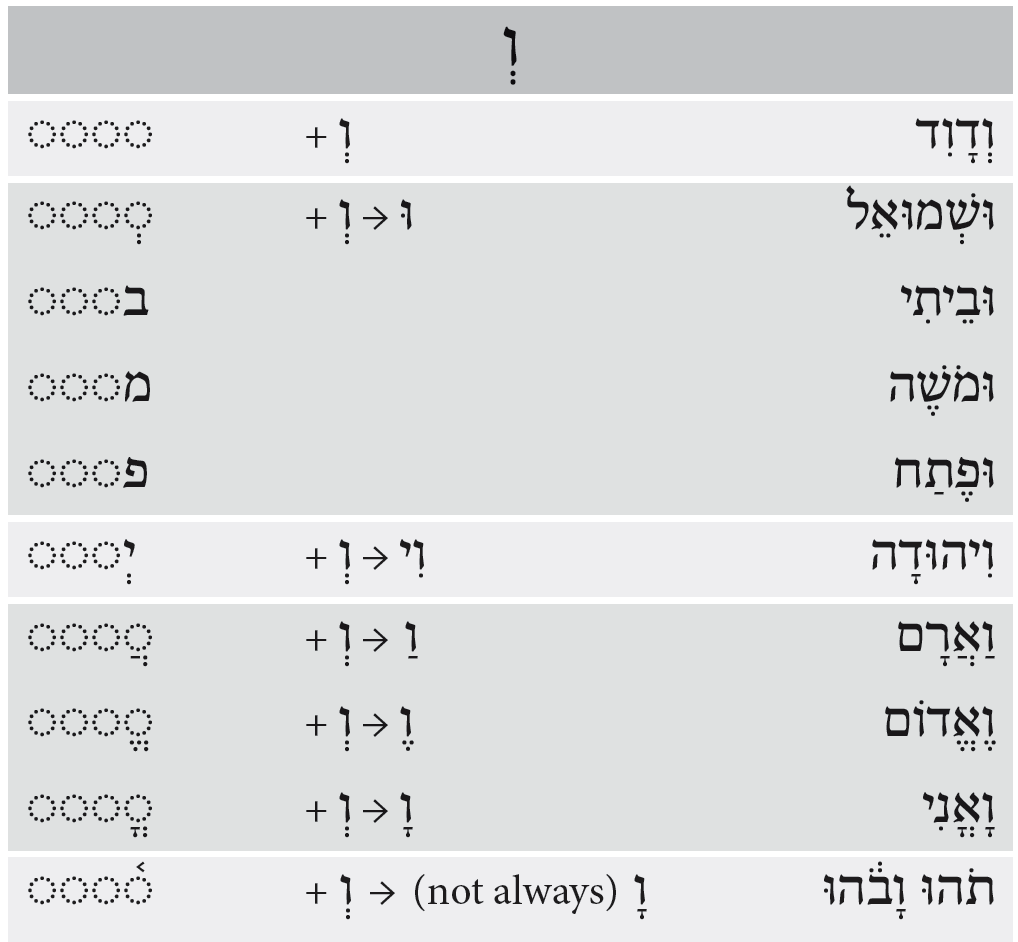

In [ ]:
Hebrew_PrefixingAll='''
c:clause
 w1:word lex=W g_word~^W:-|^W@-|^WI-|^WA-|^WE-     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>BGDHWZXVJKLMNS<PYQRFCT]:|^B|^M|^P|^J[>BGDHWZXVJKLMNS<PYQRFCT]|^[>HX<]:E|^[>HX<]:A|^[>HX<]:@ sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingAll  = BHSa4c.search(Hebrew_PrefixingAll)
BHSa4c.table(Hebrew_PrefixingAll, start=1, end=10, condensed=False, colorMap={1: 'cyan'})

In [ ]:
Hebrew_PrefixingW1='''
c:clause
 w1:word lex=W g_word~^W:-   bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>BGDHWZXVJKLMNS<PYQRFCT][AIOU@E;][>BGDHWZXVJKLMNS<PYQRFCT].[>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingW1  = BHSa4c.search(Hebrew_PrefixingW1)
BHSa4c.table(Hebrew_PrefixingW1, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW1_exercises.tsv')

In [ ]:
Hebrew_PrefixingW1=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW1_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW1.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW1selection=Hebrew_PrefixingW1 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW1selection.head(10)

In [ ]:
Hebrew_PrefixingW1selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW1selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingW2='''
c:clause
 w1:word lex=W g_word~^W\.-     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>BGDHWZXVKLMNS<PYQRFCT]:[>BGDHWZXVJKLMNS<PYQRFCT][AIOUE;@]|^B[AIOUE;@][>BGDHWZXVJKLMNS<PYQRFCT]|^M[AIOUE;@][>BGDHWZXVJKLMNS<PYQRFCT]|^P[AIOUE;@][>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingW2  = BHSa4c.search(Hebrew_PrefixingW2)
BHSa4c.table(Hebrew_PrefixingW2, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW2_exercises.tsv')

In [ ]:
Hebrew_PrefixingW2=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW2_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW2.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW2selection=Hebrew_PrefixingW2 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW2selection.head(10)

In [ ]:
Hebrew_PrefixingW2selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW2selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingW3='''
c:clause
 w1:word lex=W g_word~^WI-     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^J[>BGDHWZXVJKLMNS<PYQRFCT][AIOUE@][>BGDHWZXVJKLMNS<PYQRFCT]|^J[>BGDHWZXVJKLMNS<PYQRFCT][W].|^J[>BGDHWZXVJKLMNS<PYQRFCT][J][IE] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingW3  = BHSa4c.search(Hebrew_PrefixingW3)
BHSa4c.table(Hebrew_PrefixingW3, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW3_exercises.tsv')

In [ ]:
Hebrew_PrefixingW3=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW3_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW3.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW3selection=Hebrew_PrefixingW3 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW3selection.head(10)

In [ ]:
Hebrew_PrefixingW3selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW3selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingW4a='''
c:clause
 w1:word lex=W g_word~^W@- bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<]:@[>BGDHWZXVJKLMNS<PYQRFCT][AIOUE@] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingW4a  = BHSa4c.search(Hebrew_PrefixingW4a)
BHSa4c.table(Hebrew_PrefixingW4a, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW4a, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW4a_exercises.tsv')

In [ ]:
Hebrew_PrefixingW4a=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW4a_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW4a.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW4aselection=Hebrew_PrefixingW4a \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW4aselection.head(10)

In [ ]:
Hebrew_PrefixingW4aselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4aselection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingW4b='''
c:clause
 w1:word lex=W g_word~^WA-  bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<]:A[>BGDHWZXVJKLMNS<PYQRFCT][AIOUE@] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingW4b  = BHSa4c.search(Hebrew_PrefixingW4b)
BHSa4c.table(Hebrew_PrefixingW4b, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW4b, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW4b_exercises.tsv')

In [ ]:
Hebrew_PrefixingW4b=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW4b_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW4b.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW4bselection=Hebrew_PrefixingW4b \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW4bselection.head(10)

In [ ]:
Hebrew_PrefixingW4bselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4bselection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingW4c='''
c:clause
 w1:word lex=W g_word~^WE-  bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<]:E[>BGDHWZXVJKLMNS<PYQRFCT][AIOUE@] sp=subs|nmpr

w1 <: w2


'''
Hebrew_PrefixingW4c  = BHSa4c.search(Hebrew_PrefixingW4c)
BHSa4c.table(Hebrew_PrefixingW4c, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW4c, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW4c_exercises.tsv')

In [ ]:
Hebrew_PrefixingW4c=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW4c_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW4c.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW4cselection=Hebrew_PrefixingW4c \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW4cselection.head(10)

In [ ]:
Hebrew_PrefixingW4cselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4cselection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingW5='''
c:clause
 w1:word lex=W g_word~^W@-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>BGDHWZXVJKLMNS<PYQRFCT][AEIOU][0-9][0-9][>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num
 

w1 <: w2


'''
Hebrew_PrefixingW5  = BHSa4c.search(Hebrew_PrefixingW5)
BHSa4c.table(Hebrew_PrefixingW5, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingW5, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingW5_exercises.tsv')

In [ ]:
Hebrew_PrefixingW5=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingW5_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingW5.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingW5selection=Hebrew_PrefixingW5 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingW5selection.head(10)

In [ ]:
Hebrew_PrefixingW5selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW5selection.xlsx', encoding='utf-16')

##### Research Question
It seems that the WawChireqJod is a sign of post exilic Hebrew! Particularly at the clause beginning!

In [ ]:
Hebrew_Prefixing_Research1='''
c:clause
 w1:word lex=W g_word~^WI     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word lex~^J g_word~^J g_lex~^J sp=subs

w1 <: w2


'''
Hebrew_Prefixing_Research1  = BHSa4c.search(Hebrew_Prefixing_Research1)
BHSa4c.table(Hebrew_Prefixing_Research1, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
Hebrew_Prefixing_Research2='''
clause 
 w1:word lex=W g_word~^WI.*     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word lex~^J g_word~^J g_lex~^J sp=nmpr|subs lex#JHWH/

w1 <: w2



'''
Hebrew_Prefixing_Research2  = BHSa4c.search(Hebrew_Prefixing_Research2)
BHSa4c.table(Hebrew_Prefixing_Research2, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

#### Prefixing B/K/L


In [ ]:
Hebrew_PrefixingBKL1='''
c:phrase
 w1:word lex=B|K|L g_word~^B.I-|^K.I-|^LI-     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>BGDHWZXVKLMNS<PYQRFCT]:[>BGDHWZXVJKLMNS<PYQRFCT][AIOUE@] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingBKL1  = BHSa4c.search(Hebrew_PrefixingBKL1)
BHSa4c.table(Hebrew_PrefixingBKL1, start=1, end=10, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKL1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKL1_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKL1=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKL1_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKL1.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKL1selection=Hebrew_PrefixingBKL1 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKL1selection.head(10)

In [ ]:
Hebrew_PrefixingBKL1selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL1selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKL2='''
c:phrase
 w1:word lex=B|K|L g_word~^B.I-|^K.I-|^LI-     bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_lex~J g_word~^J[>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingBKL2  = BHSa4c.search(Hebrew_PrefixingBKL2)
BHSa4c.table(Hebrew_PrefixingBKL2, start=1, end=10, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKL2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKL2_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKL2=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKL2_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKL2.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKL2selection=Hebrew_PrefixingBKL2 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKL2selection.head(10)

In [ ]:
Hebrew_PrefixingBKL2selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL2selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKL3a='''
c:clause
 w1:word lex=B|K|L g_word~^B.@-|^K.@-|^L@- bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<]:@[>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingBKL3a  = BHSa4c.search(Hebrew_PrefixingBKL3a)
BHSa4c.table(Hebrew_PrefixingBKL3a, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKL3a, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='BHSa4c_BOL_morphology_prefixingBKL3a_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKL3a=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKL3a_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKL3a.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKL3aselection=Hebrew_PrefixingBKL3a \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKL3aselection.head(10)

In [ ]:
Hebrew_PrefixingBKL3aselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3aselection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKL3b='''
c:clause
 w1:word lex=B|K|L g_word~^B.A-|^K.A-|^LA- bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<]:A[>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingBKL3b  = BHSa4c.search(Hebrew_PrefixingBKL3b)
BHSa4c.table(Hebrew_PrefixingBKL3b, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKL3b, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKL3b_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKL3b=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKL3b_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKL3b.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKL3bselection=Hebrew_PrefixingBKL3b \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKL3bselection.head(10)

In [ ]:
Hebrew_PrefixingBKL3bselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3bselection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKL3c='''
c:clause
 w1:word lex=B|K|L g_word~^B.E-|^K.E-|^LE- bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<]:E[>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingBKL3c  = BHSa4c.search(Hebrew_PrefixingBKL3c)
BHSa4c.table(Hebrew_PrefixingBKL3c, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKL3c, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKL3c_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKL3c=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKL3c_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKL3c.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKL3cselection=Hebrew_PrefixingBKL3c \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKL3cselection.head(10)

In [ ]:
Hebrew_PrefixingBKL3cselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3cselection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKL4='''
c:clause
 w1:word lex=B|K|L g_word~^B.@-|^K.@-|^L@-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>BGDHWZXVJKLMNS<PYQRFCT][AEIOU][0-9][0-9][>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingBKL4  = BHSa4c.search(Hebrew_PrefixingBKL4)
BHSa4c.table(Hebrew_PrefixingBKL4, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKL4, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKL4_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKL4=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKL4_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKL4.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKL4selection=Hebrew_PrefixingBKL4 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKL4selection.head(10)

In [ ]:
Hebrew_PrefixingBKL4selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL4selection.xlsx', encoding='utf-16')

#### Prefixing MN

In [ ]:
Hebrew_PrefixingMN1='''
c:clause
 w1:word lex=MN g_word~^MI-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[BGDWZVJKLMNSPYQFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingMN1  = BHSa4c.search(Hebrew_PrefixingMN1)
BHSa4c.table(Hebrew_PrefixingMN1, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingMN1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingMN1_exercises.tsv')

In [ ]:
Hebrew_PrefixingMN1=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingMN1_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingMN1.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingMN1selection=Hebrew_PrefixingMN1 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingMN1selection.head(10)

In [ ]:
Hebrew_PrefixingMN1selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingMN1selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingMN2='''
c:clause
 w1:word lex=MN g_word~^M;-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[>HX<] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingMN2  = BHSa4c.search(Hebrew_PrefixingMN2)
BHSa4c.table(Hebrew_PrefixingMN2, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingMN2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingMN2_exercises.tsv')

In [ ]:
Hebrew_PrefixingMN2=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingMN2_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingMN2.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingMN2selection=Hebrew_PrefixingMN2 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingMN2selection.head(10)

In [ ]:
Hebrew_PrefixingMN2selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingMN2selection.xlsx', encoding='utf-16')

#### Prefixing article

In [ ]:
Hebrew_PrefixingH1='''
c:clause
 w1:word lex=H g_word~^HA-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[BGDWZVJKLMNSPYQFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingH1  = BHSa4c.search(Hebrew_PrefixingH1)
BHSa4c.table(Hebrew_PrefixingH1, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingH1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingH1_exercises.tsv')

In [ ]:
Hebrew_PrefixingH1=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingH1_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingH1.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingH1selection=Hebrew_PrefixingH1 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingH1selection.head(10)

In [ ]:
Hebrew_PrefixingH1selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH1selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingH2='''
c:clause
 w1:word lex=H g_word~^H@-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[><R] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingH2  = BHSa4c.search(Hebrew_PrefixingH2)
BHSa4c.table(Hebrew_PrefixingH2, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingH2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingH2_exercises.tsv')

In [ ]:
Hebrew_PrefixingH2=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingH2_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingH2.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingH2selection=Hebrew_PrefixingH2 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingH2selection.head(10)

In [ ]:
Hebrew_PrefixingH2selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH2selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingH3='''
c:clause
 w1:word lex=H g_word~^HA-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[HX][AEIOU] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingH3  = BHSa4c.search(Hebrew_PrefixingH3)
BHSa4c.table(Hebrew_PrefixingH3, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingH3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingH3_exercises.tsv')

In [ ]:
Hebrew_PrefixingH3=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingH3_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingH3.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingH3selection=Hebrew_PrefixingH3 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingH3selection.head(10)

In [ ]:
Hebrew_PrefixingH3selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH3selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingH4='''
c:clause
 w1:word lex=H g_word~^HE-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[HX][@] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingH4  = BHSa4c.search(Hebrew_PrefixingH4)
BHSa4c.table(Hebrew_PrefixingH4, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingH4, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingH4_exercises.tsv')

In [ ]:
Hebrew_PrefixingH4=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingH4_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingH4.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingH4selection=Hebrew_PrefixingH4 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingH4selection.head(10)

In [ ]:
Hebrew_PrefixingH4selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH4selection.xlsx', encoding='utf-16')

#### Combined Prefixes B/K/L + H

In [ ]:
Hebrew_PrefixingBKLH1='''
c:clause
 w1:word lex=B|K|L g_word~^B.A-|K.A-|LA-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word lex=H g_word~^-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w3:word g_word~^[BGDWZVJKLMNSPYQFCT] sp=subs|nmpr lex  bol_monad_num

w1 <: w2
w2 <: w3


'''
Hebrew_PrefixingBKLH1  = BHSa4c.search(Hebrew_PrefixingBKLH1)
BHSa4c.table(Hebrew_PrefixingBKLH1, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKLH1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKLH1_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKLH1=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKLH1_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKLH1.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKLH1selection=Hebrew_PrefixingBKLH1 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKLH1selection.head(10)

In [ ]:
Hebrew_PrefixingBKLH1selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH1selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKLH2='''
c:clause
 w1:word lex=B|K|L g_word~^B.@-|K.@-|L@-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word lex=H g_word~^-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w3:word g_word~^[><R] sp=subs|nmpr bol_monad_num

w1 <: w2
w2 <: w3


'''
Hebrew_PrefixingBKLH2  = BHSa4c.search(Hebrew_PrefixingBKLH2)
BHSa4c.table(Hebrew_PrefixingBKLH2, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKLH2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKLH2_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKLH2=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKLH2_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKLH2.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKLH2selection=Hebrew_PrefixingBKLH2 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKLH2selection.head(10)

In [ ]:
Hebrew_PrefixingBKLH2selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH2selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKLH3='''
c:clause
 w1:word lex=B|K|L g_word~^B.A-|K.A-|LA-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word lex=H g_word~^-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w3:word g_word~^[HX][AEIOU] sp=subs|nmpr bol_monad_num

w1 <: w2
w2 <: w3


'''
Hebrew_PrefixingBKLH3  = BHSa4c.search(Hebrew_PrefixingBKLH3)
BHSa4c.table(Hebrew_PrefixingBKLH3, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKLH3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKLH3_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKLH3=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKLH3_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKLH3.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKLH3selection=Hebrew_PrefixingBKLH3 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKLH3selection.head(10)

In [ ]:
Hebrew_PrefixingBKLH3selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH3selection.xlsx', encoding='utf-16')

In [ ]:
Hebrew_PrefixingBKLH4='''
c:clause
 w1:word lex=B|K|L g_word~^B.E-|K.E-|LE-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word lex=H g_word~^-    bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w3:word g_word~^[HX]@ sp=subs|nmpr bol_monad_num

w1 <: w2
w2 <: w3


'''
Hebrew_PrefixingBKLH4  = BHSa4c.search(Hebrew_PrefixingBKLH4)
BHSa4c.table(Hebrew_PrefixingBKLH4, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Hebrew_PrefixingBKLH4, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_prefixingBKLH4_exercises.tsv')

In [ ]:
Hebrew_PrefixingBKLH4=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_prefixingBKLH4_exercises.tsv', delimiter='\t', encoding='utf-16')
Hebrew_PrefixingBKLH4.head()


In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_PrefixingBKLH4selection=Hebrew_PrefixingBKLH4 \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
Hebrew_PrefixingBKLH4selection.head(10)

In [ ]:
Hebrew_PrefixingBKLH4selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH4selection.xlsx', encoding='utf-16')

#### Combining W,B,K,L excel files for simple prefixing exercise

In [ ]:
Hebrew_PrefixingW1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW1selection.xlsx')
Hebrew_PrefixingW2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW2selection.xlsx')
Hebrew_PrefixingW3selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW3selection.xlsx')
Hebrew_PrefixingW4aselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4aselection.xlsx')
Hebrew_PrefixingW4bselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4bselection.xlsx')
Hebrew_PrefixingW4cselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4cselection.xlsx')
Hebrew_PrefixingW5selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW5selection.xlsx')

Hebrew_PrefixingBKL1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL1selection.xlsx')
Hebrew_PrefixingBKL2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL2selection.xlsx')
Hebrew_PrefixingBKL3aselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3aselection.xlsx')
Hebrew_PrefixingBKL3bselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3bselection.xlsx')
Hebrew_PrefixingBKL3cselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3cselection.xlsx')
Hebrew_PrefixingBKL4selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL4selection.xlsx')


In [ ]:
connect_WBKL = [Hebrew_PrefixingW1selection, Hebrew_PrefixingW2selection, Hebrew_PrefixingW3selection, Hebrew_PrefixingW4aselection, Hebrew_PrefixingW4bselection, Hebrew_PrefixingW4cselection, Hebrew_PrefixingW5selection, Hebrew_PrefixingBKL1selection, Hebrew_PrefixingBKL2selection, Hebrew_PrefixingBKL3aselection, Hebrew_PrefixingBKL3bselection, Hebrew_PrefixingBKL3cselection,Hebrew_PrefixingBKL4selection]
prefixing_combined_WBKL = pd.concat(connect_WBKL)
prefixing_combined_WBKL.head()

In [ ]:
prefixing_combined_WBKL_selection=prefixing_combined_WBKL \
                                    .groupby(['TEXT2']) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['TEXT2','bol_monad_num2'], 
                                                 ascending=True)
prefixing_combined_WBKL_selection.head(20)

In [ ]:
prefixing_combined_WBKL.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingWBKL_simple_selection.xlsx', encoding='utf-16')

#### Combining all Excel files

In [ ]:
Hebrew_PrefixingW1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW1selection.xlsx')
Hebrew_PrefixingW2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW2selection.xlsx')
Hebrew_PrefixingW3selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW3selection.xlsx')
Hebrew_PrefixingW4aselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4aselection.xlsx')
Hebrew_PrefixingW4bselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4bselection.xlsx')
Hebrew_PrefixingW4cselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW4cselection.xlsx')
Hebrew_PrefixingW5selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingW5selection.xlsx')

Hebrew_PrefixingH1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH1selection.xlsx')
Hebrew_PrefixingH2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH2selection.xlsx')
Hebrew_PrefixingH3selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH3selection.xlsx')
Hebrew_PrefixingH4selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingH4selection.xlsx')

Hebrew_PrefixingBKL1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL1selection.xlsx')
Hebrew_PrefixingBKL2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL2selection.xlsx')
Hebrew_PrefixingBKL3aselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3aselection.xlsx')
Hebrew_PrefixingBKL3bselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3bselection.xlsx')
Hebrew_PrefixingBKL3cselection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL3cselection.xlsx')
Hebrew_PrefixingBKL4selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKL4selection.xlsx')

Hebrew_PrefixingBKLH1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH1selection.xlsx')
Hebrew_PrefixingBKLH2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH2selection.xlsx')
Hebrew_PrefixingBKLH3selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH3selection.xlsx')
Hebrew_PrefixingBKLH4selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLH4selection.xlsx')

Hebrew_PrefixingMN1selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingMN1selection.xlsx')
Hebrew_PrefixingMN2selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingMN2selection.xlsx')


##### Non-Compound Prefixes

In [ ]:
all_noncompound_prefixes = [Hebrew_PrefixingW1selection, Hebrew_PrefixingW2selection, Hebrew_PrefixingW3selection, Hebrew_PrefixingW4aselection, Hebrew_PrefixingW4bselection, Hebrew_PrefixingW4cselection, Hebrew_PrefixingW5selection, Hebrew_PrefixingH1selection, Hebrew_PrefixingH2selection, Hebrew_PrefixingH3selection, Hebrew_PrefixingH4selection, Hebrew_PrefixingBKL1selection, Hebrew_PrefixingBKL2selection, Hebrew_PrefixingBKL3aselection, Hebrew_PrefixingBKL3bselection, Hebrew_PrefixingBKL3cselection, Hebrew_PrefixingBKL4selection, Hebrew_PrefixingMN1selection, Hebrew_PrefixingMN2selection]
all_noncompound_prefixes = pd.concat(all_noncompound_prefixes)
all_noncompound_prefixes.head(10)

In [ ]:
all_noncompound_prefixes.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingAllCombinedNonCompound_selection.xlsx', encoding='utf-16')

##### Compound Prefixes

In [ ]:
all_combound_prefixes = [Hebrew_PrefixingBKLH1selection, Hebrew_PrefixingBKLH2selection, Hebrew_PrefixingBKLH3selection, Hebrew_PrefixingBKLH4selection]
all_combound_prefixes = pd.concat(all_combound_prefixes)
all_combound_prefixes.head()

In [ ]:
all_combound_prefixes.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingAllCombinedCompound_selection.xlsx', encoding='utf-16')

In [ ]:
connect_H = [Hebrew_PrefixingH1selection, Hebrew_PrefixingH2selection, Hebrew_PrefixingH3selection, Hebrew_PrefixingH4selection]
prefixing_combined_H = pd.concat(connect_H)
prefixing_combined_H.head()

In [ ]:
prefixing_combined_H.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingHCombined_selection.xlsx', encoding='utf-16')

In [ ]:
connect_BKL = [Hebrew_PrefixingBKL1selection, Hebrew_PrefixingBKL2selection, Hebrew_PrefixingBKL3aselection, Hebrew_PrefixingBKL3bselection, Hebrew_PrefixingBKL3cselection, Hebrew_PrefixingBKL4selection]
prefixing_combined_BKL = pd.concat(connect_BKL)
prefixing_combined_BKL.head()

In [ ]:
prefixing_combined_BKL.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLCombined_selection.xlsx', encoding='utf-16')

In [ ]:
connect_BKLH = [Hebrew_PrefixingBKLH1selection, Hebrew_PrefixingBKLH2selection, Hebrew_PrefixingBKLH3selection, Hebrew_PrefixingBKLH4selection]
prefixing_combined_BKLH = pd.concat(connect_BKLH)
prefixing_combined_BKLH.head()

In [ ]:
prefixing_combined_BKLH.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingBKLHCombined_selection.xlsx', encoding='utf-16')

In [ ]:
connect_MN = [Hebrew_PrefixingMN1selection, Hebrew_PrefixingMN2selection]
prefixing_combined_MN = pd.concat(connect_MN)
prefixing_combined_MN.head()

In [ ]:
prefixing_combined_MN.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingMNCombined_selection.xlsx', encoding='utf-16')

In [ ]:
connect_all = [Hebrew_PrefixingW1selection, Hebrew_PrefixingW2selection, Hebrew_PrefixingW3selection, Hebrew_PrefixingW4aselection, Hebrew_PrefixingW4bselection, Hebrew_PrefixingW4cselection, Hebrew_PrefixingW5selection, Hebrew_PrefixingH1selection, Hebrew_PrefixingH2selection, Hebrew_PrefixingH3selection, Hebrew_PrefixingH4selection, Hebrew_PrefixingBKL1selection, Hebrew_PrefixingBKL2selection, Hebrew_PrefixingBKL3aselection, Hebrew_PrefixingBKL3bselection, Hebrew_PrefixingBKL3cselection, Hebrew_PrefixingBKL4selection, Hebrew_PrefixingBKLH1selection, Hebrew_PrefixingBKLH2selection, Hebrew_PrefixingBKLH3selection, Hebrew_PrefixingBKLH4selection, Hebrew_PrefixingMN1selection, Hebrew_PrefixingMN2selection]
prefixing_combined_all = pd.concat(connect_all)
prefixing_combined_all.head()

In [ ]:
prefixing_combined_all.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_Hebrew_morphology_PrefixingAllCombined_selection.xlsx', encoding='utf-16')

### Testing

In [ ]:
Hebrew_PrefixingAll='''
c:clause
 w1:word lex=H      bol_dict_HebArm* number* freq_occ* rank_occ* freq_lex bol_dict_abc* language=Hebrew bol_monad_num
 w2:word g_word~^[J]:[>BGDHWZXVJKLMNS<PYQRFCT] sp=subs|nmpr bol_monad_num

w1 <: w2


'''
Hebrew_PrefixingAll  = BHSa4c.search(Hebrew_PrefixingAll)
BHSa4c.table(Hebrew_PrefixingAll, start=1, end=50, condensed=False, colorMap={1: 'cyan'})

## Complete morphology

### Nominal Declention

In [ ]:
AllParticipalForms0='''
w1:word bol_qere_presence=0 bol_monad_num* sp=verb  g_word_noaccent* lex number* freq_occ* freq_lex* vt=ptca|ptcp st* rank_occ* bol_dict_abc* bol_dict_HebArm* bol_bhsa_word_order* bol_dict_vc* ps* nu* gn* vs* prs_ps=unknown prs_nu* prs_gn* pdp* bol_dict_EN* language=Hebrew 



'''
AllParticipalForms0  = BHSa4c.search(AllParticipalForms0)
BHSa4c.table(AllParticipalForms0, start=1, end=10, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(AllParticipalForms0, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology_participles_declension_exercises.tsv')

In [ ]:
AllParticipalForms=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_participles_declension_exercises.tsv', delimiter='\t', encoding='utf-16')
AllParticipalForms.head(80)


In [ ]:
AllParticipalFormsSelection = AllParticipalForms[(AllParticipalForms['language1'] == 'Hebrew') 
                                      & (AllParticipalForms['g_word_noaccent1'].str.contains('.*@H$')) #getting sgFabsolute forms and excluding complicated forms
                                      & (AllParticipalForms['bol_qere_presence1'] == 0) #excluding ketiv-qere cases
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*ET$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*IJ$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*;H$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*EH$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*A[BGDHWYXVKLNSPZQRCFT]AT$')) #excluding segolated forms
                                      | (AllParticipalForms['g_word_noaccent1'].str.contains('.*AT$'))  #getting sgFconstruct forms and excluding complicated forms
                                      & (AllParticipalForms['bol_qere_presence1'] == 0) #excluding ketiv-qere cases
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*ET$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*IJ$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*;H$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*EH$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*A[BGDHWYXVKLNSPZQRCFT]AT$')) #excluding segolated forms
                                      | (AllParticipalForms['g_word_noaccent1'].str.contains('.*WT$'))  #getting plF forms and excluding complicated forms
                                      & (AllParticipalForms['bol_qere_presence1'] == 0) #excluding ketiv-qere cases
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*ET$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*IJ$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*;H$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*EH$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*A[BGDHWYXVKLNSPZQRCFT]AT$')) #excluding segolated forms
                                      | (AllParticipalForms['g_word_noaccent1'].str.contains('.*[BGDHWYXVKLNSPZQRCFT]$'))  #getting sgM forms and excluding complicated forms
                                      & (AllParticipalForms['bol_qere_presence1'] == 0) #excluding ketiv-qere cases
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*ET$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*IJ$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*;H$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*EH$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*A[BGDHWYXVKLNSPZQRCFT]AT$')) #excluding segolated forms
                                      | (AllParticipalForms['g_word_noaccent1'].str.contains('.*IJM$'))  #getting plMabsolute forms and excluding complicated forms
                                      & (AllParticipalForms['bol_qere_presence1'] == 0) #excluding ketiv-qere cases
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*ET$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*IJ$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*;H$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*EH$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*A[BGDHWYXVKLNSPZQRCFT]AT$')) #excluding segolated forms
                                      | (AllParticipalForms['g_word_noaccent1'].str.contains('.*J$'))  #getting plMabsolute forms and excluding complicated forms
                                      & (AllParticipalForms['bol_qere_presence1'] == 0) #excluding ketiv-qere cases
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*ET$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*IJ$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*;H$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*EH$'))
                                      & (~AllParticipalForms['g_word_noaccent1'].str.contains('.*A[BGDHWYXVKLNSPZQRCFT]AT$')) #excluding segolated forms

                                                 
                                     ]
AllParticipalFormsSelection.head(20)

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Hebrew_Declensionselection=AllParticipalFormsSelection \
                                    .groupby(['st1', 'nu1', 'gn1']) \
                                    .sample(n=10, replace=True)\
                                    .sort_values(['st1', 'nu1', 'gn1','bol_monad_num1'], 
                                                 ascending=True)
Hebrew_Declensionselection.head(10)

In [ ]:
Hebrew_Declensionselection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_declension_exercises_selection.xlsx', encoding='utf-16')

### Pronominal suffixes for BibleOL exercises

In [ ]:
## Loading the DataFrame containing all words of the OT

BibleOL_PRS_morphology=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BHSa4c_BOL_exercises.xlsx')
BibleOL_PRS_morphology.head()

In [ ]:
## Selecting only Hebrew words and only prepositions with pronominal suffixes

BibleOL_PRS_morphology1 = BibleOL_PRS_morphology[(    ((BibleOL_PRS_morphology['prs_ps'] == 'p1')
                                                       |(BibleOL_PRS_morphology['prs_ps'] == 'p2') 
                                                       |(BibleOL_PRS_morphology['prs_ps'] == 'p3')
                                                     )
                                                    &(BibleOL_PRS_morphology['language'] == 'Hebrew')
                                                    &(BibleOL_PRS_morphology['lex'] != 'MN')
                                                    &(BibleOL_PRS_morphology['lex'] != 'MJN/')
                                                    &(BibleOL_PRS_morphology['bol_qere_presence'] == 0)
                                                    &(BibleOL_PRS_morphology['bol_lexeme_occurrences'] > 1300)
                                                    &((BibleOL_PRS_morphology['sp'] == 'prep') 
                                                       |(BibleOL_PRS_morphology['sp'] == 'subs')
                                                     )
                                                    & ((BibleOL_PRS_morphology['nu'] == 'sg') 
                                                       |(BibleOL_PRS_morphology['nu'] == 'pl') 
                                                       |(BibleOL_PRS_morphology['nu'].isna()) 
                                                      )
                                                )
                                               ]
BibleOL_PRS_morphology1.head(10)

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BibleOL_PRS_morphology1=BibleOL_PRS_morphology1 \
                                    .groupby(['sp',
                                              'prs_ps',
                                              'prs_nu',
                                              'prs_gn',
                                             ]) \
                                    .sample(n=5, replace=True)\
                                    .sort_values(['prs_ps',
                                                  'prs_nu',
                                                  'prs_gn',
                                                  'bol_monad_num'],
                                                 ascending=[True,False,True,True])
BibleOL_PRS_morphology1.head(100)

In [ ]:
BibleOL_PRS_morphology1.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_morphology_Suffixation_selection.xlsx')

### Retrieving Nominal Forms

### Retrieving Verbal Forms

In [ ]:
Search1='''
word bol_monad_num* bol_qere_presence=0 bol_vt=perf|impf|wayq|juss|coho|impv|infa|infc|ptca|ptcp lex* number* freq_occ* freq_lex* st* rank_occ* bol_dict_abc* bol_dict_HebArm bol_bhsa_word_order* bol_dict_vc* ps* nu* gn* vt* vs prs_nu* prs_ps* prs_gn* sp=verb pdp* bol_dict_EN g_word_noaccent language=Hebrew 

'''
Search1  = BHSa4c.search(Search1)
BHSa4c.table(Search1, start=1, end=2, multiFeatures=True, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Search1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_verbal-morphology_Heb-I-II-III_exercises.tsv')

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallVerbalMorphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_verbal-morphology_Heb-I-II-III_exercises.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

BHSallVerbalMorphology.head()

In [ ]:
vc=BHSallVerbalMorphology.bol_dict_vc1.unique().tolist()
print(vc)

#### Excluding 4 root verbs

In [ ]:
BHSallVerbalMorphology=BHSallVerbalMorphology[(BHSallVerbalMorphology['bol_dict_vc1']!='4 root verb') & (BHSallVerbalMorphology['language1']=='Hebrew')]
BHSallVerbalMorphology.head()

In [ ]:
BHSallVerbalMorphologyOTST551_552=BHSallVerbalMorphology[(BHSallVerbalMorphology['bol_dict_vc1']!='4 root verb') & (BHSallVerbalMorphology['language1']=='Hebrew')]
BHSallVerbalMorphology.head()

#### Retrieving 2 samples of each verbal form

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHSallVerbalMorphology=BHSallVerbalMorphology \
                                    .groupby(['bol_dict_vc1',
                                              'vs1',
                                              'bol_vt1',
                                              'ps1',
                                              'nu1',
                                              'gn1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .sample(n=2, replace=True)\
                                    .sort_values(['bol_monad_num1',
                                                  'bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1'], 
                                                 ascending=True)
BHSallVerbalMorphology.head(10)

In [ ]:
BHSallVerbalMorphology.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/OTST551_Heb-I-II-III_verbal-morphology_selection_of_2.xlsx', encoding='utf-16')

#### Exam Selection

In [ ]:
OTST625ExamWords1='''
verse book=Judices chapter=19 verse=22|23|24|25|26|27|28|29
      word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST625ExamWords1  = BHSa4c.search(OTST625ExamWords1)
BHSa4c.table(OTST625ExamWords1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSallVerbalMorphology.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/OTST551_Heb-I-II-III_verbal-morphology_selection_of_2.xlsx', encoding='utf-16')

## Word level exam parts for OTST551

### Vocab for Hebrew I exams (OTST551 Glanz course on Genesis 19 and Genesis 20)

In [ ]:
OTST551ExamWords='''
chapter book=Genesis chapter=19|20
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST551ExamWords  = BHSa4c.search(OTST551ExamWords)
BHSa4c.show(OTST551ExamWords, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST551ExamWords, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-I_OTST551-Glanz-course_ExamWords.tsv')

### OTST552 Midterm (Hebrew II) - Morphology
#### Part 01

In [ ]:
OTST552_Text1_VerbalMorphology='''
verse book=Genesis chapter=20 verse=6|7|8|9
      word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST552_Text1_VerbalMorphology  = BHSa4c.search(OTST552_Text1_VerbalMorphology)
BHSa4c.table(OTST552_Text1_VerbalMorphology, start=1, end=26, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Text1_VerbalMorphology, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology-verb_Heb-II_Midterm_VerbalMorphology_Text01.tsv')

#### Part 02

In [ ]:
OTST552_Text2_VerbalMorphology='''
verse book=Reges_I chapter=3 verse=3
      word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST552_Text2_VerbalMorphology  = BHSa4c.search(OTST552_Text2_VerbalMorphology)
BHSa4c.table(OTST552_Text2_VerbalMorphology, start=1, end=4, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Text2_VerbalMorphology, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology-verb_Heb-II_Midterm_VerbalMorphology_Text02.tsv')

In [ ]:
OTST552_Text3_VerbalMorphology='''
verse book=Genesis chapter=19 verse=13|14
      word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST552_Text3_VerbalMorphology  = BHSa4c.search(OTST552_Text3_VerbalMorphology)
BHSa4c.table(OTST552_Text3_VerbalMorphology, start=1, end=26, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Text3_VerbalMorphology, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_morphology-verb_Heb-II_Midterm_VerbalMorphology_Text03.tsv')

### Phrases for Hebrew I

In [ ]:
PhraseFunction1='''
clause typ* kind* rela* domain*
  clause_atom rela*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word language=Aramaic
  /-/
  /without/
   word bol_dict_vc~^four.*verb|^gemi.*|^i.*
  /-/
  /without/
   word lex=LQX[
  /-/
    phrase function* typ* rela* det*
     phrase_atom function* typ* rela* det*
      word bol_sequence_num_phrase* bol_sequence_num_phrase_atom* bol_lexeme_occurrences* bol_sequence_num_clause* bol_sequence_num_clause_atom* bol_monad_num*



'''
PhraseFunction1  = BHSa4c.search(PhraseFunction1)
BHSa4c.show(PhraseFunction1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-I_exercises.tsv')

## Complete Phrase analysis

### subphrase

In [ ]:
SubPhrase='''
p:phrase
/without/
   word ls=ordn|card
/-/
/without/
   word bol_lexeme_occurrences<69
/-/
/without/
   word lex=JHWH/
/-/
/without/
   word bol_qere_presence=1
/-/
/without/
   word language=Aramaic
/-/
 sub1:subphrase rela*
      word bol_sequence_number_subphrase* bol_lexeme_occurrences* language=Hebrew ls* lex*
 sub2:subphrase rela=atr|dem|rec
    word bol_sequence_number_subphrase* bol_lexeme_occurrences* language=Hebrew ls* lex*

p =: sub1
p := sub2
sub1 <: sub2


'''
SubPhrase  = BHSa4c.search(SubPhrase)
BHSa4c.show(SubPhrase, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(SubPhrase, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_subphrase_exercise.tsv')

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
SubPhrase=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_subphrase_exercise.tsv', delimiter='\t', encoding='utf-16')


#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

SubPhrase.head()

In [ ]:
SubPhrase.rela4.unique()

In [ ]:
SubPhrasePart1=SubPhrase[((SubPhrase['rela4'] == 'rec')
                  | (SubPhrase['rela4'] == 'atr'))]
SubPhrasePart1.head(10)

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

SubPhrasePart1=SubPhrasePart1 \
                                    .groupby(['rela4']) \
                                    .sample(n=100, replace=True)\
                                    .sort_values(['rela4'], 
                                                 ascending=True)
SubPhrasePart1.head()

In [ ]:
SubPhrasePart1.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_subphrase-relations_part1_Heb-I_exercises.xlsx', encoding='utf-16')

In [ ]:
SubPhrasePart2=SubPhrase[((SubPhrase['rela4'] == 'dem'))]
SubPhrasePart2.head(10)

In [ ]:
SubPhrasePart2 = SubPhrasePart2[((SubPhrasePart2['lex5'] != "H"))]
SubPhrasePart2.head(10)

In [ ]:
SubPhrasePart2.lex5.unique()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

SubPhrasePart2=SubPhrasePart2 \
                                    .groupby(['lex5']) \
                                    .sample(n=17, replace=True)\
                                    .sort_values(['lex5'], 
                                                 ascending=True)
SubPhrasePart2.head(10)

In [ ]:
SubPhrasePart2.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_subphrase-relations_part2_Heb-I_exercises.xlsx', encoding='utf-16')

In [ ]:
SubPhraseP1=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_subphrase-relations_part1_Heb-I_exercises.xlsx')
SubPhraseP1.head()


In [ ]:
SubPhraseP2=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_subphrase-relations_part2_Heb-I_exercises.xlsx')
SubPhraseP2.head()


In [ ]:
SubPhraseAll = pd.concat([SubPhraseP1,SubPhraseP2], axis=0)
SubPhraseAll.head()

In [ ]:
SubPhraseAll.rela4.unique()

In [ ]:
SubPhraseAll.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_subphrase-relations_all_Heb-I_exercises.xlsx', encoding='utf-16')

### phrase

In [ ]:
PhraseFunction0='''
c:clause
/without/
   word bol_lexeme_occurrences<1
/-/
/without/
   word bol_qere_presence=1
/-/
/without/
   word language=Aramaic
/-/
/without/
   word bol_dict_vc~^i.*|geminate
/-/
/without/
   word lex=LQX[
/-/
 p1:phrase function=Subj|Objc|Pred|PreO|Nega
  word bol_sequence_num_phrase* bol_lexeme_occurrences* bol_sequence_num_clause* bol_monad_num*
 p2:phrase function=Subj|Objc|Pred|PreO|Nega
  word bol_sequence_num_phrase* bol_lexeme_occurrences* bol_sequence_num_clause* bol_monad_num*
 p3:phrase function=Subj|Objc|Pred|PreO|Nega
  word bol_sequence_num_phrase* bol_lexeme_occurrences* bol_sequence_num_clause* bol_monad_num*

p1 < p2
p2 < p3


'''
PhraseFunction0  = BHSa4c.search(PhraseFunction0)
BHSa4c.show(PhraseFunction0, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction0, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase_exercise.tsv')

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
PhraseFunction0=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_phrase_exercise.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

PhraseFunction0.head(20)

In [ ]:
PhraseFunction0.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_phrase_Heb1_exercise.xlsx', encoding='utf-16')

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

PhraseFunction0=PhraseFunction0 \
                                    .groupby(['function2']) \
                                    .sample(n=10, replace=True)\
                                    .sort_values(['R'], 
                                                 ascending=True)
PhraseFunction0.head(100)

In [ ]:
PhraseFunction0.to_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_phrase_Heb1_exercise.csv', sep ='\t')

#### Phrases for Hebrew I (OTST551 Glanz course on Genesis 19 and Genesis 20)

In [ ]:
OTST551Phrases1='''
chapter book=Genesis chapter=19|20
 clause typ* kind* rela* domain*
  clause_atom rela*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word language=Aramaic
  /-/
    phrase function=Pred|PreO|PreS|PreC|Objc|Subj|Cmpl typ* rela* det*
     phrase_atom function* typ* rela* det*
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST551Phrases1  = BHSa4c.search(OTST551Phrases1)
BHSa4c.show(OTST551Phrases1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST551Phrases1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-I_OTST551-Glanz-course_FinalExamPhrases1.tsv')

#### Phrases for Hebrew I

In [ ]:
PhraseFunction1='''
clause typ* kind* rela* domain*
  clause_atom rela*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word language=Aramaic
  /-/
  /without/
   word bol_dict_vc~^four.*verb|^gemi.*|^i.*
  /-/
  /without/
   word lex=LQX[
  /-/
    phrase function* typ* rela* det*
     phrase_atom function* typ* rela* det*
      word bol_sequence_num_phrase* bol_sequence_num_phrase_atom* bol_lexeme_occurrences* bol_sequence_num_clause* bol_sequence_num_clause_atom* bol_monad_num*



'''
PhraseFunction1  = BHSa4c.search(PhraseFunction1)
BHSa4c.show(PhraseFunction1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-I_exercises.tsv')

#### Phrases for Hebrew I with Vocab of >200 occ only

In [ ]:
PhraseFunction3='''
c1:clause typ* kind=NC|VC|WP rela* domain*
/without/
 word bol_lexeme_occurrences<200
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
   phrase_atom function* typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
c2:clause typ* kind=NC|VC|WP rela* domain*
/without/
 word bol_lexeme_occurrences<200
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
   phrase_atom function* typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
c3:clause typ* kind=NC|VC|WP rela* domain*
/without/
 word bol_lexeme_occurrences<200
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
   phrase_atom function* typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
 
c1 <: c2
c2 <: c3

'''
PhraseFunction3  = BHSa4c.search(PhraseFunction3)
BHSa4c.show(PhraseFunction3, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_phrase-function_Heb-I-Voc200_exercises.tsv')

#### Phrases for Hebrew II with Vocab of >100 occ only
I need to add `clause kind=WP` so that I can also catch vocatives.

In [ ]:
PhraseFunction4='''
c1:clause typ* kind=NC|VC|WP rela* domain*
/without/
 word bol_lexeme_occurrences<100
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
   phrase_atom function* typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
c2:clause typ* kind=NC|VC|WP rela* domain*
/without/
 word bol_lexeme_occurrences<100
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
   phrase_atom function* typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
c3:clause typ* kind=NC|VC|WP rela* domain*
/without/
 word bol_lexeme_occurrences<100
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
   phrase_atom function* typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
 
c1 <: c2
c2 <: c3

'''
PhraseFunction4  = BHSa4c.search(PhraseFunction4)
BHSa4c.show(PhraseFunction4, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction4, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_phrase-function_Heb-II-Voc100_exercises.tsv')

#### Phrases for Hebrew II-III with NO vocab restriction
I need to add `clause kind=WP` so that I can also catch vocatives.

In [ ]:
PhraseFunction5='''
clause typ* kind=NC|VC|WP rela* domain*
  phrase function=Pred|PreO|PreS|PreC|Subj|Objc|Cmpl|Voct|Nega typ* rela* det*
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
PhraseFunction5  = BHSa4c.search(PhraseFunction5)
BHSa4c.show(PhraseFunction5, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction5, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_phrase-function_Heb-II-III_NoVocabLimit_exercises.tsv')

### OTST552 Midterm (Hebrew II)

#### Part 01

In [ ]:
OTST552Midterm_PhraseFunction_Part01='''
verse book=Genesis chapter=20 verse=6|7|8|9
 clause typ* kind* rela* domain*
  clause_atom rela*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word language=Aramaic
  /-/
  /without/
   word bol_dict_vc~^four.*verb
  /-/
    phrase function=Pred|Subj|Objc|Cmpl typ* det*
     phrase_atom function* typ* rela* det*
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
OTST552Midterm_PhraseFunction_Part01  = BHSa4c.search(OTST552Midterm_PhraseFunction_Part01)
BHSa4c.show(OTST552Midterm_PhraseFunction_Part01, start=1, end=1, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Midterm_PhraseFunction_Part01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-II_Midterm_PhraseFunction_Part01.tsv')

#### Part 02

In [ ]:
OTST552Midterm_PhraseFunction_Part02='''
v1:verse book=Reges_I
/without/
 word bol_lexeme_occurrences<100
/-/
 clause typ* kind* rela* domain*
   clause_atom rela*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl typ* det*
     phrase_atom function* typ* rela* det*
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
v2:verse
/without/
 word bol_lexeme_occurrences<100
/-/

v1 <: v2


'''
OTST552Midterm_PhraseFunction_Part02  = BHSa4c.search(OTST552Midterm_PhraseFunction_Part02)
BHSa4c.table(OTST552Midterm_PhraseFunction_Part02, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Midterm_PhraseFunction_Part02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-II_Midterm_PhraseFunction_Part02.tsv')

In [ ]:
OTST552Midterm_PhraseFunction_Part02='''
v1:verse book=Reges_I chapter=3 verse=3
/without/
 word bol_lexeme_occurrences<100
/-/
 clause typ* kind* rela* domain*
   clause_atom rela*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl typ* det*
     phrase_atom function* typ* rela* det*
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
OTST552Midterm_PhraseFunction_Part02  = BHSa4c.search(OTST552Midterm_PhraseFunction_Part02)
BHSa4c.table(OTST552Midterm_PhraseFunction_Part02, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Midterm_PhraseFunction_Part02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-II_Midterm_PhraseFunction_Part02.tsv')

### OTST552 Qualifier
#### selected chapters

In [ ]:
PhraseFunctionQualifier1='''
clause typ* kind* rela* domain*
  clause_atom rela*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word bol_lexeme_occurrences<69
  /-/
  /without/
   word language=Aramaic
  /-/
  /without/
   word bol_dict_vc~^four.*verb
  /-/
  /without/
   word lex=LQX[
  /-/
    p1:phrase function=Voct|Subj|Objc|Cmpl|PreS|PreO|PreC|Pred| typ* det*
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
PhraseFunctionQualifier1  = BHSa4c.search(PhraseFunctionQualifier1)
BHSa4c.show(PhraseFunctionQualifier1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunctionQualifier1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_phrase-function_QUALIFIER_exercises.tsv')

### phrase_atom

In [ ]:
PhraseAtom='''
phrase_atom number rela
    word bol_monad_num*

'''
PhraseAtom  = BHSa4c.search(PhraseAtom)
BHSa4c.show(PhraseAtom, start=1, end=5, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseAtom, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew', toFile='BHSa4c_BOL_phrase_atom.tsv')

## Complete Clause Relation analysis

### clause

In [ ]:
ClauseFunction='''
clause typ number

'''
ClauseFunction  = BHSa4c.search(ClauseFunction)
BHSa4c.show(ClauseFunction, start=1, end=5, extraFeatures={}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(PhraseFunction, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew', toFile='BHSa4c_BOL_clause.tsv')

### OTST552 Midterm (Hebrew II)
#### Part 01

In [ ]:
OTST552Midterm_ClauseRela_Part01='''
verse book=Genesis chapter=20 verse=6|7|8|9
 clause typ#Voct kind* rela#RgRc|Resu|PreC|Coor|PrAd|Spec|ReVo|Adju domain*
  clause_atom typ*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word language=Aramaic
  /-/
  /without/
   word bol_dict_vc~^four.*verb
  /-/
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
OTST552Midterm_ClauseRela_Part01  = BHSa4c.search(OTST552Midterm_ClauseRela_Part01)
BHSa4c.show(OTST552Midterm_ClauseRela_Part01, start=1, end=1, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Midterm_ClauseRela_Part01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_clause-syntax_Heb-II_Midterm_ClauseRela_Part01.tsv')

### clause_atom rela for Hebrew I (OTST551 Glanz course on Genesis 19 and Genesis 20)

In [ ]:
OTST551ClauseAtomRela1='''
chapter book=Genesis chapter=19|20
  clause rela*
  /without/
   word bol_qere_presence=1
  /-/
  /without/
   word language=Aramaic
  /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
OTST551ClauseAtomRela1  = BHSa4c.search(OTST551ClauseAtomRela1)
BHSa4c.show(OTST551ClauseAtomRela1, start=1, end=5, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST551ClauseAtomRela1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-I_OTST551-Glanz-course_FinalExamClauseAtomRela1.tsv')

### clause rela for Hebrew I with vocab >200

In [ ]:
OTST551ClauseAtomRela1='''
c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
/without/
 word bol_lexeme_occurrences<200
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

c2:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
/without/
 word bol_lexeme_occurrences<200
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


c1 <: c2

'''
OTST551ClauseAtomRela1  = BHSa4c.search(OTST551ClauseAtomRela1)
BHSa4c.show(OTST551ClauseAtomRela1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST551ClauseAtomRela1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_clause-rela_Heb-I-Vocab200_exercise.tsv')

### clause rela for Hebrew II with vocab >100

In [ ]:
OTST552ClauseAtomRela1='''
c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
/without/
 word bol_lexeme_occurrences<100
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

c2:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
/without/
 word bol_lexeme_occurrences<100
/-/
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


c1 <: c2

'''
OTST552ClauseAtomRela1  = BHSa4c.search(OTST552ClauseAtomRela1)
BHSa4c.show(OTST552ClauseAtomRela1, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552ClauseAtomRela1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_clause-rela_Heb-II-Vocab100_exercise.tsv')

### clause rela for Hebrew II-III with NO vocab restriction

In [ ]:
OTST552ClauseAtomRela2='''
c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
/without/
 word bol_qere_presence=1
/-/
/without/
 word language=Aramaic
/-/
/without/
 word bol_dict_vc~^four.*verb|^gemi.*|^i.*
/-/
    word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
OTST552ClauseAtomRela2  = BHSa4c.search(OTST552ClauseAtomRela2)
BHSa4c.show(OTST552ClauseAtomRela2, start=1, end=2, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552ClauseAtomRela2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_syntax_clause-rela_Heb-II-III_NoVocabLimit_exercise.tsv')

### clause_atom rela

In [ ]:
ClauseAtom='''
clause_atom typ number
    word bol_monad_num*

'''
ClauseAtom  = BHSa4c.search(ClauseAtom)
BHSa4c.show(ClauseAtom, start=1, end=5, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(ClauseAtom, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew', toFile='BHSa4c_BOL_clause_atom.tsv')

### Clauses from the Book of Jonah

In [ ]:
ClauseRelationsJonah1='''
book book=Jona
  clause typ rela=NA|Attr|Objc number
    word bol_monad_num*

'''
ClauseRelationsJonah1  = BHSa4c.search(ClauseRelationsJonah1)
BHSa4c.table(ClauseRelationsJonah1, start=1, end=5, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(ClauseRelationsJonah1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='BHSa4c_BOL_clause-relations_Jonah.tsv')

## Sentence analysis

### sentence

In [ ]:
Sentence='''
sentence number
    word bol_monad_num*

'''
Sentence  = BHSa4c.search(Sentence)
BHSa4c.show(Sentence, start=1, end=5, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(Sentence, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew', toFile='BHSa4c_BOL_sentence.tsv')

### sentence_atom

In [ ]:
SentenceAtom='''
sentence_atom number
    word bol_monad_num*

'''
SentenceAtom  = BHSa4c.search(SentenceAtom)
BHSa4c.show(SentenceAtom, start=1, end=5, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(SentenceAtom, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew', toFile='BHSa4c_BOL_sentence_atom.tsv')

### Merging the BOL wordsequence data with the TF subphrase,phrase,clause,and sentence information

In [ ]:
BOL_ETCBC4c_data=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercise-selection_20220701.xlsx', sheet_name='BOL_ETCBC4_database_20220630_nu')
pd.set_option('display.max_columns', 50)
BOL_ETCBC4c_data.head(5)

In [ ]:
BOL_ETCBC4c_data.shape

#### Prepping

In [ ]:
TF_ETCBC4c_subphrase=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_subphrase.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_subphrase.head(5)

In [ ]:
TF_ETCBC4c_subphrase.rename(columns={'bol_monad_num2':'monad_num', 'rela1':'subphrase_rela', 'TEXT1':'subphrase', 'TEXT2':'word'}, inplace=True)

TF_ETCBC4c_subphrase = TF_ETCBC4c_subphrase.drop(columns=['R','S1','S2','S3','TYPE1', 'NODE1', 'NODE2', 'TYPE2'])


TF_ETCBC4c_subphrase.head(10)

In [ ]:
TF_ETCBC4c_subphrase.shape

In [ ]:
TF_ETCBC4c_phrase=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_phrase.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_phrase.head(5)

In [ ]:
TF_ETCBC4c_phrase.rename(columns={'bol_monad_num2':'monad_num', 'function1':'function', 'TEXT1':'phrase', 'number1':'phrase_number', 'typ1':'phrase_type'}, inplace=True)

TF_ETCBC4c_phrase = TF_ETCBC4c_phrase.drop(columns=['R','S1','S2','S3','TYPE1', 'NODE1', 'NODE2', 'TYPE2','TEXT2'])


TF_ETCBC4c_phrase.head(10)

In [ ]:
TF_ETCBC4c_phrase.shape

In [ ]:
TF_ETCBC4c_phrase_atom=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_phrase_atom.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_phrase_atom.head(5)

In [ ]:
TF_ETCBC4c_phrase_atom.rename(columns={'bol_monad_num2':'monad_num', 'TEXT1':'phrase_atom', 'rela1':'phrase_atom_rela','number1':'phrase_atom_number', 'typ1':'phrase_type'}, inplace=True)

TF_ETCBC4c_phrase_atom = TF_ETCBC4c_phrase_atom.drop(columns=['R','S1','S2','S3','TYPE1', 'NODE1', 'NODE2', 'TYPE2', 'TEXT2'])


TF_ETCBC4c_phrase_atom.head(10)

In [ ]:
TF_ETCBC4c_phrase_atom.shape

In [ ]:
TF_ETCBC4c_clause=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_clause.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_clause.head(10)

In [ ]:
TF_ETCBC4c_clause.rename(columns={'bol_monad_num2':'monad_num'}, inplace=True)

TF_ETCBC4c_clause = TF_ETCBC4c_clause.drop(columns=['R','S1','S2','S3','TEXT1','TYPE1', 'typ1','NODE1', 'NODE2', 'TYPE2','TEXT2','number1'])


TF_ETCBC4c_clause.head(10)

In [ ]:
TF_ETCBC4c_clause.shape

In [ ]:
TF_ETCBC4c_clause_atom=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_clause_atom.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_clause_atom.head(10)

In [ ]:
TF_ETCBC4c_clause_atom.rename(columns={'bol_monad_num2':'monad_num', 'TEXT1':'clause_atom', 'rela1':'clause_atom_rela','typ1':'clause_atom_typ','number1':'clause_atom_number', 'typ1':'clause_atom_type'}, inplace=True)

TF_ETCBC4c_clause_atom = TF_ETCBC4c_clause_atom.drop(columns=['R','S1','S2','S3','TYPE1', 'NODE1', 'NODE2', 'TYPE2', 'TEXT2'])


TF_ETCBC4c_clause_atom.head(10)

In [ ]:
TF_ETCBC4c_clause_atom.shape

In [ ]:
TF_ETCBC4c_sentence=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_sentence.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_sentence.head(5)

In [ ]:
TF_ETCBC4c_sentence.rename(columns={'bol_monad_num2':'monad_num'}, inplace=True)

TF_ETCBC4c_sentence = TF_ETCBC4c_sentence.drop(columns=['R','S1','S2','S3','TYPE1','TEXT1', 'NODE1', 'NODE2', 'TYPE2','TEXT2','number1'])


TF_ETCBC4c_sentence.head(10)

In [ ]:
TF_ETCBC4c_sentence.shape

In [ ]:
TF_ETCBC4c_sentence_atom=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_sentence_atom.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
TF_ETCBC4c_sentence_atom.head(5)

In [ ]:
TF_ETCBC4c_sentence_atom.rename(columns={'bol_monad_num2':'monad_num', 'TEXT1':'sentence_atom', 'number1':'sentence_atom_number'}, inplace=True)

TF_ETCBC4c_sentence_atom = TF_ETCBC4c_sentence_atom.drop(columns=['R','S1','S2','S3','TYPE1', 'NODE1', 'NODE2', 'TYPE2', 'TEXT2'])


TF_ETCBC4c_sentence_atom.head(10)

In [ ]:
TF_ETCBC4c_sentence_atom.shape

#### Merging

In [ ]:
BOL_TF_4c_merge1=pd.merge(BOL_ETCBC4c_data, TF_ETCBC4c_subphrase,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge1.head(5)

In [ ]:
BOL_TF_4c_merge2=pd.merge(BOL_TF_4c_merge1, TF_ETCBC4c_phrase_atom,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge2.head(5)

In [ ]:
BOL_TF_4c_merge3=pd.merge(BOL_TF_4c_merge2, TF_ETCBC4c_phrase,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge3.head(5)

In [ ]:
BOL_TF_4c_merge4=pd.merge(BOL_TF_4c_merge3, TF_ETCBC4c_clause_atom,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge4.head(5)

In [ ]:
BOL_TF_4c_merge5=pd.merge(BOL_TF_4c_merge4, TF_ETCBC4c_clause,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge5.head(5)

In [ ]:
BOL_TF_4c_merge6=pd.merge(BOL_TF_4c_merge5, TF_ETCBC4c_sentence_atom,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge6.head(5)

In [ ]:
BOL_TF_4c_merge7=pd.merge(BOL_TF_4c_merge6, TF_ETCBC4c_sentence,
                      on=['monad_num'],
                      how='left')
BOL_TF_4c_merge7.head(5)

In [ ]:
BOL_TF_4c_merge7.rename(columns={'verse':'reference','bol_monad_num2':'monad_num','S1':'book','S2':'chapter','S3':'verse','phrase_atom_y':'phrase_atom','phrase_type_y':'phrase_type'}, inplace=True)

BOL_TF_4c_merge7 = BOL_TF_4c_merge7.drop(columns=['R','TYPE1','TEXT1', 'word'])


BOL_TF_4c_merge7.head(10)

In [ ]:
BOL_TF_4c_merge = BOL_TF_4c_merge7

In [ ]:
BOL_TF_4c_merge.shape

#### Export

In [ ]:
BOL_TF_4c_merge.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BOL_exercises/BOL_ETCBC_4c_complete-database_20220701.xlsx', encoding='utf-16')

# Looking for Verbal Classes
Here are the classes:



















| position i | position ii | position iii | position iv |
|:-------|:------|:------|:-----|
|regular||||
|i-guttural|ii-guttural|iii-guttural||
|i-aleph||iii-aleph||
|i-waw|ii-waw|||
|i-yod|ii-yod|||
|i-nun||||
||geminate|||
|||iii-hey||
||||iv-root|



In [ ]:
HebrewWordRank_1to20='''
verse book=Genesis chapter=1|2|3|4|5|6|7|8|9|10
    word lex=W|H|L|B|>T|MN|JHWH/|<L|>L|>CR|KL/|>MR[|L>|BN/|KJ|HJH[|K|<FH[|>LHJM/|BW>[ number* freq_occ* rank_occ* bol_dict_abc*

'''
HebrewWordRank_1to20  = BHSa4c.search(HebrewWordRank_1to20)
BHSa4c.table(HebrewWordRank_1to20, start=1, end=23, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(HebrewWordRank_1to20, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet', toFile='HebrewWordRank_1to20.tsv')

In [ ]:
HebrewWordRank_1to20=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_1to20.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
HebrewWordRank_1to20.head()

No we only want to show the first two appearances of each word bu using the `nth` function.


See the discussion here: https://www.statology.org/pandas-first-row-of-each-group/

In [ ]:
HebrewWordRank_1to20.groupby('lex2').nth((0,1)).sort_values(['bol_dict_abc2'], ascending=True)

In [ ]:
list=HebrewWordRank_1to20.groupby('lex2').nth((0,1)).sort_values(['bol_dict_abc2'], ascending=True)
list.head()

In [ ]:
list.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_BOL_1to20.xlsx')

# Production

In [ ]:
HebrewWordRank_BibleOL_Vocab='''
word lex* bol_dict_HebArm* number* freq_occ* rank_occ* bol_dict_abc*

'''
HebrewWordRank_BibleOL_Vocab  = BHSa4c.search(HebrewWordRank_BibleOL_Vocab)
BHSa4c.table(HebrewWordRank_BibleOL_Vocab, start=1, end=23, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(HebrewWordRank_BibleOL_Vocab, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet', toFile='HebrewWordRank_BibleOL_Vocab.tsv')

In [ ]:
HebrewWordRank_BibleOL_Vocab=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_BibleOL_Vocab.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
HebrewWordRank_BibleOL_Vocab.head()

In [ ]:
HebrewWordRank_BibleOL_Vocab.groupby('lex1').nth((0,1)).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)

In [ ]:
HebrewWordRank_BibleOL_Vocab=HebrewWordRank_BibleOL_Vocab.groupby('lex1').nth((0,1)).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
HebrewWordRank_BibleOL_Vocab.head()

In [ ]:
HebrewWordRank_BibleOL_Vocab.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-Personal/4001_publication-presentation/0_pub-book_2023_HebrewVocabBooklet/HebrewWordRank_BibleOL_Vocab.xlsx')

# Detecting Verbal Forms for BibleOL exercises
## Retrieving the data

In [ ]:
## Loading the DataFrame containing all words of the OT

BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BibleOL_verbal_morphology.head()

In [ ]:
## Selecting only Hebrew words and only verbs

BibleOL_verbal_morphology = BibleOL_verbal_morphology[(BibleOL_verbal_morphology['pdp1'] == 'verb') 
                                                      & (BibleOL_verbal_morphology['language1'] == 'Hebrew')]
BibleOL_verbal_morphology.head()

In [ ]:
# For later sorting in excel we need to duplicate important values

BibleOL_verbal_morphology['bol_language']=BibleOL_verbal_morphology['language1']
BibleOL_verbal_morphology['bol_vc']=BibleOL_verbal_morphology['bol_dict_vc1']
BibleOL_verbal_morphology['bol_vs']=BibleOL_verbal_morphology['vs1']
BibleOL_verbal_morphology['bol_vt']=BibleOL_verbal_morphology['bol_vt1']
BibleOL_verbal_morphology['bol_vc']=BibleOL_verbal_morphology['bol_dict_vc1']
BibleOL_verbal_morphology['bol_ps']=BibleOL_verbal_morphology['ps1']
BibleOL_verbal_morphology['bol_nu']=BibleOL_verbal_morphology['nu1']
BibleOL_verbal_morphology['bol_gn']=BibleOL_verbal_morphology['gn1']
BibleOL_verbal_morphology['bol_nu']=BibleOL_verbal_morphology['nu1']
BibleOL_verbal_morphology['bol_prs_ps']=BibleOL_verbal_morphology['prs_ps1']
BibleOL_verbal_morphology['bol_prs_nu']=BibleOL_verbal_morphology['prs_nu1']
BibleOL_verbal_morphology['bol_prs_gn']=BibleOL_verbal_morphology['prs_gn1']
BibleOL_verbal_morphology['bol_monad_num']=BibleOL_verbal_morphology['bol_monad_num1']

BibleOL_verbal_morphology.head()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BibleOL_verbal_morphology_select1=BibleOL_verbal_morphology \
                                    .groupby(['language1',
                                              'bol_dict_vc1',
                                              'vs1',
                                              'bol_vt1',
                                              'ps1',
                                              'nu1',
                                              'gn1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .nth((0,1)) \
                                    .sort_values(['bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1',
                                                  'bol_monad_num1'], 
                                                 ascending=True)
BibleOL_verbal_morphology_select1.head(10)

## Preparing the data to allow for proper sorting and sampling

In [ ]:
BibleOL_verbal_morphology['vs1'].unique()

In [ ]:
BibleOL_verbal_morphology['bol_vt1'].unique()

In [ ]:
BibleOL_verbal_morphology['bol_dict_vc1'].unique()

In [ ]:
def sortingaidVC(row):
    if row['bol_dict_vc1'] == 'regular':
        return '01_regular'
    if row['bol_dict_vc1'] == 'i-guttural':
        return '02_i-guttural'
    if row['bol_dict_vc1'] == 'ii-guttural':
        return '03_ii-guttural'
    if row['bol_dict_vc1'] == 'iii-guttural':
        return '04_iii-guttural'
    if row['bol_dict_vc1'] == 'i-aleph':
        return '05_i-aleph'
    if row['bol_dict_vc1'] == 'iii-aleph':
        return '06_iii-aleph'
    if row['bol_dict_vc1'] == 'i-nun':
        return '07_i-nun'
    if row['bol_dict_vc1'] == 'i-waw':
        return '08_i-waw'
    if row['bol_dict_vc1'] == 'i-yod':
        return '09_i-yod'
    if row['bol_dict_vc1'] == 'iii-hey':
        return '10_iii-hey'
    if row['bol_dict_vc1'] == 'ii-waw':
        return '11_ii-waw'
    if row['bol_dict_vc1'] == 'ii-yod':
        return '12_ii-yod'
    if row['bol_dict_vc1'] == 'geminate':
        return '13_geminate'
    else:
        return '100'

In [ ]:
def sortingaidVS(row):
    if row['vs1'] == 'qal':
        return '01_qal'
    if row['vs1'] == 'nif':
        return '02_nif'
    if row['vs1'] == 'piel':
        return '03_piel'
    if row['vs1'] == 'pual':
        return '04_pual'
    if row['vs1'] == 'hit':
        return '05_hit'
    if row['vs1'] == 'hif':
        return '06_hif'
    if row['vs1'] == 'hof':
        return '07_hof'
    else:
        return '100'

In [ ]:
def sortingaidVT(row):
    if row['bol_vt1'] == 'perf':
        return '01_perf'
    if row['bol_vt1'] == 'impf':
        return '02_impf'
    if row['bol_vt1'] == 'wayq':
        return '03_wayq'
    if row['bol_vt1'] == 'coho':
        return '04_coho'
    if row['bol_vt1'] == 'juss':
        return '05_juss'
    if row['bol_vt1'] == 'impv':
        return '06_impv'
    if row['bol_vt1'] == 'infc':
        return '07_infc'    
    if row['bol_vt1'] == 'infa':
        return '08_infa'
    if row['bol_vt1'] == 'ptca':
        return '09_ptca'    
    if row['bol_vt1'] == 'ptcp':
        return '10_ptcp'   
    else:
        return '100'

In [ ]:
BibleOL_verbal_morphologyOrganized = BibleOL_verbal_morphology
BibleOL_verbal_morphologyOrganized.head()

In [ ]:
BibleOL_verbal_morphologyOrganized['vs1']=BibleOL_verbal_morphologyOrganized.apply(lambda row : sortingaidVS(row), axis = 1)
BibleOL_verbal_morphologyOrganized.head()

In [ ]:
BibleOL_verbal_morphologyOrganized['bol_vt1']=BibleOL_verbal_morphologyOrganized.apply(lambda row : sortingaidVT(row), axis = 1)
BibleOL_verbal_morphologyOrganized.head()

In [ ]:
BibleOL_verbal_morphologyOrganized['bol_dict_vc1']=BibleOL_verbal_morphologyOrganized.apply(lambda row : sortingaidVC(row), axis = 1)
BibleOL_verbal_morphologyOrganized.head()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BibleOL_verbal_morphology_select1=BibleOL_verbal_morphologyOrganized \
                                    .groupby(['language1',
                                              'bol_dict_vc1',
                                              'vs1',
                                              'bol_vt1',
                                              'ps1',
                                              'nu1',
                                              'gn1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .nth((0,1)) \
                                    .sort_values(['bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1',
                                                  'bol_monad_num1'],
                                                 ascending=[True,True,True,True,False,False,True,False,False,True])
BibleOL_verbal_morphology_select1.head(20)

In [ ]:
BibleOL_verbal_morphology_select1.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/HebrewVerbalMorphologySelection_2perForm.xlsx')

# Hebrew Vocabulary Builder Statistics by Glanz & Tsegaw
## Loading the Dictionary File

In [ ]:
VocabStats=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
#VocabStats=pd.read_excel('D:/OneDrive - Andrews University/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.04_progression.xlsx', sheet_name='Hebrew_BibleOL-updated_20210501')
pd.set_option('display.max_columns', 50)
VocabStats.head()

In [ ]:
VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no01')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True]).count()

## Loading BHS Word List

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

BHSallWords.head()

In [ ]:
BHSallWordsHebrew = BHSallWords[(BHSallWords['language1'] == 'Hebrew')]
BHSallWordsHebrew.head()

In [ ]:
BHSallWordsHebrew=BHSallWordsHebrew.rename(columns={'lex1':'lex'})
BHSallWordsHebrew.head()

## Adding Section information to BHS Word List

In [ ]:
VocabStatsMerge=pd.merge(BHSallWordsHebrew,VocabStats, on='lex', how='outer')
VocabStatsMerge.sort_values(['R'], ascending=[True]).head()

In [ ]:
SectionNo1BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no01')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo1BHS.shape[0]

In [ ]:
SectionNo2BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no02')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo2BHS.shape[0]

In [ ]:
SectionNo3BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no03')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo3BHS.shape[0]

In [ ]:
SectionNo4BHS = VocabStatsMerge[
                   (VocabStatsMerge['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no04')
                 & (VocabStatsMerge['language1'] == 'Hebrew')

                ].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])
SectionNo4BHS.shape[0]

In [ ]:
len(SectionNo1BHS)

In [ ]:
len(SectionNo2BHS)

In [ ]:
len(SectionNo3BHS)

In [ ]:
len(SectionNo4BHS)

In [ ]:
len(VocabStatsMerge)

## Section words in Vocab Booklet

In [ ]:
SectionNo1Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no01')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [ ]:
SectionNo2Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no02')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [ ]:
SectionNo3Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no03')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [ ]:
SectionNo4Booklet=VocabStats[(VocabStats['BiblicalHebrewVocabularyBuilderSection'] == 'Section_no04')].sort_values(['BiblicalHebrewVocabularyBuilderSection'], ascending=[True])

In [ ]:
len(SectionNo1Booklet)

In [ ]:
len(SectionNo2Booklet)

In [ ]:
len(SectionNo3Booklet)

In [ ]:
len(SectionNo4Booklet)

## Presentable Calculations for Booklet

In [ ]:
HowManySectionNo1WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo1BHS)
HowManySectionNo1WordsInBHS

In [ ]:
HowManySectionNo2WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo2BHS)
HowManySectionNo2WordsInBHS

In [ ]:
HowManySectionNo3WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo3BHS)
HowManySectionNo3WordsInBHS

In [ ]:
HowManySectionNo4WordsInBHS = 100/len(VocabStatsMerge)*len(SectionNo4BHS)
HowManySectionNo4WordsInBHS

In [ ]:
x = HowManySectionNo1WordsInBHS + HowManySectionNo2WordsInBHS
x

In [ ]:
x = HowManySectionNo1WordsInBHS + HowManySectionNo2WordsInBHS + HowManySectionNo3WordsInBHS
x

In [ ]:
x = HowManySectionNo1WordsInBHS + HowManySectionNo2WordsInBHS + HowManySectionNo3WordsInBHS + HowManySectionNo4WordsInBHS
x

In [ ]:
VocabStatsMerge.groupby(['BiblicalHebrewVocabularyBuilderSection']).sum().plot(kind='pie', y='R', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#https://www.geeksforgeeks.org/how-to-plot-a-pandas-dataframe-with-matplotlib/
#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

In [ ]:
VocabStatsMerge.BiblicalHebrewVocabularyBuilderSection.value_counts(sort=False).plot.pie(autopct='%1.1f%%', shadow=True, startangle=45)
plt.show()

In [ ]:
plt.pie(VocabStatsMerge["R"], labels=VocabStatsMerge.groupby(['BiblicalHebrewVocabularyBuilderSection']).sum())
plt.show()

In [ ]:
df = pd.DataFrame({
    'Object': ['Bulb', 'Lamp', 'Table', 'Pen', 'Notebook'],
    'Price': [45, 38, 90, 60, 40]
})
  
# plotting a pie chart
plt.pie(df["Price"], labels=df["Object"])
plt.show()

# Irregular Noun Construct retrieval

In [ ]:
IrregularNouns1='''
word g_word_noaccent g_word_utf8_noaccent g_lex_utf8 voc_lex_utf8 lex bol_dict_HebArm sp=subs nu=pl st=a prs_ps#p1|p2|p3 language=Hebrew
'''
IrregularNouns1 = BHSa4c.search(IrregularNouns1)
BHSa4c.show(IrregularNouns1, start=1, end=23, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(IrregularNouns1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew', toFile='IrregularNouns_pl-abs.tsv')

In [ ]:
IrregularNouns2='''
word lex g_word_noaccent g_word_utf8_noaccent g_lex_utf8 voc_lex_utf8 bol_dict_HebArm sp=subs nu=sg st=c prs_ps#p1|p2|p3 language=Hebrew
'''
IrregularNouns2 = BHSa4c.search(IrregularNouns2)
BHSa4c.show(IrregularNouns2, start=1, end=23, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(IrregularNouns2, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew', toFile='IrregularNouns_sg-cs.tsv')

# Piroritized stems for Verbs

In [ ]:
VerbalStemsPririty='''
word sp=verb lex bol_dict_HebArm language=Hebrew vs bol_fa_order bol_lex_occ bol_dict_abc
'''
VerbalStemsPririty = BHSa4c.search(VerbalStemsPririty)
BHSa4c.table(VerbalStemsPririty, start=1, end=10, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(VerbalStemsPririty, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew', toFile='BHSa4c_verbal_stem-priority.tsv')

In [ ]:
stempriority=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_verbal_stem-priority.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
stempriority.head(5)

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
stempriority.groupby(['bol_dict_HebArm1','bol_fa_order1','vs1']).count().sort_values(['bol_fa_order1','R', 'vs1',], ascending=[True,False,True])

In [ ]:
stempriorityexport=stempriority.groupby(['bol_dict_HebArm1','bol_fa_order1','vs1']).count().sort_values(['bol_fa_order1','R', 'vs1',], ascending=[True,False,True])

In [ ]:
stempriorityexport.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/stempriority2.xlsx', encoding='utf-16')

# Hebrew Qualifier
The following texts are being used by the OTST teachers:

Genesis:1, 3, 6, 12, 13, 18, 19, 20, 21, 22, 25, 26

Exodus: 20

Joshua:10

Judges: 19

1 Samuel: 1

2 Kings: 6

Ruth: 1, 2, 

Jeremiah: 37, 38, 39

Psalms: 1, 3

Jonah: 1



## Vocab
### Getting the vocab for Hebrew-I, Hebrew-II, Hebrew-III

In [ ]:
HebrewWordRank_BibleOL_Vocab='''
word lex* bol_dict_HebArm* bol_dict_EN number* g_word_noaccent* freq_occ* rank_occ* bol_fa_order* bol_dict_vc* sp* bol_lexeme_occurrences* bol_dict_abc* language* bol_monad_num* qere_utf8* g_word_utf8* g_lex_utf8* bol_g_word_utf8* bol_qere_presence*

'''
HebrewWordRank_BibleOL_Vocab  = BHSa4c.search(HebrewWordRank_BibleOL_Vocab)
BHSa4c.table(HebrewWordRank_BibleOL_Vocab, start=1, end=5, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(HebrewWordRank_BibleOL_Vocab, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='BHSa4c_BOL_vocab_exercises_HebI-II-III.tsv')

In [5]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallWords=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_vocab_exercises_HebI-II-III.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

BHSallWords.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
0,1,Genesis,1,1,1,word,בְּ,"in, at (time, place); with; by; by means of",בְּ,834,NaN,4,בְּ,15541,1,0,14194,בְּ,B.:-,בְּ,Hebrew,B,1,NaN,3,prep
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,"beginning, first",רֵאשִׁית,7117,NaN,716,רֵאשִׁ֖ית,51,2,0,45,רֵאשִׁית,R;>CIJT,רֵאשִׁ֖ית,Hebrew,R>CJT/,2,NaN,868,subs
2,3,Genesis,1,1,3,word,בָּרָ֣א,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",748,בָּרָ֣א,48,3,0,15,בָּרָא,B.@R@>,בָּרָ֣א,Hebrew,BR>[,3,NaN,2341,verb
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,God; gods; god,אֱלֹהִים,412,NaN,19,אֱלֹהִ֑ים,2601,4,0,1177,אֱלֹה,>:ELOHIJM,אֱלֹהִ֑ים,Hebrew,>LHJM/,4,NaN,31,subs
4,5,Genesis,1,1,5,word,אֵ֥ת,<OM>; object marker,אֵת I,815,NaN,5,אֵ֥ת,11016,5,0,9743,אֵת,>;T,אֵ֥ת,Hebrew,>T,5,NaN,4,prep


### OTST551 Vocab

In [8]:
BHSallHebrewWords_OTST551=BHSallWords[(BHSallWords['language1']=='Hebrew') 
                              & (BHSallWords['bol_lexeme_occurrences1']>=200)
                              & (~BHSallWords['g_word_noaccent1'].astype(str).str.contains("^\*"))
                              & (~BHSallWords['bol_dict_vc1'].astype(str).str.contains("four.*verb"))

                             ]
BHSallHebrewWords_OTST551.head() 

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
0,1,Genesis,1,1,1,word,בְּ,"in, at (time, place); with; by; by means of",בְּ,834,NaN,4,בְּ,15541,1,0,14194,בְּ,B.:-,בְּ,Hebrew,B,1,NaN,3,prep
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,God; gods; god,אֱלֹהִים,412,NaN,19,אֱלֹהִ֑ים,2601,4,0,1177,אֱלֹה,>:ELOHIJM,אֱלֹהִ֑ים,Hebrew,>LHJM/,4,NaN,31,subs
4,5,Genesis,1,1,5,word,אֵ֥ת,<OM>; object marker,אֵת I,815,NaN,5,אֵ֥ת,11016,5,0,9743,אֵת,>;T,אֵ֥ת,Hebrew,>T,5,NaN,4,prep
5,6,Genesis,1,1,6,word,הַ,the (art),הַ I,1792,NaN,2,הַ,30380,6,0,24664,הַ,HA-,הַ,Hebrew,H,6,NaN,1,art
6,7,Genesis,1,1,7,word,שָּׁמַ֖יִם,heaven; sky,שָׁמַיִם,7832,NaN,123,שָּׁמַ֖יִם,421,7,0,395,שָּׁמַי,C.@MAJIM,שָּׁמַ֖יִם,Hebrew,CMJM/,7,NaN,85,subs


#### Random Selection `sample` 

In [9]:
BHSallHebrewWords_OTST551_selection_of_random3=BHSallHebrewWords_OTST551.groupby('bol_dict_HebArm1').sample(n=3, replace=True).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
BHSallHebrewWords_OTST551_selection_of_random3.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
167665,167666,2_Samuel,13,24,167666,word,וַ,"and; also, even (conj); but",וְ,1952,NaN,1,וַ,50273,167665,0,50238,וַ,WA-,וַ,Hebrew,W,7201,NaN,0,conj
348915,348916,Proverbs,8,9,348916,word,וִֽ֝,"and; also, even (conj); but",וְ,1952,NaN,1,וִֽ֝,50273,348915,0,50238,וִ,WI-,וִֽ֝,Hebrew,W,1984,NaN,0,conj
379264,379265,Ezra,3,7,379265,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,379264,0,50238,וְ,W:-,וְ,Hebrew,W,1119,NaN,0,conj
181260,181261,1_Kings,7,19,181261,word,הָ,the (art),הַ I,1792,NaN,2,הָ,30380,181260,0,24664,הָ,H@-,הָ,Hebrew,H,5184,NaN,1,art
5010,5011,Genesis,11,3,5011,word,הַ֣,the (art),הַ I,1792,NaN,2,הַ֣,30380,5011,0,24664,הַ,HA-,הַ֣,Hebrew,H,5011,NaN,1,art


In [10]:
BHSallHebrewWords_OTST551_selection_of_random3.drop_duplicates(subset="bol_monad_num1", keep='first', inplace=True)
BHSallHebrewWords_OTST551_selection_of_random3.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
167665,167666,2_Samuel,13,24,167666,word,וַ,"and; also, even (conj); but",וְ,1952,NaN,1,וַ,50273,167665,0,50238,וַ,WA-,וַ,Hebrew,W,7201,NaN,0,conj
348915,348916,Proverbs,8,9,348916,word,וִֽ֝,"and; also, even (conj); but",וְ,1952,NaN,1,וִֽ֝,50273,348915,0,50238,וִ,WI-,וִֽ֝,Hebrew,W,1984,NaN,0,conj
379264,379265,Ezra,3,7,379265,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,379264,0,50238,וְ,W:-,וְ,Hebrew,W,1119,NaN,0,conj
181260,181261,1_Kings,7,19,181261,word,הָ,the (art),הַ I,1792,NaN,2,הָ,30380,181260,0,24664,הָ,H@-,הָ,Hebrew,H,5184,NaN,1,art
5010,5011,Genesis,11,3,5011,word,הַ֣,the (art),הַ I,1792,NaN,2,הַ֣,30380,5011,0,24664,הַ,HA-,הַ֣,Hebrew,H,5011,NaN,1,art


In [11]:
BHSallHebrewWords_OTST551_selection_of_random3.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_vocab_OTST_551_Qualifier-Selection_unfiltered_0.3.xlsx')

### OTST552 Vocab

In [6]:
BHSallHebrewWords_OTST552=BHSallWords[(BHSallWords['language1']=='Hebrew') 
                              & (BHSallWords['bol_lexeme_occurrences1']>=100)
                              & (~BHSallWords['g_word_noaccent1'].astype(str).str.contains("^\*"))
                              & (~BHSallWords['bol_dict_vc1'].astype(str).str.contains("four.*verb"))

                             ]
BHSallHebrewWords_OTST552.head() 

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
0,1,Genesis,1,1,1,word,בְּ,"in, at (time, place); with; by; by means of",בְּ,834,NaN,4,בְּ,15541,1,0,14194,בְּ,B.:-,בְּ,Hebrew,B,1,NaN,3,prep
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,God; gods; god,אֱלֹהִים,412,NaN,19,אֱלֹהִ֑ים,2601,4,0,1177,אֱלֹה,>:ELOHIJM,אֱלֹהִ֑ים,Hebrew,>LHJM/,4,NaN,31,subs
4,5,Genesis,1,1,5,word,אֵ֥ת,<OM>; object marker,אֵת I,815,NaN,5,אֵ֥ת,11016,5,0,9743,אֵת,>;T,אֵ֥ת,Hebrew,>T,5,NaN,4,prep
5,6,Genesis,1,1,6,word,הַ,the (art),הַ I,1792,NaN,2,הַ,30380,6,0,24664,הַ,HA-,הַ,Hebrew,H,6,NaN,1,art
6,7,Genesis,1,1,7,word,שָּׁמַ֖יִם,heaven; sky,שָׁמַיִם,7832,NaN,123,שָּׁמַ֖יִם,421,7,0,395,שָּׁמַי,C.@MAJIM,שָּׁמַ֖יִם,Hebrew,CMJM/,7,NaN,85,subs


#### Sequenced Selection with `nth` 

In [7]:
BHSallHebrewWords_OTST552_nth3=BHSallHebrewWords_OTST552.groupby('bol_dict_HebArm1').nth((0,1,2)).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
BHSallHebrewWords_OTST552_nth3.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
bol_dict_HebArm1,,,,,,,,,,,,,,,,,,,,,,,,,
וְ,8,Genesis,1,1,8,word,וְ,"and; also, even (conj); but",1952,NaN,1,וְ,50273,8,0,50238,וְ,W:-,וְ,Hebrew,W,8,NaN,0,conj
וְ,17,Genesis,1,2,17,word,וָ,"and; also, even (conj); but",1952,NaN,1,וָ,50273,17,0,50238,וָ,W@-,וָ,Hebrew,W,17,NaN,0,conj
וְ,12,Genesis,1,2,12,word,וְ,"and; also, even (conj); but",1952,NaN,1,וְ,50273,12,0,50238,וְ,W:-,וְ,Hebrew,W,12,NaN,0,conj
הַ I,13,Genesis,1,2,13,word,הָ,the (art),1792,NaN,2,הָ,30380,13,0,24664,הָ,H@-,הָ,Hebrew,H,13,NaN,1,art
הַ I,6,Genesis,1,1,6,word,הַ,the (art),1792,NaN,2,הַ,30380,6,0,24664,הַ,HA-,הַ,Hebrew,H,6,NaN,1,art


#### Random Selection `sample` 

In [8]:
BHSallHebrewWords_OTST552_selection_of_random3=BHSallHebrewWords_OTST552.groupby('bol_dict_HebArm1').sample(n=3, replace=True).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
BHSallHebrewWords_OTST552_selection_of_random3.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
151784,151785,1_Samuel,17,44,151785,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,151784,0,50238,וְ,W:-,וְ,Hebrew,W,10249,NaN,0,conj
127476,127477,Judges,1,2,127477,word,וַ,"and; also, even (conj); but",וְ,1952,NaN,1,וַ,50273,127476,0,50238,וַ,WA-,וַ,Hebrew,W,26,NaN,0,conj
81121,81122,Numbers,17,20,81122,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,81121,0,50238,וְ,W:-,וְ,Hebrew,W,11512,NaN,0,conj
337237,337238,Job,4,17,337238,word,הַֽ֭,"<IH>, interrogative He",הֲ II,1793,NaN,72,הַֽ֭,743,337237,0,24664,הַ,HA-,הַֽ֭,Hebrew,H=,1218,NaN,1,inrg
224024,224025,Isaiah,36,12,224025,word,הֲ,"<IH>, interrogative He",הֲ II,1793,NaN,72,הֲ,743,224024,0,24664,הֲ,H:A-,הֲ,Hebrew,H=,11956,NaN,1,inrg


In [9]:
BHSallHebrewWords_OTST552_selection_of_random3.drop_duplicates(subset="bol_monad_num1", keep='first', inplace=True)
BHSallHebrewWords_OTST552_selection_of_random3.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
151784,151785,1_Samuel,17,44,151785,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,151784,0,50238,וְ,W:-,וְ,Hebrew,W,10249,NaN,0,conj
127476,127477,Judges,1,2,127477,word,וַ,"and; also, even (conj); but",וְ,1952,NaN,1,וַ,50273,127476,0,50238,וַ,WA-,וַ,Hebrew,W,26,NaN,0,conj
81121,81122,Numbers,17,20,81122,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,81121,0,50238,וְ,W:-,וְ,Hebrew,W,11512,NaN,0,conj
337237,337238,Job,4,17,337238,word,הַֽ֭,"<IH>, interrogative He",הֲ II,1793,NaN,72,הַֽ֭,743,337237,0,24664,הַ,HA-,הַֽ֭,Hebrew,H=,1218,NaN,1,inrg
224024,224025,Isaiah,36,12,224025,word,הֲ,"<IH>, interrogative He",הֲ II,1793,NaN,72,הֲ,743,224024,0,24664,הֲ,H:A-,הֲ,Hebrew,H=,11956,NaN,1,inrg


In [10]:
BHSallHebrewWords_OTST552_selection_of_random3.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_vocab_OTST_552_Qualifier-Selection_unfiltered_0.3.xlsx')

### OTST625 Vocab

In [11]:
BHSallHebrewWords_OTST625=BHSallWords[(BHSallWords['language1']=='Hebrew') 
                              & (BHSallWords['bol_lexeme_occurrences1']>=70)
                              & (~BHSallWords['g_word_noaccent1'].astype(str).str.contains("^\*"))
                              & (~BHSallWords['bol_dict_vc1'].astype(str).str.contains("four.*verb"))

                             ]
BHSallHebrewWords_OTST625.head() 

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
0,1,Genesis,1,1,1,word,בְּ,"in, at (time, place); with; by; by means of",בְּ,834,NaN,4,בְּ,15541,1,0,14194,בְּ,B.:-,בְּ,Hebrew,B,1,NaN,3,prep
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,God; gods; god,אֱלֹהִים,412,NaN,19,אֱלֹהִ֑ים,2601,4,0,1177,אֱלֹה,>:ELOHIJM,אֱלֹהִ֑ים,Hebrew,>LHJM/,4,NaN,31,subs
4,5,Genesis,1,1,5,word,אֵ֥ת,<OM>; object marker,אֵת I,815,NaN,5,אֵ֥ת,11016,5,0,9743,אֵת,>;T,אֵ֥ת,Hebrew,>T,5,NaN,4,prep
5,6,Genesis,1,1,6,word,הַ,the (art),הַ I,1792,NaN,2,הַ,30380,6,0,24664,הַ,HA-,הַ,Hebrew,H,6,NaN,1,art
6,7,Genesis,1,1,7,word,שָּׁמַ֖יִם,heaven; sky,שָׁמַיִם,7832,NaN,123,שָּׁמַ֖יִם,421,7,0,395,שָּׁמַי,C.@MAJIM,שָּׁמַ֖יִם,Hebrew,CMJM/,7,NaN,85,subs


#### Random Selection `sample` 

In [12]:
BHSallHebrewWords_OTST625_selection_of_random3=BHSallHebrewWords_OTST625.groupby('bol_dict_HebArm1').sample(n=3, replace=True).sort_values(['rank_occ1','bol_dict_abc1'], ascending=True)
BHSallHebrewWords_OTST625_selection_of_random3.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
362447,362448,Ecclesiastes,9,5,362448,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,362447,0,50238,וְ,W:-,וְ,Hebrew,W,3173,NaN,0,conj
414324,414325,2_Chronicles,16,5,414325,word,וַ,"and; also, even (conj); but",וְ,1952,NaN,1,וַ,50273,414324,0,50238,וַ,WA-,וַ,Hebrew,W,7505,NaN,0,conj
383061,383062,Ezra,10,14,383062,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,383061,0,50238,וְ,W:-,וְ,Hebrew,W,4916,NaN,0,conj
153105,153106,1_Samuel,19,11,153106,word,הַ,the (art),הַ I,1792,NaN,2,הַ,30380,153105,0,24664,הַ,HA-,הַ,Hebrew,H,11570,NaN,1,art
333946,333947,Psalms,136,5,333947,word,הַ֭,the (art),הַ I,1792,NaN,2,הַ֭,30380,333946,0,24664,הַ,HA-,הַ֭,Hebrew,H,23298,NaN,1,art


In [13]:
BHSallHebrewWords_OTST625_selection_of_random3.drop_duplicates(subset="bol_monad_num1", keep='first', inplace=True)
BHSallHebrewWords_OTST625_selection_of_random3.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_fa_order1,bol_g_word_utf81,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,freq_occ1,g_lex_utf81,g_word_noaccent1,g_word_utf81,language1,lex1,number1,qere_utf81,rank_occ1,sp1
362447,362448,Ecclesiastes,9,5,362448,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,362447,0,50238,וְ,W:-,וְ,Hebrew,W,3173,NaN,0,conj
414324,414325,2_Chronicles,16,5,414325,word,וַ,"and; also, even (conj); but",וְ,1952,NaN,1,וַ,50273,414324,0,50238,וַ,WA-,וַ,Hebrew,W,7505,NaN,0,conj
383061,383062,Ezra,10,14,383062,word,וְ,"and; also, even (conj); but",וְ,1952,NaN,1,וְ,50273,383061,0,50238,וְ,W:-,וְ,Hebrew,W,4916,NaN,0,conj
153105,153106,1_Samuel,19,11,153106,word,הַ,the (art),הַ I,1792,NaN,2,הַ,30380,153105,0,24664,הַ,HA-,הַ,Hebrew,H,11570,NaN,1,art
333946,333947,Psalms,136,5,333947,word,הַ֭,the (art),הַ I,1792,NaN,2,הַ֭,30380,333946,0,24664,הַ,HA-,הַ֭,Hebrew,H,23298,NaN,1,art


In [14]:
BHSallHebrewWords_OTST625_selection_of_random3.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_vocab_OTST_625_Qualifier-Selection_unfiltered_0.3.xlsx')

### Reges_I 21:1-17

In [15]:
RegesVocab='''
verse book=Reges_I chapter=21 verse=1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17
  w1:word lex* bol_dict_HebArm* bol_dict_EN* number* freq_occ<700 sp#nmpr rank_occ* bol_fa_order* bol_lexeme_occurrences* bol_dict_abc* language* bol_monad_num* qere_utf8* g_word_utf8* g_lex_utf8* bol_g_word_utf8* bol_qere_presence*
  w2:word lex* bol_dict_HebArm* bol_dict_EN* number* freq_occ>100 rank_occ* bol_fa_order* bol_lexeme_occurrences* bol_dict_abc* language* bol_monad_num* qere_utf8* g_word_utf8* g_lex_utf8* bol_g_word_utf8* bol_qere_presence*

w1 = w2
'''
RegesVocab  = BHSa4c.search(RegesVocab)
BHSa4c.table(RegesVocab, start=1, end=10, condensed=False, colorMap={1: 'cyan'})

  6.58s 58 results


n,p,verse,word,word
1,1_Kings 21:1,,אַחַר֙,אַחַר֙
2,1_Kings 21:1,,דְּבָרִ֣ים,דְּבָרִ֣ים
3,1_Kings 21:2,,יְדַבֵּ֣ר,יְדַבֵּ֣ר
4,1_Kings 21:2,,טֹ֣וב,טֹ֣וב
5,1_Kings 21:2,,מִמֶּ֑נּוּ,מִמֶּ֑נּוּ
6,1_Kings 21:2,,טֹ֣וב,טֹ֣וב
7,1_Kings 21:2,,עֵינֶ֔יךָ,עֵינֶ֔יךָ
8,1_Kings 21:2,,כֶ֖סֶף,כֶ֖סֶף
9,1_Kings 21:4,,יָּבֹא֩,יָּבֹא֩
10,1_Kings 21:4,,בֵּיתֹ֜ו,בֵּיתֹ֜ו


In [16]:
BHSa4c.export(RegesVocab, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises', toFile='BHSa4c_BOL_vocab_Reges21.tsv')

In [17]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
Reges21Vocab=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_vocab_Reges21.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

Reges21Vocab.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,verse1,NODE2,TYPE2,TEXT2,bol_dict_EN2,bol_dict_HebArm2,bol_dict_abc2,bol_fa_order2,bol_g_word_utf82,bol_lexeme_occurrences2,bol_monad_num2,bol_qere_presence2,freq_occ2,g_lex_utf82,g_word_utf82,language2,lex2,number2,qere_utf82,rank_occ2,sp2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,bol_dict_abc3,bol_fa_order3,bol_g_word_utf83,bol_lexeme_occurrences3,bol_monad_num3,bol_qere_presence3,freq_occ3,g_lex_utf83,g_word_utf83,language3,lex3,number3,qere_utf83,rank_occ3
0,1,1_Kings,21,1,1423723,verse,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה כֶּ֧רֶם...,Reges_I,21,1,192989,word,אַחַר֙,"behind, after; back side",אַחַר I,304,75,אַחַר֙,715,192988,0,156,אַחַר,אַחַר֙,Hebrew,>XR/,16912,NaN,281,subs,192989,word,אַחַר֙,"behind, after; back side",אַחַר I,304,75,אַחַר֙,715,192988,0,156,אַחַר,אַחַר֙,Hebrew,>XR/,16912,NaN,281
1,2,1_Kings,21,1,1423723,verse,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה כֶּ֧רֶם...,Reges_I,21,1,192991,word,דְּבָרִ֣ים,"word; thing, matter; deed",דָּבָר I,1619,32,דְּבָרִ֣ים,1441,192990,0,186,דְּבָר,דְּבָרִ֣ים,Hebrew,DBR/,16914,NaN,228,subs,192991,word,דְּבָרִ֣ים,"word; thing, matter; deed",דָּבָר I,1619,32,דְּבָרִ֣ים,1441,192990,0,186,דְּבָר,דְּבָרִ֣ים,Hebrew,DBR/,16914,NaN,228
2,3,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193009,word,יְדַבֵּ֣ר,qal: speak; ni: speak; pi: speak; pu: be spoke...,דבר I,1616,39,יְדַבֵּ֣ר,1138,193008,0,240,דַבֵּר,יְדַבֵּ֣ר,Hebrew,DBR[,16932,NaN,179,verb,193009,word,יְדַבֵּ֣ר,qal: speak; ni: speak; pi: speak; pu: be spoke...,דבר I,1616,39,יְדַבֵּ֣ר,1138,193008,0,240,דַבֵּר,יְדַבֵּ֣ר,Hebrew,DBR[,16932,NaN,179
3,4,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193035,word,טֹ֣וב,good (adj); goodness (n),טֹוב I,2797,112,טֹ֣וב,469,193034,0,423,טֹוב,טֹ֣וב,Hebrew,VWB/,16958,NaN,79,adjv,193035,word,טֹ֣וב,good (adj); goodness (n),טֹוב I,2797,112,טֹ֣וב,469,193034,0,423,טֹוב,טֹ֣וב,Hebrew,VWB/,16958,NaN,79
4,5,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193036,word,מִמֶּ֑נּוּ,"from, out of, part of, because of (prep); than...",מִן I,4345,6,מִמֶּ֑נּוּ,7562,193035,0,174,מִמֶּןּ,מִמֶּ֑נּוּ,Hebrew,MN,16959,NaN,252,prep,193036,word,מִמֶּ֑נּוּ,"from, out of, part of, because of (prep); than...",מִן I,4345,6,מִמֶּ֑נּוּ,7562,193035,0,174,מִמֶּןּ,מִמֶּ֑נּוּ,Hebrew,MN,16959,NaN,252


In [18]:
Reges21Vocab.describe()

,R,S2,S3,NODE1,chapter1,verse1,NODE2,bol_dict_abc2,bol_fa_order2,bol_lexeme_occurrences2,bol_monad_num2,bol_qere_presence2,freq_occ2,number2,qere_utf82,rank_occ2,NODE3,bol_dict_abc3,bol_fa_order3,bol_lexeme_occurrences3,bol_monad_num3,bol_qere_presence3,freq_occ3,number3,qere_utf83,rank_occ3
count,58.000000,58.0,58.000000,5.800000e+01,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,0.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,0.0,58.000000
mean,29.500000,21.0,8.500000,1.423730e+06,21.0,8.500000,193188.310345,3273.793103,70.913793,1852.465517,193187.310345,0.0,255.068966,17111.310345,NaN,202.775862,193188.310345,3273.793103,70.913793,1852.465517,193187.310345,0.0,255.068966,17111.310345,NaN,202.775862
std,16.886879,0.0,4.758188,4.758188e+00,0.0,4.758188,114.658181,2525.936969,110.757248,1822.351250,114.658181,0.0,123.009180,114.658181,NaN,103.593342,114.658181,2525.936969,110.757248,1822.351250,114.658181,0.0,123.009180,114.658181,NaN,103.593342
min,1.000000,21.0,1.000000,1.423723e+06,21.0,1.000000,192989.000000,170.000000,6.000000,44.000000,192988.000000,0.0,102.000000,16912.000000,NaN,53.000000,192989.000000,170.000000,6.000000,44.000000,192988.000000,0.0,102.000000,16912.000000,NaN,53.000000
25%,15.250000,21.0,4.250000,1.423726e+06,21.0,4.250000,193097.750000,430.250000,25.000000,650.500000,193096.750000,0.0,158.000000,17020.750000,NaN,105.000000,193097.750000,430.250000,25.000000,650.500000,193096.750000,0.0,158.000000,17020.750000,NaN,105.000000
50%,29.500000,21.0,7.000000,1.423729e+06,21.0,7.000000,193159.500000,3577.000000,40.500000,1086.000000,193158.500000,0.0,245.500000,17082.500000,NaN,176.000000,193159.500000,3577.000000,40.500000,1086.000000,193158.500000,0.0,245.500000,17082.500000,NaN,176.000000
75%,43.750000,21.0,13.000000,1.423735e+06,21.0,13.000000,193282.000000,5268.000000,79.500000,2186.000000,193281.000000,0.0,351.000000,17205.000000,NaN,278.000000,193282.000000,5268.000000,79.500000,2186.000000,193281.000000,0.0,351.000000,17205.000000,NaN,278.000000
max,58.000000,21.0,16.000000,1.423738e+06,21.0,16.000000,193370.000000,7905.000000,819.000000,7562.000000,193369.000000,0.0,634.000000,17293.000000,NaN,416.000000,193370.000000,7905.000000,819.000000,7562.000000,193369.000000,0.0,634.000000,17293.000000,NaN,416.000000


In [19]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Reges21Vocab=Reges21Vocab \
                                    .groupby(['lex2']) \
                                    .sample(n=1, replace=True)\
                                    .sort_values(['bol_monad_num2'], 
                                                 ascending=True)
Reges21Vocab.head(17)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,verse1,NODE2,TYPE2,TEXT2,bol_dict_EN2,bol_dict_HebArm2,bol_dict_abc2,bol_fa_order2,bol_g_word_utf82,bol_lexeme_occurrences2,bol_monad_num2,bol_qere_presence2,freq_occ2,g_lex_utf82,g_word_utf82,language2,lex2,number2,qere_utf82,rank_occ2,sp2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,bol_dict_abc3,bol_fa_order3,bol_g_word_utf83,bol_lexeme_occurrences3,bol_monad_num3,bol_qere_presence3,freq_occ3,g_lex_utf83,g_word_utf83,language3,lex3,number3,qere_utf83,rank_occ3
0,1,1_Kings,21,1,1423723,verse,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה כֶּ֧רֶם...,Reges_I,21,1,192989,word,אַחַר֙,"behind, after; back side",אַחַר I,304,75,אַחַר֙,715,192988,0,156,אַחַר,אַחַר֙,Hebrew,>XR/,16912,NaN,281,subs,192989,word,אַחַר֙,"behind, after; back side",אַחַר I,304,75,אַחַר֙,715,192988,0,156,אַחַר,אַחַר֙,Hebrew,>XR/,16912,NaN,281
1,2,1_Kings,21,1,1423723,verse,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה כֶּ֧רֶם...,Reges_I,21,1,192991,word,דְּבָרִ֣ים,"word; thing, matter; deed",דָּבָר I,1619,32,דְּבָרִ֣ים,1441,192990,0,186,דְּבָר,דְּבָרִ֣ים,Hebrew,DBR/,16914,NaN,228,subs,192991,word,דְּבָרִ֣ים,"word; thing, matter; deed",דָּבָר I,1619,32,דְּבָרִ֣ים,1441,192990,0,186,דְּבָר,דְּבָרִ֣ים,Hebrew,DBR/,16914,NaN,228
2,3,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193009,word,יְדַבֵּ֣ר,qal: speak; ni: speak; pi: speak; pu: be spoke...,דבר I,1616,39,יְדַבֵּ֣ר,1138,193008,0,240,דַבֵּר,יְדַבֵּ֣ר,Hebrew,DBR[,16932,NaN,179,verb,193009,word,יְדַבֵּ֣ר,qal: speak; ni: speak; pi: speak; pu: be spoke...,דבר I,1616,39,יְדַבֵּ֣ר,1138,193008,0,240,דַבֵּר,יְדַבֵּ֣ר,Hebrew,DBR[,16932,NaN,179
3,4,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193035,word,טֹ֣וב,good (adj); goodness (n),טֹוב I,2797,112,טֹ֣וב,469,193034,0,423,טֹוב,טֹ֣וב,Hebrew,VWB/,16958,NaN,79,adjv,193035,word,טֹ֣וב,good (adj); goodness (n),טֹוב I,2797,112,טֹ֣וב,469,193034,0,423,טֹוב,טֹ֣וב,Hebrew,VWB/,16958,NaN,79
4,5,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193036,word,מִמֶּ֑נּוּ,"from, out of, part of, because of (prep); than...",מִן I,4345,6,מִמֶּ֑נּוּ,7562,193035,0,174,מִמֶּןּ,מִמֶּ֑נּוּ,Hebrew,MN,16959,NaN,252,prep,193036,word,מִמֶּ֑נּוּ,"from, out of, part of, because of (prep); than...",מִן I,4345,6,מִמֶּ֑נּוּ,7562,193035,0,174,מִמֶּןּ,מִמֶּ֑נּוּ,Hebrew,MN,16959,NaN,252
5,6,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193038,word,טֹ֣וב,"qal: be good, be pleasant; hi: act right;",טוב,2800,819,טֹ֣וב,44,193037,0,423,טֹוב,טֹ֣וב,Hebrew,VWB[,16961,NaN,79,verb,193038,word,טֹ֣וב,"qal: be good, be pleasant; hi: act right;",טוב,2800,819,טֹ֣וב,44,193037,0,423,טֹוב,טֹ֣וב,Hebrew,VWB[,16961,NaN,79
6,7,1_Kings,21,2,1423724,verse,וַיְדַבֵּ֣ר אַחְאָ֣ב אֶל־נָבֹ֣ות׀ לֵאמֹר֩׀ תְּ...,Reges_I,21,2,193040,word,עֵינֶ֔יךָ,eye; fountain,עַיִן I,5742,52,עֵינֶ֔יךָ,887,193039,0,148,עֵין,עֵינֶ֔יךָ,Hebrew,<JN/,16963,NaN,288,subs,193040,word,עֵינֶ֔יךָ,eye; fountain,עַיִן I,5742,52,עֵינֶ֔יךָ,887,193039,0,148,עֵין,עֵינֶ֔יךָ,Hebrew,<JN/,16963,NaN,288
9,10,1_Kings,21,4,1423726,verse,וַיָּבֹא֩ אַחְאָ֨ב אֶל־בֵּיתֹ֜ו סַ֣ר וְזָעֵ֗ף ...,Reges_I,21,4,193065,word,בֵּיתֹ֜ו,house; family,בַּיִת,957,27,בֵּיתֹ֜ו,2063,193064,0,169,בֵּית,בֵּיתֹ֜ו,Hebrew,BJT/,16988,NaN,262,subs,193065,word,בֵּיתֹ֜ו,house; family,בַּיִת,957,27,בֵּיתֹ֜ו,2063,193064,0,169,בֵּית,בֵּיתֹ֜ו,Hebrew,BJT/,16988,NaN,262
12,13,1_Kings,21,4,1423726,verse,וַיָּבֹא֩ אַחְאָ֨ב אֶל־בֵּיתֹ֜ו סַ֣ר וְזָעֵ֗ף ...,Reges_I,21,4,193093,word,פָּנָ֖יו,face; surface; front,פָּנֶה I,6317,26,פָּנָ֖יו,2127,193092,0,251,פָּן,פָּנָ֖יו,Hebrew,PNH/,17016,NaN,173,subs,193093,word,פָּנָ֖יו,face; surface; front,פָּנֶה I,6317,26,פָּנָ֖יו,2127,193092,0,251,פָּן,פָּנָ֖יו,Hebrew,PNH/,17016,NaN,173
13,14,1_Kings,21,4,1423726,verse,וַיָּבֹא֩ אַחְאָ֨ב אֶל־בֵּיתֹ֜ו סַ֣ר וְזָעֵ֗ף ...,Reges_I,21,4,193096,word,אָ֥כַל,"qal: eat, devour; qal pass: eat; ni: be eaten;...",אכל,383,61,אָ֥כַל,810,193095,0,

In [20]:
Reges21Vocab.describe()

,R,S2,S3,NODE1,chapter1,verse1,NODE2,bol_dict_abc2,bol_fa_order2,bol_lexeme_occurrences2,bol_monad_num2,bol_qere_presence2,freq_occ2,number2,qere_utf82,rank_occ2,NODE3,bol_dict_abc3,bol_fa_order3,bol_lexeme_occurrences3,bol_monad_num3,bol_qere_presence3,freq_occ3,number3,qere_utf83,rank_occ3
count,29.000000,29.0,29.000000,2.900000e+01,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,0.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,0.0,29.000000
mean,27.413793,21.0,7.965517,1.423730e+06,21.0,7.965517,193174.344828,3560.310345,90.724138,1582.862069,193173.344828,0.0,276.586207,17097.344828,NaN,183.000000,193174.344828,3560.310345,90.724138,1582.862069,193173.344828,0.0,276.586207,17097.344828,NaN,183.000000
std,19.019759,0.0,5.281252,5.281252e+00,0.0,5.281252,128.053916,2542.044496,148.840974,1757.232640,128.053916,0.0,133.926824,128.053916,NaN,90.427161,128.053916,2542.044496,148.840974,1757.232640,128.053916,0.0,133.926824,128.053916,NaN,90.427161
min,1.000000,21.0,1.000000,1.423723e+06,21.0,1.000000,192989.000000,170.000000,6.000000,44.000000,192988.000000,0.0,124.000000,16912.000000,NaN,53.000000,192989.000000,170.000000,6.000000,44.000000,192988.000000,0.0,124.000000,16912.000000,NaN,53.000000
25%,10.000000,21.0,4.000000,1.423726e+06,21.0,4.000000,193065.000000,957.000000,27.000000,573.000000,193064.000000,0.0,169.000000,16988.000000,NaN,96.000000,193065.000000,957.000000,27.000000,573.000000,193064.000000,0.0,169.000000,16988.000000,NaN,96.000000
50%,27.000000,21.0,7.000000,1.423729e+06,21.0,7.000000,193153.000000,3577.000000,52.000000,887.000000,193152.000000,0.0,254.000000,17076.000000,NaN,168.000000,193153.000000,3577.000000,52.000000,887.000000,193152.000000,0.0,254.000000,17076.000000,NaN,168.000000
75%,44.000000,21.0,13.000000,1.423735e+06,21.0,13.000000,193283.000000,5769.000000,91.000000,2063.000000,193282.000000,0.0,371.000000,17206.000000,NaN,262.000000,193283.000000,5769.000000,91.000000,2063.000000,193282.000000,0.0,371.000000,17206.000000,NaN,262.000000
max,58.000000,21.0,16.000000,1.423738e+06,21.0,16.000000,193370.000000,7905.000000,819.000000,7562.000000,193369.000000,0.0,634.000000,17293.000000,NaN,348.000000,193370.000000,7905.000000,819.000000,7562.000000,193369.000000,0.0,634.000000,17293.000000,NaN,348.000000


In [21]:
Reges21Vocab.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/OTST551-2_exams_og/OTST552_week12_midterm-sample_Reges21_vocab_selection.xlsx', encoding='utf-16')

## Morphology

### Analysing first/old version of Selection

In [22]:
BHSallVerbalMorphologyFirstVersion=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_OTST551_Heb-I-II-III_verbal-morphology_selection_of_2.xlsx')
BHSallVerbalMorphologyFirstVersion.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_monad_num1,bol_qere_presence1,bol_vt1,freq_lex1,freq_occ1,g_word_noaccent1,language1,lex1,ps1,nu1,gn1,number1,pdp1,prs_ps1,prs_nu1,prs_gn1,rank_occ1,sp1,st1,vs1,vt1,course approved,regular verbs only,no suffix,transposition,paragogic nun,PielPualHitpael without DF,should be excluded,ambiguity not solved,ketiv-qere,quiz day,teaching days/weeks,select,learned vocab
0,6410,Exodus,14,12,36462,word,נַֽעַבְדָ֣ה,36462,qal: serve; ni: be cultivated; pu: it is worke...,עבד,5511,i-guttural,36461,0,coho,288,3,NA<AB:D@H,Hebrew,<BD[,p1,pl,unknown,7699,verb,unknown,unknown,unknown,7211,verb,NaN,qal,impf,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,200.0
1,36183,Isaiah,21,4,218782,word,בִּֽעֲתָ֑תְנִי,218782,ni: be terrified; pi: terrify;,בעת,1137,ii-guttural,218781,0,perf,16,1,B.I<:AT@T:NIJ,Hebrew,B<T[,p3,sg,f,6713,verb,p1,sg,unknown,12851,verb,NaN,piel,perf,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,NaN
2,60217,Job,18,11,340535,word,בִּֽעֲתֻ֣הוּ,340535,ni: be terrified; pi: terrify;,בעת,1137,ii-guttural,340534,0,perf,16,1,B.I<:ATUHW.,Hebrew,B<T[,p3,pl,unknown,4515,verb,p3,sg,m,12851,verb,NaN,piel,perf,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,NaN
3,32678,2_Kings,6,17,198501,word,מָלֵ֨א,198501,"qal: be full, fill (with), be filled (with); n...",מלא,4250,iii-aleph,198500,0,ptca,292,88,M@L;>,Hebrew,ML>[,unknown,sg,m,3739,verb,unknown,unknown,unknown,472,verb,a,qal,ptca,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,200.0
4,32863,2_Kings,7,15,199366,word,מְלֵאָ֤ה,199366,"qal: be full, fill (with), be filled (with); n...",מלא,4250,iii-aleph,199365,0,ptca,292,52,M:L;>@H,Hebrew,ML>[,unknown,sg,f,4604,verb,unknown,unknown,unknown,766,verb,a,qal,ptca,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,200.0


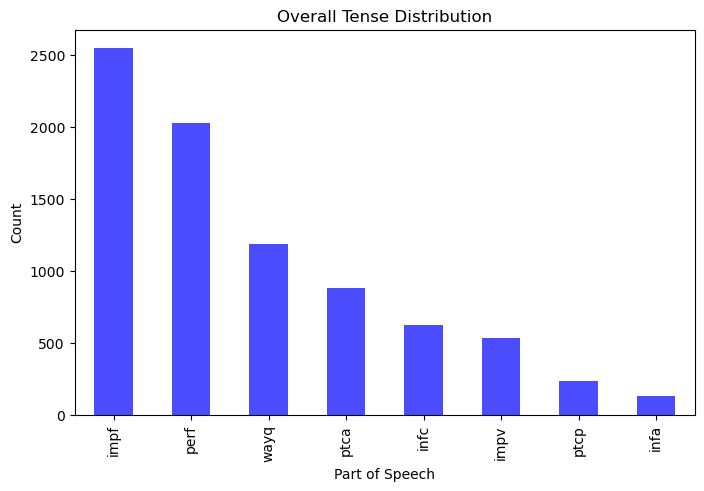

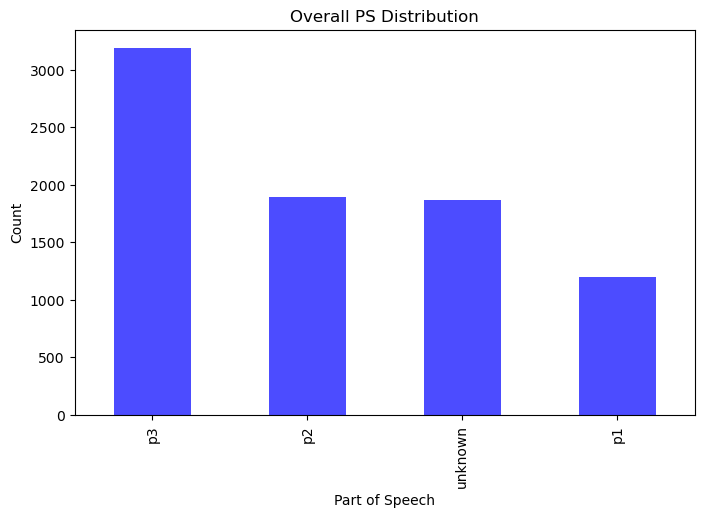

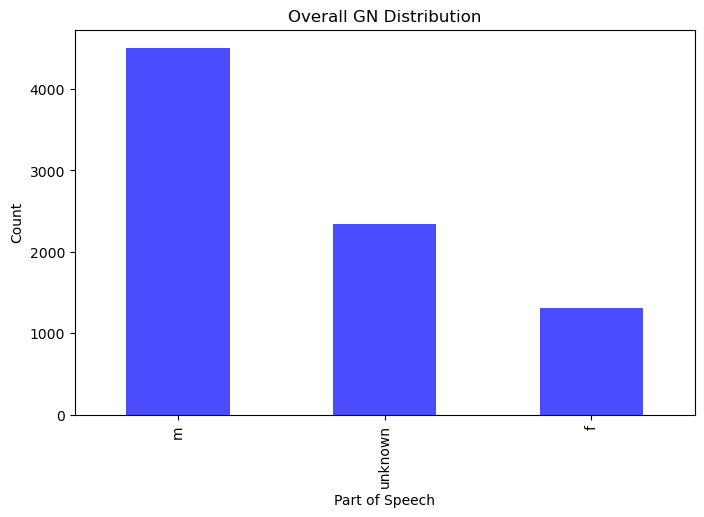

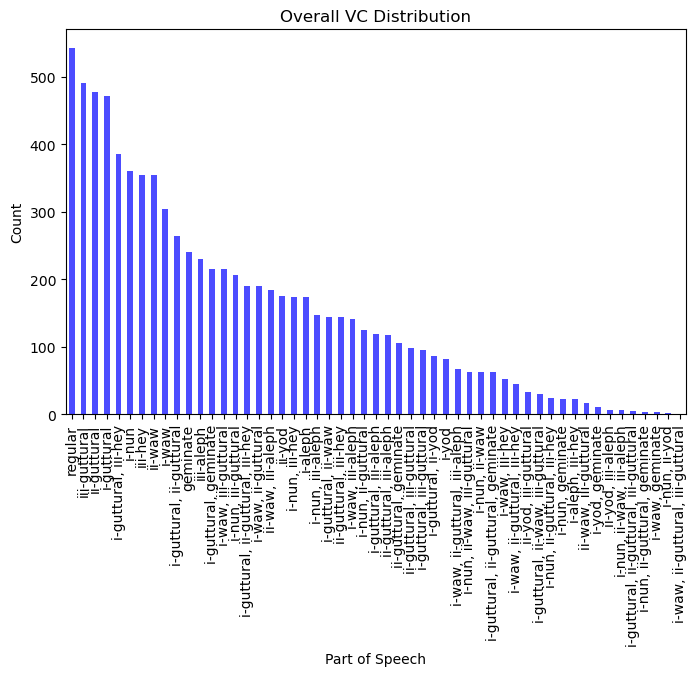

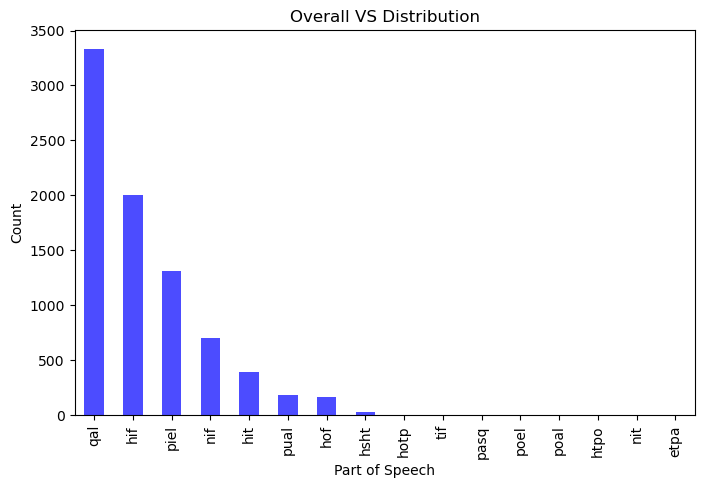

In [23]:
tense_counts= BHSallVerbalMorphologyFirstVersion['vt1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
tense_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

ps_counts= BHSallVerbalMorphologyFirstVersion['ps1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
ps_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall PS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

gn_counts= BHSallVerbalMorphologyFirstVersion['gn1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
gn_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall GN Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vc_counts= BHSallVerbalMorphologyFirstVersion['bol_dict_vc1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vc_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VC Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vs_counts= BHSallVerbalMorphologyFirstVersion['vs1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vs_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

### Retrieving All Verbal Forms

In [ ]:
AllVerbs='''
word bol_monad_num* bol_qere_presence* bol_lexeme_occurrences* bol_vt* dagesh* lex* number* vbe* vbs* uvf* prs* pfm* nme* freq_occ* freq_lex* st* rank_occ* bol_dict_abc* bol_dict_HebArm* bol_bhsa_word_order* bol_dict_vc* ps* nu* gn* vt* vs prs_nu* prs_ps* prs_gn* sp=verb pdp* bol_dict_EN* g_word_noaccent* language* 

'''
AllVerbs  = BHSa4c.search(AllVerbs)
BHSa4c.table(AllVerbs, start=1, end=2, multiFeatures=True, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(AllVerbs, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_all_verb-morphology.tsv')

In [5]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
BHSallVerbalMorphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/BHSa4c_BOL_all_verb-morphology.tsv', delimiter='\t', encoding='utf-16')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf


In [6]:
vc=BHSallVerbalMorphology.bol_dict_vc1.unique().tolist()
print(vc)

['ii-guttural, iii-aleph', 'i-guttural, iii-hey', 'i-guttural, ii-guttural', 'i-aleph', 'i-guttural, ii-guttural, iii-hey', 'ii-waw', 'regular', 'iii-hey', 'iii-aleph', 'ii-guttural, iii-guttural', 'i-waw, iii-aleph', 'i-guttural, ii-waw, iii-guttural', 'i-nun', 'ii-guttural', 'i-guttural, ii-waw', 'i-guttural', 'ii-guttural, iii-hey', 'iii-guttural', 'i-waw', 'i-nun, iii-guttural', 'ii-yod', 'geminate', 'i-nun, ii-waw, iii-guttural', 'ii-waw, iii-aleph', 'i-waw, iii-guttural', 'i-guttural, iii-aleph', 'i-waw, ii-guttural, iii-aleph', 'i-nun, iii-aleph', 'i-guttural, ii-guttural, geminate', 'i-yod', 'i-nun, ii-waw', 'i-nun, iii-hey', 'i-guttural, geminate', 'i-nun, ii-guttural', 'i-guttural, ii-yod', 'i-waw, ii-guttural', '4 root verb', 'ii-guttural, geminate', 'i-aleph, iii-hey', 'i-guttural, iii-guttural', 'i-nun, ii-guttural, iii-hey', 'ii-waw, iii-guttural', 'i-waw, iii-hey', 'i-nun, geminate', 'i-waw, ii-guttural, iii-hey', 'ii-yod, iii-guttural', 'ii-yod, iii-aleph', 'i-nun, ii-w

In [7]:
vt=BHSallVerbalMorphology.bol_vt1.unique().tolist()
print(vt)

['perf', 'ptca', 'wayq', 'juss', 'impf', 'infc', 'impv', 'infa', 'ptcp', 'coho']


In [8]:
vs=BHSallVerbalMorphology.vs1.unique().tolist()
print(vs)

['qal', 'piel', 'hif', 'nif', 'pual', 'hit', 'hof', 'hsht', 'pasq', 'hotp', 'nit', 'poal', 'poel', 'htpo', 'peal', 'tif', 'etpa', 'pael', 'haf', 'htpe', 'htpa', 'peil', 'etpe', 'afel', 'shaf']


#### Adding paragogic Nun as a data category

In [9]:
vbe=BHSallVerbalMorphology.vbe1.unique().tolist()
print(vbe)

[nan, 'H', 'W', 'TJ', 'WN', 'TM', 'NH', 'T', 'T=', 'J', 'H=', 'NW', 'TN', 'JN', 'TWN', 'N>', 'T==', 'N']


In [10]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['vbe1']=='JN')   
                                   ].head(10)


,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1
22673,22674,1_Samuel,1,14,141814,word,תִּשְׁתַּכָּרִ֑ין,141814,"qal: be, become drunk; pi: make drunk; hit: be...",שׁכר,7728,iii-guttural,18,141813,0,impf,DL_DF_DF,18,1,T.IC:T.AK.@RIJN,f,Hebrew,CKR[,absent,sg,278,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,HT,hit,impf
38340,38341,Isaiah,45,10,228041,word,תְּחִילִֽין׃ ס,228041,"qal: be in labour, be in labor, be in pain; wr...",חיל I,2321,"i-guttural, ii-yod",43,228040,0,impf,DL,40,1,T.:XIJLIJN,f,Hebrew,XJL[,absent,sg,15972,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,absent,qal,impf
43028,43029,Jeremiah,31,22,251047,word,תִּתְחַמָּקִ֔ין,251047,qal: turn away; hit: turn hither and thither;,חמק,2455,i-guttural,2,251046,0,impf,DL_DF,2,1,T.IT:XAM.@QIJN,f,Hebrew,XMQ[,absent,sg,16047,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,HT,hit,impf
63954,63955,Ruth,2,8,356401,word,תִדְבָּקִ֖ין,356401,"qal: stick, cling to; pu: be joined together; ...",דבק,1613,regular,54,356400,0,impf,_DL,54,2,TID:B.@QIJN,f,Hebrew,DBQ[,absent,sg,610,verb,T,absent,unknown,unknown,unknown,p2,9178,verb,NaN,absent,JN,absent,qal,impf
64035,64036,Ruth,2,21,356720,word,תִּדְבָּקִ֔ין,356720,"qal: stick, cling to; pu: be joined together; ...",דבק,1613,regular,54,356719,0,impf,DL_DF,54,2,T.ID:B.@QIJN,f,Hebrew,DBQ[,absent,sg,929,verb,T,absent,unknown,unknown,unknown,p2,9178,verb,NaN,absent,JN,absent,qal,impf
64065,64066,Ruth,3,4,356851,word,תַּעֲשִֽׂין׃,356851,"qal: do, make; ni: be made, done; pi: press, s...",עשׂה,6118,"i-guttural, iii-hey",2629,356850,0,juss,DL,2629,1,T.A<:AFIJN,f,Hebrew,<FH[,absent,sg,1060,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,absent,qal,impf
64129,64130,Ruth,3,18,357105,word,תֵּֽדְעִ֔ין,357105,qal: know; notice; learn; ni: make oneself kno...,ידע,2947,"i-waw, iii-guttural",944,357104,0,impf,DL,944,1,T.;D:<IJN,f,Hebrew,JD<[,absent,sg,1314,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,absent,qal,impf


In [11]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['language1']=='Hebrew')  
                       & (
                          (BHSallVerbalMorphology['vbe1']=='WN')   
                          | (BHSallVerbalMorphology['vbe1']=='JN')   
                       )
                                   ].count()


R                          322
S1                         322
S2                         322
S3                         322
NODE1                      322
TYPE1                      322
TEXT1                      322
bol_bhsa_word_order1       322
bol_dict_EN1               322
bol_dict_HebArm1           322
bol_dict_abc1              322
bol_dict_vc1               322
bol_lexeme_occurrences1    322
bol_monad_num1             322
bol_qere_presence1         322
bol_vt1                    322
dagesh1                    125
freq_lex1                  322
freq_occ1                  322
g_word_noaccent1           322
gn1                        322
language1                  322
lex1                       322
nme1                       322
nu1                        322
number1                    322
pdp1                       322
pfm1                       322
prs1                       322
prs_gn1                    322
prs_nu1                    322
prs_ps1                    322
ps1     

In [12]:
BHSallVerbalMorphology['paragogicNun'] = ((BHSallVerbalMorphology['language1']=='Hebrew')  
                       & (
                          (BHSallVerbalMorphology['vbe1']=='WN')   
                          | (BHSallVerbalMorphology['vbe1']=='JN')   
                       )  )
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False


In [13]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['paragogicNun']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun
187,188,Genesis,3,3,1231,word,תְּמֻתֽוּן׃,1231,"qal: die; pi: kill; hi: kill, put to death; ho...",מות,4054,ii-waw,835,1231,0,impf,DL_DF,835,3,T.:MUTW.N,m,Hebrew,MWT[,absent,pl,1231,verb,T,absent,unknown,unknown,unknown,p2,7211,verb,NaN,absent,WN,absent,qal,impf,True
190,191,Genesis,3,4,1241,word,תְּמֻתֽוּן׃,1241,"qal: die; pi: kill; hi: kill, put to death; ho...",מות,4054,ii-waw,835,1241,0,impf,DL_DF,835,3,T.:MUTW.N,m,Hebrew,MWT[,absent,pl,1241,verb,T,absent,unknown,unknown,unknown,p2,7211,verb,NaN,absent,WN,absent,qal,impf,True
1289,1290,Genesis,18,28,8300,word,יַחְסְר֞וּן,8300,"qal: lack, be lacking, decrease; pi: cause to ...",חסר,2534,i-guttural,24,8300,0,impf,NaN,24,1,JAX:S:RW.N,m,Hebrew,XSR[,absent,pl,8300,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,WN,absent,qal,impf,True
1297,1298,Genesis,18,29,8332,word,יִמָּצְא֥וּן,8332,qal: find; ni: be found; hi: present;,מצא,4546,iii-aleph,453,8332,0,impf,NaN,453,4,JIM.@Y:>W.N,m,Hebrew,MY>[,absent,pl,8332,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,WN,N,nif,impf,True
1303,1304,Genesis,18,30,8353,word,יִמָּצְא֥וּן,8353,qal: find; ni: be found; hi: present;,מצא,4546,iii-aleph,453,8353,0,impf,NaN,453,4,JIM.@Y:>W.N,m,Hebrew,MY>[,absent,pl,8353,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,WN,N,nif,impf,True


In [14]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['paragogicNun']==True)].count()

R                          322
S1                         322
S2                         322
S3                         322
NODE1                      322
TYPE1                      322
TEXT1                      322
bol_bhsa_word_order1       322
bol_dict_EN1               322
bol_dict_HebArm1           322
bol_dict_abc1              322
bol_dict_vc1               322
bol_lexeme_occurrences1    322
bol_monad_num1             322
bol_qere_presence1         322
bol_vt1                    322
dagesh1                    125
freq_lex1                  322
freq_occ1                  322
g_word_noaccent1           322
gn1                        322
language1                  322
lex1                       322
nme1                       322
nu1                        322
number1                    322
pdp1                       322
pfm1                       322
prs1                       322
prs_gn1                    322
prs_nu1                    322
prs_ps1                    322
ps1     

#### Adding Emphatic Imperative as a data category

In [15]:
vbe=BHSallVerbalMorphology.vbe1.unique().tolist()
print(vbe)

[nan, 'H', 'W', 'TJ', 'WN', 'TM', 'NH', 'T', 'T=', 'J', 'H=', 'NW', 'TN', 'JN', 'TWN', 'N>', 'T==', 'N']


In [16]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['language1']=='Hebrew') 
                       & (BHSallVerbalMorphology['vbe1']=='H=')
                       & (BHSallVerbalMorphology['vt1']=='impv')
                                   ].head(10)


,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun
730,731,Genesis,11,3,4996,word,הָ֚בָה,4996,"qal: give (impv), come on (interj);",יהב,2952,"i-waw, ii-guttural",34,4996,0,impv,NaN,34,12,H@B@H,m,Hebrew,JHB[,absent,sg,4996,verb,NaN,absent,unknown,unknown,unknown,p2,2761,verb,NaN,absent,H=,absent,qal,impv,False
736,737,Genesis,11,4,5020,word,הָ֣בָה׀,5020,"qal: give (impv), come on (interj);",יהב,2952,"i-waw, ii-guttural",34,5020,0,impv,NaN,34,12,H@B@H,m,Hebrew,JHB[,absent,sg,5020,verb,NaN,absent,unknown,unknown,unknown,p2,2761,verb,NaN,absent,H=,absent,qal,impv,False
749,750,Genesis,11,7,5085,word,הָ֚בָה,5085,"qal: give (impv), come on (interj);",יהב,2952,"i-waw, ii-guttural",34,5085,0,impv,NaN,34,12,H@B@H,m,Hebrew,JHB[,absent,sg,5085,verb,NaN,absent,unknown,unknown,unknown,p2,2761,verb,NaN,absent,H=,absent,qal,impv,False
1022,1023,Genesis,15,9,6811,word,קְחָ֥ה,6811,"qal: take, grasp, seize; qal pass: take, grasp...",לקח,3831,"i-nun, iii-guttural",965,6811,0,impv,NaN,965,1,Q:X@H,m,Hebrew,LQX[,absent,sg,6811,verb,NaN,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,H=,absent,qal,impv,False
1458,1459,Genesis,19,32,9112,word,לְכָ֨ה,9112,"qal: go, walk; ni: be gone, fade; pi: go, walk...",הלך,1879,i-waw,1547,9112,0,impv,NaN,1547,34,L:K@H,m,Hebrew,HLK[,absent,sg,9112,verb,NaN,absent,unknown,unknown,unknown,p2,1123,verb,NaN,absent,H=,absent,qal,impv,False
1635,1636,Genesis,21,23,10032,word,הִשָּׁ֨בְעָה,10032,ni: swear; hi: swear;,שׁבע,7526,iii-guttural,185,10032,0,impv,NaN,185,5,HIC.@B:<@H,m,Hebrew,CB<[,absent,sg,10032,verb,H,absent,unknown,unknown,unknown,p2,5226,verb,NaN,absent,H=,N,nif,impv,False
2144,2145,Genesis,25,31,12917,word,מִכְרָ֥ה,12917,"qal: sell, give in other hands; ni: be sold; h...",מכר,4239,iii-guttural,80,12917,0,impv,NaN,80,5,MIK:R@H,m,Hebrew,MKR[,absent,sg,12917,verb,NaN,absent,unknown,unknown,unknown,p2,5226,verb,NaN,absent,H=,absent,qal,impv,False
2149,2150,Genesis,25,33,12940,word,הִשָּׁ֤בְעָה,12940,ni: swear; hi: swear;,שׁבע,7526,iii-guttural,185,12940,0,impv,NaN,185,5,HIC.@B:<@H,m,Hebrew,CB<[,absent,sg,12940,verb,H,absent,unknown,unknown,unknown,p2,5226,verb,NaN,absent,H=,N,nif,impv,False
2301,2302,Genesis,27,3,13682,word,צ֥וּדָה,13682,qal: hunt; pi: hunt;,צוד,6556,ii-waw,17,13682,0,impv,NaN,17,1,YW.D@H,m,Hebrew,YWD[,absent,sg,13682,verb,NaN,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,H=,absent,qal,impv,False
2304,2305,Genesis,27,4,13693,word,הָבִ֥יאָה,13693,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,13693,0,impv,NaN,2570,10,H@BIJ>@H,m,Hebrew,BW>[,absent,sg,13693,verb,NaN,absent,unknown,unknown,unknown,p2,3149,verb,NaN,absent,H=,H,hif,impv,False


In [17]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['language1']=='Hebrew') 
                       & (BHSallVerbalMorphology['vbe1']=='H=')
                       & (BHSallVerbalMorphology['vt1']=='impv')
                                   ].count()

R                          306
S1                         306
S2                         306
S3                         306
NODE1                      306
TYPE1                      306
TEXT1                      306
bol_bhsa_word_order1       306
bol_dict_EN1               306
bol_dict_HebArm1           306
bol_dict_abc1              306
bol_dict_vc1               306
bol_lexeme_occurrences1    306
bol_monad_num1             306
bol_qere_presence1         306
bol_vt1                    306
dagesh1                     35
freq_lex1                  306
freq_occ1                  306
g_word_noaccent1           306
gn1                        306
language1                  306
lex1                       306
nme1                       306
nu1                        306
number1                    306
pdp1                       306
pfm1                         5
prs1                       306
prs_gn1                    306
prs_nu1                    306
prs_ps1                    306
ps1     

In [18]:
BHSallVerbalMorphology['emphaticImpv'] = ((BHSallVerbalMorphology['language1']=='Hebrew') 
                                        & (BHSallVerbalMorphology['vbe1']=='H=')
                                        & (BHSallVerbalMorphology['vt1']=='impv'))
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False


In [19]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['emphaticImpv']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv
730,731,Genesis,11,3,4996,word,הָ֚בָה,4996,"qal: give (impv), come on (interj);",יהב,2952,"i-waw, ii-guttural",34,4996,0,impv,NaN,34,12,H@B@H,m,Hebrew,JHB[,absent,sg,4996,verb,NaN,absent,unknown,unknown,unknown,p2,2761,verb,NaN,absent,H=,absent,qal,impv,False,True
736,737,Genesis,11,4,5020,word,הָ֣בָה׀,5020,"qal: give (impv), come on (interj);",יהב,2952,"i-waw, ii-guttural",34,5020,0,impv,NaN,34,12,H@B@H,m,Hebrew,JHB[,absent,sg,5020,verb,NaN,absent,unknown,unknown,unknown,p2,2761,verb,NaN,absent,H=,absent,qal,impv,False,True
749,750,Genesis,11,7,5085,word,הָ֚בָה,5085,"qal: give (impv), come on (interj);",יהב,2952,"i-waw, ii-guttural",34,5085,0,impv,NaN,34,12,H@B@H,m,Hebrew,JHB[,absent,sg,5085,verb,NaN,absent,unknown,unknown,unknown,p2,2761,verb,NaN,absent,H=,absent,qal,impv,False,True
1022,1023,Genesis,15,9,6811,word,קְחָ֥ה,6811,"qal: take, grasp, seize; qal pass: take, grasp...",לקח,3831,"i-nun, iii-guttural",965,6811,0,impv,NaN,965,1,Q:X@H,m,Hebrew,LQX[,absent,sg,6811,verb,NaN,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,H=,absent,qal,impv,False,True
1458,1459,Genesis,19,32,9112,word,לְכָ֨ה,9112,"qal: go, walk; ni: be gone, fade; pi: go, walk...",הלך,1879,i-waw,1547,9112,0,impv,NaN,1547,34,L:K@H,m,Hebrew,HLK[,absent,sg,9112,verb,NaN,absent,unknown,unknown,unknown,p2,1123,verb,NaN,absent,H=,absent,qal,impv,False,True


#### Adding Hitpael Transposition as a data category

In [20]:
vbe=BHSallVerbalMorphology.pfm1.unique().tolist()
print(vbe)

['absent', 'M', 'J', 'T=', nan, 'N', 'H', 'T', '>', 'L']


In [21]:
BHSallVerbalMorphology[ (BHSallVerbalMorphology['language1']=='Hebrew') 
                       & (BHSallVerbalMorphology['vbs1']=='HT')
                       & (BHSallVerbalMorphology['lex1'].str.contains('^[FCSY]'))
                       & (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[TJN>].*[FCSY].[T]'))
                         | (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H].*[FCSY].[T]'))
                         )
                      ].head(10)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv
12685,12686,Numbers,16,13,80304,word,תִשְׂתָּרֵ֥ר,80304,qal: rule; hit: play the ruler;,שׂרר,8230,"ii-guttural, geminate",6,80303,0,impf,_DL,6,1,TIF:T.@R;R,m,Hebrew,FRR[,absent,sg,10694,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,NaN,HT,hit,impf,False,False
12686,12687,Numbers,16,13,80307,word,הִשְׂתָּרֵֽר׃,80307,qal: rule; hit: play the ruler;,שׂרר,8230,"ii-guttural, geminate",6,80306,0,infa,_DL,6,1,HIF:T.@R;R,unknown,Hebrew,FRR[,NaN,unknown,10697,advb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infa,False,False
22673,22674,1_Samuel,1,14,141814,word,תִּשְׁתַּכָּרִ֑ין,141814,"qal: be, become drunk; pi: make drunk; hit: be...",שׁכר,7728,iii-guttural,18,141813,0,impf,DL_DF_DF,18,1,T.IC:T.AK.@RIJN,f,Hebrew,CKR[,absent,sg,278,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,HT,hit,impf,True,False
25102,25103,1_Samuel,21,16,154738,word,הִשְׁתַּגֵּ֖עַ,154738,pu: be mad; hit: behave as a madman;,שׁגע,7553,iii-guttural,7,154737,0,infc,_DL,7,1,HIC:T.AG.;<A,unknown,Hebrew,CG<[,NaN,unknown,13202,verb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infc,False,False
25727,25728,1_Samuel,26,19,158045,word,הִסְתַּפֵּ֜חַ,158045,qal: attach to; ni: attach oneself to; pi: joi...,ספח,5454,iii-guttural,5,158044,0,infc,_DL,5,1,HIS:T.AP.;XA,unknown,Hebrew,SPX[,NaN,unknown,16509,verb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infc,False,False
28669,28670,2_Samuel,22,24,174539,word,אֶשְׁתַּמְּרָ֖ה,174539,"qal: keep watch, guard; ni: be guarded; beware...",שׁמר,7869,iii-guttural,468,174538,0,wayq,_DL,468,1,>EC:T.AM.:R@H,unknown,Hebrew,CMR[,absent,sg,14074,verb,>,absent,unknown,unknown,unknown,p1,12851,verb,NaN,absent,H=,HT,hit,wayq,False,False
30650,30651,1_Kings,14,2,187657,word,הִשְׁתַּנִּ֔ית,187657,qal: change; repeat; differ; ni: be repeated; ...,שׁנה,7900,iii-hey,25,187656,0,perf,_DL,25,1,HIC:T.AN.IJT,f,Hebrew,CNH[,absent,sg,11580,verb,absent,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,T=,HT,hit,perf,False,False
36824,36825,Isaiah,28,20,221177,word,הִשְׂתָּרֵ֑עַ,221177,qal: deformed; hit: stretch oneself;,שׂרע,8220,"ii-guttural, iii-guttural",3,221176,0,infc,_DL,3,1,HIF:T.@R;<A,unknown,Hebrew,FR<[,NaN,unknown,9108,verb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infc,False,False
36895,36896,Isaiah,29,9,221496,word,הִשְׁתַּֽעַשְׁע֖וּ,221496,qal: be pasted together; hit: be pasted togeth...,שׁעע II,7926,"ii-guttural, geminate",3,221495,0,impv,_DL,3,1,HIC:T.A<AC:<W.,m,Hebrew,C<<=[,absent,pl,9427,verb,NaN,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,W,HT,hit,impv,False,False
36928,36929,Isaiah,29,14,221622,word,תִּסְתַּתָּֽר׃ ס,221622,"ni: (intransitive) conceal, hide; pi: hide; pu...",סתר,5502,iii-guttural,81,221621,0,impf,DL_DF_DF,81,1,T.IS:T.AT.@R,f,Hebrew,STR[,absent,sg,9553,verb,T=,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,NaN,HT,hit,impf,False,False


In [22]:
BHSallVerbalMorphology['Transposition'] = (
                                            (BHSallVerbalMorphology['language1']=='Hebrew') 
                                           & (BHSallVerbalMorphology['vbs1']=='HT')
                                           & (BHSallVerbalMorphology['lex1'].str.contains('^[FCSY]'))
                                           & (
                                                 (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[TJN>].*[FCSY].[T]'))
                                               | (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H].*[FCSY].[T]'))
                                              )
                                           )
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False


In [23]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['Transposition']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition
12685,12686,Numbers,16,13,80304,word,תִשְׂתָּרֵ֥ר,80304,qal: rule; hit: play the ruler;,שׂרר,8230,"ii-guttural, geminate",6,80303,0,impf,_DL,6,1,TIF:T.@R;R,m,Hebrew,FRR[,absent,sg,10694,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,NaN,HT,hit,impf,False,False,True
12686,12687,Numbers,16,13,80307,word,הִשְׂתָּרֵֽר׃,80307,qal: rule; hit: play the ruler;,שׂרר,8230,"ii-guttural, geminate",6,80306,0,infa,_DL,6,1,HIF:T.@R;R,unknown,Hebrew,FRR[,NaN,unknown,10697,advb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infa,False,False,True
22673,22674,1_Samuel,1,14,141814,word,תִּשְׁתַּכָּרִ֑ין,141814,"qal: be, become drunk; pi: make drunk; hit: be...",שׁכר,7728,iii-guttural,18,141813,0,impf,DL_DF_DF,18,1,T.IC:T.AK.@RIJN,f,Hebrew,CKR[,absent,sg,278,verb,T,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,JN,HT,hit,impf,True,False,True
25102,25103,1_Samuel,21,16,154738,word,הִשְׁתַּגֵּ֖עַ,154738,pu: be mad; hit: behave as a madman;,שׁגע,7553,iii-guttural,7,154737,0,infc,_DL,7,1,HIC:T.AG.;<A,unknown,Hebrew,CG<[,NaN,unknown,13202,verb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infc,False,False,True
25727,25728,1_Samuel,26,19,158045,word,הִסְתַּפֵּ֜חַ,158045,qal: attach to; ni: attach oneself to; pi: joi...,ספח,5454,iii-guttural,5,158044,0,infc,_DL,5,1,HIS:T.AP.;XA,unknown,Hebrew,SPX[,NaN,unknown,16509,verb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,HT,hit,infc,False,False,True


In [24]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['Transposition']==True)].count()

R                          36
S1                         36
S2                         36
S3                         36
NODE1                      36
TYPE1                      36
TEXT1                      36
bol_bhsa_word_order1       36
bol_dict_EN1               36
bol_dict_HebArm1           36
bol_dict_abc1              36
bol_dict_vc1               36
bol_lexeme_occurrences1    36
bol_monad_num1             36
bol_qere_presence1         36
bol_vt1                    36
dagesh1                    36
freq_lex1                  36
freq_occ1                  36
g_word_noaccent1           36
gn1                        36
language1                  36
lex1                       36
nme1                       28
nu1                        36
number1                    36
pdp1                       36
pfm1                       27
prs1                       36
prs_gn1                    36
prs_nu1                    36
prs_ps1                    36
ps1                        36
rank_occ1 

#### Adding 1stPerson Way with "H"/"cohortative" ending as a data category

In [25]:
vbe=BHSallVerbalMorphology.vbe1.unique().tolist()
print(vbe)

[nan, 'H', 'W', 'TJ', 'WN', 'TM', 'NH', 'T', 'T=', 'J', 'H=', 'NW', 'TN', 'JN', 'TWN', 'N>', 'T==', 'N']


In [26]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                         (BHSallVerbalMorphology['vbe1']=='H=')
                       & (BHSallVerbalMorphology['vt1']=='wayq')
                       & (BHSallVerbalMorphology['ps1']=='p1')    
                      ].head(10)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition
3064,3065,Genesis,32,6,17528,word,אֶשְׁלְחָה֙,17528,qal: send; ni: be sent; pi: let go; stretch ou...,שׁלח,7754,iii-guttural,847,17527,0,wayq,NaN,847,9,>EC:L:X@H,unknown,Hebrew,CLX[,absent,sg,17528,verb,>,absent,unknown,unknown,unknown,p1,3421,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
3960,3961,Genesis,41,11,22547,word,נַּֽחַלְמָ֥ה,22547,qal: become strong; dream; hi: make strong;,חלם,2384,i-guttural,29,22546,0,wayq,DF,29,1,N.AXAL:M@H,unknown,Hebrew,XLM[,absent,pl,22547,verb,N,absent,unknown,unknown,unknown,p1,12851,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
4335,4336,Genesis,43,21,24560,word,נִּפְתְּחָה֙,24560,"qal: open; ni: be opened; pi: loose, free; hit...",פתח I,6478,iii-guttural,135,24559,0,wayq,DF_DL,135,2,N.IP:T.:X@H,unknown,Hebrew,PTX[,absent,pl,24560,verb,N,absent,unknown,unknown,unknown,p1,9178,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
11936,11937,Numbers,8,19,75564,word,אֶתְּנָ֨ה,75564,"qal: give, place; ni: be given, put; ho: be gi...",נתן,5268,i-nun,2010,75563,0,wayq,NaN,2010,37,>ET.:N@H,unknown,Hebrew,NTN[,absent,sg,5954,verb,>,absent,unknown,unknown,unknown,p1,1046,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
20623,20624,Judges,6,9,130600,word,אֶתְּנָ֥ה,130600,"qal: give, place; ni: be given, put; ho: be gi...",נתן,5268,i-nun,2010,130599,0,wayq,NaN,2010,37,>ET.:N@H,unknown,Hebrew,NTN[,absent,sg,3149,verb,>,absent,unknown,unknown,unknown,p1,1046,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
20624,20625,Judges,6,10,130605,word,אֹמְרָ֣ה,130605,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,130604,0,wayq,NaN,5307,45,>OM:R@H,unknown,Hebrew,>MR[,absent,sg,3154,verb,>,absent,unknown,unknown,unknown,p1,868,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
21265,21266,Judges,10,12,134355,word,אֹושִׁ֥יעָה,134355,ni: be saved; hi: save;,ישׁע,3352,"i-waw, iii-guttural",205,134354,0,wayq,NaN,205,1,>OWCIJ<@H,unknown,Hebrew,JC<[,absent,sg,6904,verb,>,absent,unknown,unknown,unknown,p1,12851,verb,NaN,absent,H=,H,hif,wayq,False,False,False
21469,21470,Judges,12,3,135442,word,אָשִׂ֨ימָה,135442,"qal: set, place; hi: set, make into; ho: be put;",שׂים,8127,ii-yod,583,135441,0,wayq,NaN,583,4,>@FIJM@H,unknown,Hebrew,FJM[,absent,sg,7991,verb,>,absent,unknown,unknown,unknown,p1,6060,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
21470,21471,Judges,12,3,135447,word,אֶעְבְּרָה֙,135447,"qal: pass over, transgress; ni: be crossed; pi...",עבר I,5539,i-guttural,548,135446,0,wayq,_DL,548,9,>E<:B.:R@H,unknown,Hebrew,<BR[,absent,sg,7996,verb,>,absent,unknown,unknown,unknown,p1,3421,verb,NaN,absent,H=,absent,qal,wayq,False,False,False
22844,22845,1_Samuel,2,28,142673,word,אֶתְּנָה֙,142673,"qal: give, place; ni: be given, put; ho: be gi...",נתן,5268,i-nun,2010,142672,0,wayq,NaN,2010,37,>ET.:N@H,unknown,Hebrew,NTN[,absent,sg,1137,verb,>,absent,unknown,unknown,unknown,p1,1046,verb,NaN,absent,H=,absent,qal,wayq,False,False,False


In [27]:
BHSallVerbalMorphology['WayCohortEnding'] = ((BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                                               (BHSallVerbalMorphology['vbe1']=='H=')
                                               & (BHSallVerbalMorphology['vt1']=='wayq')
                                               & (BHSallVerbalMorphology['ps1']=='p1')   
                                           )
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False


In [28]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['WayCohortEnding']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding
3064,3065,Genesis,32,6,17528,word,אֶשְׁלְחָה֙,17528,qal: send; ni: be sent; pi: let go; stretch ou...,שׁלח,7754,iii-guttural,847,17527,0,wayq,NaN,847,9,>EC:L:X@H,unknown,Hebrew,CLX[,absent,sg,17528,verb,>,absent,unknown,unknown,unknown,p1,3421,verb,NaN,absent,H=,absent,qal,wayq,False,False,False,True
3960,3961,Genesis,41,11,22547,word,נַּֽחַלְמָ֥ה,22547,qal: become strong; dream; hi: make strong;,חלם,2384,i-guttural,29,22546,0,wayq,DF,29,1,N.AXAL:M@H,unknown,Hebrew,XLM[,absent,pl,22547,verb,N,absent,unknown,unknown,unknown,p1,12851,verb,NaN,absent,H=,absent,qal,wayq,False,False,False,True
4335,4336,Genesis,43,21,24560,word,נִּפְתְּחָה֙,24560,"qal: open; ni: be opened; pi: loose, free; hit...",פתח I,6478,iii-guttural,135,24559,0,wayq,DF_DL,135,2,N.IP:T.:X@H,unknown,Hebrew,PTX[,absent,pl,24560,verb,N,absent,unknown,unknown,unknown,p1,9178,verb,NaN,absent,H=,absent,qal,wayq,False,False,False,True
11936,11937,Numbers,8,19,75564,word,אֶתְּנָ֨ה,75564,"qal: give, place; ni: be given, put; ho: be gi...",נתן,5268,i-nun,2010,75563,0,wayq,NaN,2010,37,>ET.:N@H,unknown,Hebrew,NTN[,absent,sg,5954,verb,>,absent,unknown,unknown,unknown,p1,1046,verb,NaN,absent,H=,absent,qal,wayq,False,False,False,True
20623,20624,Judges,6,9,130600,word,אֶתְּנָ֥ה,130600,"qal: give, place; ni: be given, put; ho: be gi...",נתן,5268,i-nun,2010,130599,0,wayq,NaN,2010,37,>ET.:N@H,unknown,Hebrew,NTN[,absent,sg,3149,verb,>,absent,unknown,unknown,unknown,p1,1046,verb,NaN,absent,H=,absent,qal,wayq,False,False,False,True


In [29]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['WayCohortEnding']==True)].count()

R                          98
S1                         98
S2                         98
S3                         98
NODE1                      98
TYPE1                      98
TEXT1                      98
bol_bhsa_word_order1       98
bol_dict_EN1               98
bol_dict_HebArm1           98
bol_dict_abc1              98
bol_dict_vc1               98
bol_lexeme_occurrences1    98
bol_monad_num1             98
bol_qere_presence1         98
bol_vt1                    98
dagesh1                    12
freq_lex1                  98
freq_occ1                  98
g_word_noaccent1           98
gn1                        98
language1                  98
lex1                       98
nme1                       98
nu1                        98
number1                    98
pdp1                       98
pfm1                       98
prs1                       98
prs_gn1                    98
prs_nu1                    98
prs_ps1                    98
ps1                        98
rank_occ1 

#### Adding Piel/Pual/Hitpael without DF as a data category

In [30]:
vbe=BHSallVerbalMorphology.dagesh1.unique().tolist()
print(vbe)

['DL', nan, 'DF', 'DF_DL', '_DL', 'DF_DF', 'DL_DF', 'DL_DF_DF', 'DF_Mappiq', '_DL_DL', 'DF_DL_DF', 'DF_DF_Mappiq', 'DL_Mappiq', 'DF_DF_DF', 'DL_DF_Mappiq', 'DL_DF_DL', '_DF_DF']


In [31]:
vbe=BHSallVerbalMorphology.vs1.unique().tolist()
print(vbe)

['qal', 'piel', 'hif', 'nif', 'pual', 'hit', 'hof', 'hsht', 'pasq', 'hotp', 'nit', 'poal', 'poel', 'htpo', 'peal', 'tif', 'etpa', 'pael', 'haf', 'htpe', 'htpa', 'peil', 'etpe', 'afel', 'shaf']


In [32]:
vbe=BHSallVerbalMorphology.vt1.unique().tolist()
print(vbe)

['perf', 'ptca', 'wayq', 'impf', 'infc', 'impv', 'infa', 'ptcp']


In [33]:
BHSallVerbalMorphology[
                      (BHSallVerbalMorphology['g_word_noaccent1']=='B.I<:AT@T:NIJ')
                     &(BHSallVerbalMorphology['language1']=='Hebrew') 
                     & 
                      (
                      (
                        (
                            (BHSallVerbalMorphology['vs1']=='piel')
                           |(BHSallVerbalMorphology['vs1']=='pual')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1']=='perf')
                         |(BHSallVerbalMorphology['vt1'].str.contains('inf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('imp'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                       )
                      )
                          
                |   
                          
                      (
                        (
                            (BHSallVerbalMorphology['vs1']=='piel')
                           |(BHSallVerbalMorphology['vs1']=='pual')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('impf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('way'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('ptc'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                     )
                |
                       (
                        (
                            (BHSallVerbalMorphology['vs1']=='hit')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1']=='perf')
                         |(BHSallVerbalMorphology['vt1'].str.contains('inf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('imp'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                      )
                          
                |   
                          
                      (
                        (
                            (BHSallVerbalMorphology['vs1']=='hit')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('impf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('way'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('ptc'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (    
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                     )                      
                     )
]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding
36296,36297,Isaiah,21,4,218782,word,בִּֽעֲתָ֑תְנִי,218782,ni: be terrified; pi: terrify;,בעת,1137,ii-guttural,16,218781,0,perf,DL,16,1,B.I<:AT@T:NIJ,f,Hebrew,B<T[,absent,sg,6713,verb,absent,NJ,unknown,sg,p1,p3,12851,verb,NaN,absent,H,absent,piel,perf,False,False,False,False


In [34]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('[MJTN>]:[>BGDHWZXVJKLMNS<PYQRFCT][U][>BGDHWZXVJKLMNS<PYQRFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) & (BHSallVerbalMorphology['vt1']=='wayq') & (BHSallVerbalMorphology['vs1'].str.contains('p.*l'))]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding
61148,61149,Job,31,15,343544,word,יְכֻנֶ֗נּוּ,343544,"ni: be firm, be established; pi: set up, const...",כון,3441,ii-waw,216,343543,0,wayq,NaN,216,1,J:KUNEN.W.,m,Hebrew,KWN[,absent,sg,7524,verb,J,HW,m,sg,p3,p3,12851,verb,NaN,N,NaN,absent,piel,wayq,False,False,False,False


##### Catching subelements in Piel und Pual

In [35]:
BHSallVerbalMorphology[
                      (
                          (BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                        (
                            (BHSallVerbalMorphology['vs1']=='piel')
                           |(BHSallVerbalMorphology['vs1']=='pual')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1']=='perf')
                         |(BHSallVerbalMorphology['vt1'].str.contains('inf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('imp'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                       )
                      )
                          
                |   
                          
                      (
                          (BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                        (
                            (BHSallVerbalMorphology['vs1']=='piel')
                           |(BHSallVerbalMorphology['vs1']=='pual')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('impf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('way'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('ptc'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                     )
    


].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding
490,491,Genesis,6,16,2897,word,תְּכַלֶ֣נָּה,2897,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,2897,0,impf,DL_DF,206,2,T.:KALEN.@H,m,Hebrew,KLH[,absent,sg,2897,verb,T,H,f,sg,p3,p2,9178,verb,NaN,N,NaN,absent,piel,impf,False,False,False,False
2211,2212,Genesis,26,14,13258,word,יְקַנְא֥וּ,13258,pi: be envious of; arouse jealousy; hi: make j...,קנא,6957,iii-aleph,34,13258,0,wayq,NaN,34,4,J:QAN:>W.,m,Hebrew,QN>[,absent,pl,13258,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False
2214,2215,Genesis,26,15,13276,word,יְמַלְא֖וּם,13276,"qal: be full, fill (with), be filled (with); n...",מלא,4250,iii-aleph,261,13276,0,wayq,NaN,292,2,J:MAL:>W.M,m,Hebrew,ML>[,absent,pl,13276,verb,J,M,m,pl,p3,p3,9178,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False
2998,2999,Genesis,31,39,17122,word,תְּבַקְשֶׁ֑נָּה,17122,pi: seek; pu: be sought;,בקשׁ,1180,regular,225,17121,0,impf,DL_DF,225,2,T.:BAQ:CEN.@H,m,Hebrew,BQC[,absent,sg,17122,verb,T,H,f,sg,p3,p2,9178,verb,NaN,N,NaN,absent,piel,impf,False,False,False,False
3521,3522,Genesis,37,11,20379,word,יְקַנְאוּ־,20379,pi: be envious of; arouse jealousy; hi: make j...,קנא,6957,iii-aleph,34,20378,0,wayq,NaN,34,4,J:QAN:>W.,m,Hebrew,QN>[,absent,pl,20379,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False


##### Catching subelements in Hitpael

In [36]:
BHSallVerbalMorphology[
                      ((BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                        (
                            (BHSallVerbalMorphology['vs1']=='hit')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1']=='perf')
                         |(BHSallVerbalMorphology['vt1'].str.contains('inf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('imp'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                      )
                          
                |   
                          
                      ((BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                        (
                            (BHSallVerbalMorphology['vs1']=='hit')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('impf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('way'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('ptc'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (    
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                     )   
    


].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding
6419,6420,Exodus,14,13,36484,word,הִֽתְיַצְב֗וּ,36484,"hit: take one's stand, position, stand (firm);...",יצב,3208,i-waw,48,36483,0,impv,NaN,48,9,HIT:JAY:BW.,m,Hebrew,JYB[,absent,pl,7721,verb,NaN,absent,unknown,unknown,unknown,p2,3421,verb,NaN,absent,W,HT,hit,impv,False,False,False,False
11347,11348,Numbers,1,18,69802,word,יִּתְיַֽלְד֥וּ,69802,"qal: bear, bring forth; beget; qal pass: bear,...",ילד,3096,i-waw,492,69801,0,wayq,DF,492,1,J.IT:JAL:DW.,m,Hebrew,JLD[,absent,pl,192,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,W,HT,hit,wayq,False,False,False,False
38913,38914,Isaiah,52,2,230323,word,הִתְנַעֲרִ֧י,230323,"qal: shake, shake off; ni: be shaken off, shak...",נער I,5149,"i-nun, ii-guttural",11,230322,0,impv,NaN,11,1,HIT:NA<:ARIJ,f,Hebrew,N<R[,absent,sg,18254,verb,NaN,absent,unknown,unknown,unknown,p2,12851,verb,NaN,absent,J,HT,hit,impv,False,False,False,False


##### Combining the subelements

In [37]:
BHSallVerbalMorphology['PielPualHit_wo_DF_compLengthening'] = ((BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                      (
                      (
                        (
                            (BHSallVerbalMorphology['vs1']=='piel')
                           |(BHSallVerbalMorphology['vs1']=='pual')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1']=='perf')
                         |(BHSallVerbalMorphology['vt1'].str.contains('inf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('imp'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                       )
                      )
                          
                |   
                          
                      (
                        (
                            (BHSallVerbalMorphology['vs1']=='piel')
                           |(BHSallVerbalMorphology['vs1']=='pual')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('impf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('way'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('ptc'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                     )
                |
                       (
                        (
                            (BHSallVerbalMorphology['vs1']=='hit')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1']=='perf')
                         |(BHSallVerbalMorphology['vt1'].str.contains('inf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('imp'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[H][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                      )
                          
                |   
                          
                      (
                        (
                            (BHSallVerbalMorphology['vs1']=='hit')
                        )
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('impf'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('way'))
                         |(BHSallVerbalMorphology['vt1'].str.contains('ptc'))
                        
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      &
                       (    
                           (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>][I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))                           
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT]\.[:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT]\.[:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[BGDKPT][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]')) 
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[>HWZXVJLMNS<YQRFC][:AEI][><R][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                          |(BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[MJTN>]\.[I][T]:[>HWZXVJLMNS<YQRFC][:AEI][BGDWZVJKLMNSPYQFCT][^\.].*[>BGDHWZXVJKLMNS<PYQRFCT]'))
                        
                       )
                     )                      
                     )
      )        
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False


In [38]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['PielPualHit_wo_DF_compLengthening']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening
490,491,Genesis,6,16,2897,word,תְּכַלֶ֣נָּה,2897,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,2897,0,impf,DL_DF,206,2,T.:KALEN.@H,m,Hebrew,KLH[,absent,sg,2897,verb,T,H,f,sg,p3,p2,9178,verb,NaN,N,NaN,absent,piel,impf,False,False,False,False,True
2211,2212,Genesis,26,14,13258,word,יְקַנְא֥וּ,13258,pi: be envious of; arouse jealousy; hi: make j...,קנא,6957,iii-aleph,34,13258,0,wayq,NaN,34,4,J:QAN:>W.,m,Hebrew,QN>[,absent,pl,13258,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True
2214,2215,Genesis,26,15,13276,word,יְמַלְא֖וּם,13276,"qal: be full, fill (with), be filled (with); n...",מלא,4250,iii-aleph,261,13276,0,wayq,NaN,292,2,J:MAL:>W.M,m,Hebrew,ML>[,absent,pl,13276,verb,J,M,m,pl,p3,p3,9178,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True
2998,2999,Genesis,31,39,17122,word,תְּבַקְשֶׁ֑נָּה,17122,pi: seek; pu: be sought;,בקשׁ,1180,regular,225,17121,0,impf,DL_DF,225,2,T.:BAQ:CEN.@H,m,Hebrew,BQC[,absent,sg,17122,verb,T,H,f,sg,p3,p2,9178,verb,NaN,N,NaN,absent,piel,impf,False,False,False,False,True
3521,3522,Genesis,37,11,20379,word,יְקַנְאוּ־,20379,pi: be envious of; arouse jealousy; hi: make j...,קנא,6957,iii-aleph,34,20378,0,wayq,NaN,34,4,J:QAN:>W.,m,Hebrew,QN>[,absent,pl,20379,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True


In [39]:
BHSallVerbalMorphology[  (BHSallVerbalMorphology['PielPualHit_wo_DF_compLengthening']==True) 
                       & (BHSallVerbalMorphology['bol_vt1'].str.contains('wayq'))
                      ].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening
2211,2212,Genesis,26,14,13258,word,יְקַנְא֥וּ,13258,pi: be envious of; arouse jealousy; hi: make j...,קנא,6957,iii-aleph,34,13258,0,wayq,NaN,34,4,J:QAN:>W.,m,Hebrew,QN>[,absent,pl,13258,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True
2214,2215,Genesis,26,15,13276,word,יְמַלְא֖וּם,13276,"qal: be full, fill (with), be filled (with); n...",מלא,4250,iii-aleph,261,13276,0,wayq,NaN,292,2,J:MAL:>W.M,m,Hebrew,ML>[,absent,pl,13276,verb,J,M,m,pl,p3,p3,9178,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True
3521,3522,Genesis,37,11,20379,word,יְקַנְאוּ־,20379,pi: be envious of; arouse jealousy; hi: make j...,קנא,6957,iii-aleph,34,20378,0,wayq,NaN,34,4,J:QAN:>W.,m,Hebrew,QN>[,absent,pl,20379,verb,J,absent,unknown,unknown,unknown,p3,6060,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True
4190,4191,Genesis,42,25,23851,word,יְמַלְא֣וּ,23851,"qal: be full, fill (with), be filled (with); n...",מלא,4250,iii-aleph,261,23850,0,wayq,NaN,292,12,J:MAL:>W.,m,Hebrew,ML>[,absent,pl,23851,verb,J,absent,unknown,unknown,unknown,p3,2761,verb,NaN,absent,W,absent,piel,wayq,False,False,False,False,True
6472,6473,Exodus,14,27,36807,word,יְנַעֵ֧ר,36807,"qal: shake, shake off; ni: be shaken off, shak...",נער I,5149,"i-nun, ii-guttural",11,36806,0,wayq,NaN,11,2,J:NA<;R,m,Hebrew,N<R[,absent,sg,8044,verb,J,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NaN,absent,piel,wayq,False,False,False,False,True


In [40]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['PielPualHit_wo_DF_compLengthening']==True)].count()

R                                    242
S1                                   242
S2                                   242
S3                                   242
NODE1                                242
TYPE1                                242
TEXT1                                242
bol_bhsa_word_order1                 242
bol_dict_EN1                         242
bol_dict_HebArm1                     242
bol_dict_abc1                        242
bol_dict_vc1                         242
bol_lexeme_occurrences1              242
bol_monad_num1                       242
bol_qere_presence1                   242
bol_vt1                              242
dagesh1                               53
freq_lex1                            242
freq_occ1                            242
g_word_noaccent1                     242
gn1                                  242
language1                            242
lex1                                 242
nme1                                 221
nu1             

In [41]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['g_word_noaccent1']=='B.I<:AT@T:NIJ')]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening
36296,36297,Isaiah,21,4,218782,word,בִּֽעֲתָ֑תְנִי,218782,ni: be terrified; pi: terrify;,בעת,1137,ii-guttural,16,218781,0,perf,DL,16,1,B.I<:AT@T:NIJ,f,Hebrew,B<T[,absent,sg,6713,verb,absent,NJ,unknown,sg,p1,p3,12851,verb,NaN,absent,H,absent,piel,perf,False,False,False,False,True


#### Adding Doubling of two consontants in Piel/Pual/Hitpael as a data category

In [42]:
# code working for perfect
BHSallVerbalMorphology[
                        (BHSallVerbalMorphology['vs1']=='piel')
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      & (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>BGDHWZXVJKLMNS<PYQRFCT][:]'))
].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening
55023,55024,Psalms,38,11,316708,word,סְ֭חַרְחַר,316708,"qal: through, wander around; pi: palpitate hea...",סחר,5351,ii-guttural,21,316707,0,perf,NaN,21,1,S:XAR:XAR,m,Hebrew,SXR[,absent,sg,6059,verb,absent,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,NaN,absent,piel,perf,False,False,False,False,False
65341,65342,Lamentations,1,20,363904,word,חֳמַרְמָ֔רוּ,363904,qal: cover; foam; pi: ferment;,חמר I,2458,i-guttural,5,363903,0,perf,NaN,5,2,X:@MAR:M@RW.,unknown,Hebrew,XMR[,absent,pl,396,verb,absent,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,W,absent,piel,perf,False,False,False,False,False
65409,65410,Lamentations,2,11,364185,word,חֳמַרְמְר֣וּ,364185,qal: cover; foam; pi: ferment;,חמר I,2458,i-guttural,5,364184,0,perf,NaN,5,2,X:@MAR:M:RW.,unknown,Hebrew,XMR[,absent,pl,677,verb,absent,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,W,absent,piel,perf,False,False,False,False,False


In [43]:
BHSallVerbalMorphology[
                     # Catching Guttural without compensatory lengthening (excluding X) in ptc
                     (
                        (BHSallVerbalMorphology['vs1']=='hit')
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('way'))
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[JT>N]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      & (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('[JT>N][\.][I][T][:][>BGDHWZXVJKLMNS<PYQRFCT][:AEIU][>XH<R][^\.]'))
                     )
    


].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening
1398,1399,Genesis,19,16,8774,word,יִּתְמַהְמָ֓הּ׀,8774,"hit: hesitate, delay, tarry, linger;",מָהַהּ,3971,ii-guttural,9,8774,0,wayq,DF_Mappiq,9,2,J.IT:MAH:M@H.,m,Hebrew,MHH[,absent,sg,8774,verb,J,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NaN,HT,hit,wayq,False,False,False,False,False


In [44]:
BHSallVerbalMorphology['PielPualHit_w_DoubleDoubling'] = ((BHSallVerbalMorphology['language1']=='Hebrew') 
                       &
                   (
                        (BHSallVerbalMorphology['vs1']=='hit')
                      & (
                          (BHSallVerbalMorphology['vt1'].str.contains('way'))
                        )
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[JT>N]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      & (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('[JT>N][\.][I][T][:][>BGDHWZXVJKLMNS<PYQRFCT][:AEIU][>XH<R][^\.]'))
                     )
                          
                |   
                   (       
                   (BHSallVerbalMorphology['vs1']=='piel')
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-waw.*')) # I needed to put 'astype(str)' there because there were NaN values in the data
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*ii-yod.*')) # I needed to put 'astype(str)' there because there were NaN values in the data                          
                      & (~BHSallVerbalMorphology['bol_dict_vc1'].astype(str).str.contains('.*geminate.*')) # I needed to put 'astype(str)' there because there were NaN values in the data  

                      & (~BHSallVerbalMorphology['pfm1'].astype(str).str.contains('[MJTN>]')) # I needed to put 'astype(str)' there because there were NaN values in the data
   
                      & (BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^[>BGDHWZXVJKLMNS<PYQRFCT][:]'))
                    )
)
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [45]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['PielPualHit_w_DoubleDoubling']==True)].count()

R                                    4
S1                                   4
S2                                   4
S3                                   4
NODE1                                4
TYPE1                                4
TEXT1                                4
bol_bhsa_word_order1                 4
bol_dict_EN1                         4
bol_dict_HebArm1                     4
bol_dict_abc1                        4
bol_dict_vc1                         4
bol_lexeme_occurrences1              4
bol_monad_num1                       4
bol_qere_presence1                   4
bol_vt1                              4
dagesh1                              1
freq_lex1                            4
freq_occ1                            4
g_word_noaccent1                     4
gn1                                  4
language1                            4
lex1                                 4
nme1                                 4
nu1                                  4
number1                  

In [46]:
BHSallVerbalMorphology[(BHSallVerbalMorphology['PielPualHit_w_DoubleDoubling']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
1398,1399,Genesis,19,16,8774,word,יִּתְמַהְמָ֓הּ׀,8774,"hit: hesitate, delay, tarry, linger;",מָהַהּ,3971,ii-guttural,9,8774,0,wayq,DF_Mappiq,9,2,J.IT:MAH:M@H.,m,Hebrew,MHH[,absent,sg,8774,verb,J,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NaN,HT,hit,wayq,False,False,False,False,False,True
55023,55024,Psalms,38,11,316708,word,סְ֭חַרְחַר,316708,"qal: through, wander around; pi: palpitate hea...",סחר,5351,ii-guttural,21,316707,0,perf,NaN,21,1,S:XAR:XAR,m,Hebrew,SXR[,absent,sg,6059,verb,absent,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,NaN,absent,piel,perf,False,False,False,False,False,True
65341,65342,Lamentations,1,20,363904,word,חֳמַרְמָ֔רוּ,363904,qal: cover; foam; pi: ferment;,חמר I,2458,i-guttural,5,363903,0,perf,NaN,5,2,X:@MAR:M@RW.,unknown,Hebrew,XMR[,absent,pl,396,verb,absent,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,W,absent,piel,perf,False,False,False,False,False,True
65409,65410,Lamentations,2,11,364185,word,חֳמַרְמְר֣וּ,364185,qal: cover; foam; pi: ferment;,חמר I,2458,i-guttural,5,364184,0,perf,NaN,5,2,X:@MAR:M:RW.,unknown,Hebrew,XMR[,absent,pl,677,verb,absent,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,W,absent,piel,perf,False,False,False,False,False,True


#### Exporting Enriched Data Set of Verbal Morphology

In [48]:
BHSallVerbalMorphology.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_morphology_all-verbs_with-additional-data-features_v20240220.xlsx')

### Selecting Qualifier Morphology: OTST551 & OTST552 & OTST625 morphology (only verbs that were part of the vocabulary)
- excluding 4 root verbs
- excluding Aramaic words
- excluding specific difficulties

In [139]:
BHSallVerbalMorphology=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_morphology_all-verbs_with-additional-data-features_v20240220.xlsx')

In [140]:
pd.set_option('display.max_rows', None)
BHSallVerbalMorphology.head()

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [141]:
BHSallVerbalMorphology = BHSallVerbalMorphology.drop("Unnamed: 0", axis='columns')
BHSallVerbalMorphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [142]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphology[
                                                          (BHSallVerbalMorphology['bol_dict_vc1']!='4 root verb') 
                                                        & (BHSallVerbalMorphology['language1']=='Hebrew')
                                                        & (~BHSallVerbalMorphology['g_word_noaccent1'].str.contains('^\*') # excluding ketiv qere matters
                                                        & (
                                                              (BHSallVerbalMorphology['vs1']=='qal')
                                                            | (BHSallVerbalMorphology['vs1']=='nif')
                                                            | (BHSallVerbalMorphology['vs1']=='piel')
                                                            | (BHSallVerbalMorphology['vs1']=='pual')
                                                            | (BHSallVerbalMorphology['vs1']=='hit')
                                                            | (BHSallVerbalMorphology['vs1']=='hif')
                                                            | (BHSallVerbalMorphology['vs1']=='hof')
                                                          )
                                                          )]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [143]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72025 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  72025 non-null  int64 
 1   S1                                 72025 non-null  object
 2   S2                                 72025 non-null  int64 
 3   S3                                 72025 non-null  int64 
 4   NODE1                              72025 non-null  int64 
 5   TYPE1                              72025 non-null  object
 6   TEXT1                              72025 non-null  object
 7   bol_bhsa_word_order1               72025 non-null  int64 
 8   bol_dict_EN1                       72025 non-null  object
 9   bol_dict_HebArm1                   72025 non-null  object
 10  bol_dict_abc1                      72025 non-null  int64 
 11  bol_dict_vc1                       72025 non-null  object
 12  bol_

#### Excluding 1stP Way forms with H

In [144]:
vt=BHSallVerbalMorphologyOTST551_552_625.WayCohortEnding.unique().tolist()
print(vt)

[False, True]


In [145]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                              (~BHSallVerbalMorphologyOTST551_552_625['WayCohortEnding']==True)
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [146]:
BHSallVerbalMorphologyOTST551_552_625[(BHSallVerbalMorphologyOTST551_552_625['WayCohortEnding']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling


In [147]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71928 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71928 non-null  int64 
 1   S1                                 71928 non-null  object
 2   S2                                 71928 non-null  int64 
 3   S3                                 71928 non-null  int64 
 4   NODE1                              71928 non-null  int64 
 5   TYPE1                              71928 non-null  object
 6   TEXT1                              71928 non-null  object
 7   bol_bhsa_word_order1               71928 non-null  int64 
 8   bol_dict_EN1                       71928 non-null  object
 9   bol_dict_HebArm1                   71928 non-null  object
 10  bol_dict_abc1                      71928 non-null  int64 
 11  bol_dict_vc1                       71928 non-null  object
 12  bol_

#### Excluding Emphatic Imperatives

In [148]:
vt=BHSallVerbalMorphologyOTST551_552_625.emphaticImpv.unique().tolist()
print(vt)

[False, True]


In [149]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                              (~BHSallVerbalMorphologyOTST551_552_625['emphaticImpv']==True)
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [150]:
BHSallVerbalMorphologyOTST551_552_625[(BHSallVerbalMorphologyOTST551_552_625['emphaticImpv']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling


In [151]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71629 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71629 non-null  int64 
 1   S1                                 71629 non-null  object
 2   S2                                 71629 non-null  int64 
 3   S3                                 71629 non-null  int64 
 4   NODE1                              71629 non-null  int64 
 5   TYPE1                              71629 non-null  object
 6   TEXT1                              71629 non-null  object
 7   bol_bhsa_word_order1               71629 non-null  int64 
 8   bol_dict_EN1                       71629 non-null  object
 9   bol_dict_HebArm1                   71629 non-null  object
 10  bol_dict_abc1                      71629 non-null  int64 
 11  bol_dict_vc1                       71629 non-null  object
 12  bol_

#### Excluding Piel/Pual/Hitpael without DF and without compensatory lengtheninbg

In [152]:
vt=BHSallVerbalMorphologyOTST551_552_625.PielPualHit_wo_DF_compLengthening.unique().tolist()
print(vt)

[False, True]


In [153]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                              (~BHSallVerbalMorphologyOTST551_552_625['PielPualHit_wo_DF_compLengthening']==True)
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [154]:
BHSallVerbalMorphologyOTST551_552_625[(BHSallVerbalMorphologyOTST551_552_625['PielPualHit_wo_DF_compLengthening']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling


In [155]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71390 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71390 non-null  int64 
 1   S1                                 71390 non-null  object
 2   S2                                 71390 non-null  int64 
 3   S3                                 71390 non-null  int64 
 4   NODE1                              71390 non-null  int64 
 5   TYPE1                              71390 non-null  object
 6   TEXT1                              71390 non-null  object
 7   bol_bhsa_word_order1               71390 non-null  int64 
 8   bol_dict_EN1                       71390 non-null  object
 9   bol_dict_HebArm1                   71390 non-null  object
 10  bol_dict_abc1                      71390 non-null  int64 
 11  bol_dict_vc1                       71390 non-null  object
 12  bol_

#### Excluding Piel/Pual/Hitpael with double doubling

In [156]:
dd=BHSallVerbalMorphologyOTST551_552_625.PielPualHit_w_DoubleDoubling.unique().tolist()
print(dd)

[False, True]


In [157]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                              (~BHSallVerbalMorphologyOTST551_552_625['PielPualHit_w_DoubleDoubling']==True)
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [158]:
BHSallVerbalMorphologyOTST551_552_625[(BHSallVerbalMorphologyOTST551_552_625['PielPualHit_w_DoubleDoubling']==True)].head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling


In [159]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71386 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71386 non-null  int64 
 1   S1                                 71386 non-null  object
 2   S2                                 71386 non-null  int64 
 3   S3                                 71386 non-null  int64 
 4   NODE1                              71386 non-null  int64 
 5   TYPE1                              71386 non-null  object
 6   TEXT1                              71386 non-null  object
 7   bol_bhsa_word_order1               71386 non-null  int64 
 8   bol_dict_EN1                       71386 non-null  object
 9   bol_dict_HebArm1                   71386 non-null  object
 10  bol_dict_abc1                      71386 non-null  int64 
 11  bol_dict_vc1                       71386 non-null  object
 12  bol_

#### Excluding Inf.Abs preceded by Prepositions

In [131]:
InfAbs='''
phrase
   w1:word sp=prep|subs|art
   w2:word bol_monad_num* bol_qere_presence* bol_lexeme_occurrences* bol_vt* dagesh* lex* number* vbe* vbs* uvf* prs* pfm* nme* freq_occ* freq_lex* st* rank_occ* bol_dict_abc* bol_dict_HebArm* bol_bhsa_word_order* bol_dict_vc* ps* nu* gn* vt=infa vs prs_nu* prs_ps* prs_gn* sp=verb pdp* bol_dict_EN* g_word_noaccent* language* 

w1 <: w2

'''
InfAbs  = BHSa4c.search(InfAbs)
BHSa4c.table(InfAbs, start=1, end=25, multiFeatures=True, condensed=False, colorMap={1: 'cyan'})

  9.94s 36 results


n,p,phrase,word,word
1,Numbers 11:25,כְּנֹ֤וחַ,כְּ,נֹ֤וחַ
2,Deuteronomy 3:5,לְבַ֛ד מֵעָרֵ֥י הַפְּרָזִ֖י הַרְבֵּ֥ה מְאֹֽד׃,פְּרָזִ֖י,הַרְבֵּ֥ה
3,Deuteronomy 32:8,בְּהַנְחֵ֤ל,בְּ,הַנְחֵ֤ל
4,Joshua 2:16,עַ֚ד שֹׁ֣וב,עַ֚ד,שֹׁ֣וב
5,Joshua 3:13,כְּנֹ֣וחַ,כְּ,נֹ֣וחַ
6,Joshua 22:8,בִּנְכָסִ֨ים רַבִּ֜ים וּבְמִקְנֶ֣ה רַב־מְאֹ֔ד בְּכֶ֨סֶף וּבְזָהָ֜ב וּבִנְחֹ֧שֶׁת וּבְבַרְזֶ֛ל וּבִשְׂלָמֹ֖ות הַרְבֵּ֣ה מְאֹ֑ד,שְׂלָמֹ֖ות,הַרְבֵּ֣ה
7,Judges 13:21,לְהֵרָאֹ֖ה,לְ,הֵרָאֹ֖ה
8,1_Samuel 1:9,אַחֲרֵ֣י שָׁתֹ֑ה,אַחֲרֵ֣י,שָׁתֹ֑ה
9,1_Samuel 3:21,לְהֵרָאֹ֣ה,לְ,הֵרָאֹ֣ה
10,1_Kings 5:9,תְבוּנָ֖ה הַרְבֵּ֣ה מְאֹ֑ד וְרֹ֣חַב לֵ֔ב כַּחֹ֕ול,תְבוּנָ֖ה,הַרְבֵּ֣ה


In [132]:
BHSa4c.export(InfAbs, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='ProblematicInfAbs.tsv')

In [133]:
InfAbsPrep=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/ProblematicInfAbs.tsv', delimiter='\t', encoding='utf-16')

InfAbsPrep.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,sp2,NODE3,TYPE3,TEXT3,bol_bhsa_word_order3,bol_dict_EN3,bol_dict_HebArm3,bol_dict_abc3,bol_dict_vc3,bol_lexeme_occurrences3,bol_monad_num3,bol_qere_presence3,bol_vt3,dagesh3,freq_lex3,freq_occ3,g_word_noaccent3,gn3,language3,lex3,nme3,nu3,number3,pdp3,pfm3,prs3,prs_gn3,prs_nu3,prs_ps3,ps3,rank_occ3,sp3,st3,uvf3,vbe3,vbs3,vs3,vt3
0,1,Numbers,11,25,695847,phrase,כְּנֹ֤וחַ,77359,word,כְּ,prep,77360,word,נֹ֤וחַ,77360,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,77359,0,infa,NaN,141,7,NOWXA,unknown,Hebrew,NWX[,NaN,unknown,7750,verb,NaN,absent,unknown,unknown,unknown,unknown,4072,verb,a,absent,NaN,absent,qal,infa
1,2,Deuteronomy,3,5,705225,phrase,לְבַ֛ד מֵעָרֵ֥י הַפְּרָזִ֖י הַרְבֵּ֥ה מְאֹֽד׃,94607,word,פְּרָזִ֖י,subs,94608,word,הַרְבֵּ֥ה,94608,"qal: be numerous, become numerous, be great; p...",רבה I,7129,"i-guttural, iii-hey",224,94607,0,infa,_DL,224,66,HAR:B.;H,unknown,Hebrew,RBH[,NaN,unknown,1810,advb,NaN,absent,unknown,unknown,unknown,unknown,607,verb,a,absent,NaN,H,hif,infa
2,3,Deuteronomy,32,8,714859,phrase,בְּהַנְחֵ֤ל,111542,word,בְּ,prep,111543,word,הַנְחֵ֤ל,111543,"qal: obtain, receive property; pi: divide as p...",נחל,5023,"i-nun, ii-guttural",59,111542,0,infa,NaN,59,1,HAN:X;L,unknown,Hebrew,NXL[,NaN,unknown,18745,verb,NaN,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,H,hif,infa
3,4,Joshua,2,16,716230,phrase,עַ֚ד שֹׁ֣וב,113743,word,עַ֚ד,prep,113744,word,שֹׁ֣וב,113744,"qal: turn, return, repeat; pi: bring back; sed...",שׁוב I,7576,ii-waw,1037,113743,0,infa,NaN,1038,85,COWB,unknown,Hebrew,CWB[,NaN,unknown,819,verb,NaN,absent,unknown,unknown,unknown,unknown,481,verb,a,absent,NaN,absent,qal,infa
4,5,Joshua,3,13,716503,phrase,כְּנֹ֣וחַ,114223,word,כְּ,prep,114224,word,נֹ֣וחַ,114224,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,114223,0,infa,NaN,141,7,NOWXA,unknown,Hebrew,NWX[,NaN,unknown,1299,verb,NaN,absent,unknown,unknown,unknown,unknown,4072,verb,a,absent,NaN,absent,qal,infa


In [136]:
InfAbsPrepMonads=InfAbsPrep['bol_monad_num3']
InfAbsPrepMonads.head(50)

0      77359
1      94607
2     111542
3     113743
4     114223
5     125439
6     136154
7     141712
8     143259
9     179525
10    184546
11    184583
12    203451
13    203491
14    214291
15    221825
16    222066
17    257842
18    259216
19    259419
20    271915
21    304267
22    316782
23    318105
24    344708
25    346950
26    352564
27    362875
28    382676
29    385863
30    388434
31    412378
32    413774
33    414411
34    418428
35    422541
Name: bol_monad_num3, dtype: int64

In [162]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                            ~(
                                                   (BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==77359)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==94607)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==111542)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==113743)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==114223)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==125439)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==136154)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==141712)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==143259)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==179525)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==184546)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==184583)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==203451)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==203491)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==214291)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==221825)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==222066)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==257842)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==259216)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==259419)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==271915)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==304267)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==316782)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==318105)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==344708)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==346950)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==352564)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==362875)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==382676)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==385863)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==388434)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==412378)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==413774)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==414411)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==418428)
                                                  |(BHSallVerbalMorphologyOTST551_552_625['bol_monad_num1']==422541)
                                               )                                               
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [163]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71351 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71351 non-null  int64 
 1   S1                                 71351 non-null  object
 2   S2                                 71351 non-null  int64 
 3   S3                                 71351 non-null  int64 
 4   NODE1                              71351 non-null  int64 
 5   TYPE1                              71351 non-null  object
 6   TEXT1                              71351 non-null  object
 7   bol_bhsa_word_order1               71351 non-null  int64 
 8   bol_dict_EN1                       71351 non-null  object
 9   bol_dict_HebArm1                   71351 non-null  object
 10  bol_dict_abc1                      71351 non-null  int64 
 11  bol_dict_vc1                       71351 non-null  object
 12  bol_

#### Removing difficult data

##### ML>[ participle forms

In [164]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                            ~(  
                                               (BHSallVerbalMorphologyOTST551_552_625['lex1']=='ML>[')
                                            &  (
                                                   (BHSallVerbalMorphologyOTST551_552_625['vs1']=='piel')
                                                  |(BHSallVerbalMorphologyOTST551_552_625['vs1']=='pual')
                                                  |(BHSallVerbalMorphologyOTST551_552_625['vs1']=='nif')
                                                  |(BHSallVerbalMorphologyOTST551_552_625['vs1']=='qal')
                                               )
                                            &  (BHSallVerbalMorphologyOTST551_552_625['vt1'].str.contains('ptc')) 
                                             )
                                               
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [165]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71302 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71302 non-null  int64 
 1   S1                                 71302 non-null  object
 2   S2                                 71302 non-null  int64 
 3   S3                                 71302 non-null  int64 
 4   NODE1                              71302 non-null  int64 
 5   TYPE1                              71302 non-null  object
 6   TEXT1                              71302 non-null  object
 7   bol_bhsa_word_order1               71302 non-null  int64 
 8   bol_dict_EN1                       71302 non-null  object
 9   bol_dict_HebArm1                   71302 non-null  object
 10  bol_dict_abc1                      71302 non-null  int64 
 11  bol_dict_vc1                       71302 non-null  object
 12  bol_

##### Irregular i-Yod  forms in hifil (יְהֹודֶה, יְהֹודֻךָ)
Some i-yod forms squeeze an unexpected Hey between the preformative and the first root consonant. A total of four exceptional forms can be found.

In [166]:
BHSallVerbalMorphologyOTST551_552_625.loc[
                                           (BHSallVerbalMorphologyOTST551_552_625['g_word_noaccent1'].str.contains('^J:HOW.*'))
                                         & (BHSallVerbalMorphologyOTST551_552_625['vs1'].str.contains('^hif'))                                         
                                         & (BHSallVerbalMorphologyOTST551_552_625['lex1'].str.contains('^J.*\['))             
                                         ]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
24565,24566,1_Samuel,17,47,151886,word,יְהֹושִׁ֣יעַ,151886,ni: be saved; hi: save;,ישׁע,3352,"i-waw, iii-guttural",205,151885,0,impf,NaN,205,2,J:HOWCIJ<A,m,Hebrew,JC<[,absent,sg,10350,verb,J,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
55346,55347,Psalms,45,18,318073,word,יְ֝הֹודֻ֗ךָ,318073,"hit: confess; hi: thank, praise, confess;",ידה I,2932,"i-waw, iii-hey",111,318072,0,impf,NaN,111,1,J:HOWDUK@,m,Hebrew,JDH[,absent,pl,7424,verb,J,K,m,sg,p2,p3,12851,verb,NaN,absent,W,H,hif,impf,False,False,False,False,False,False
58265,58266,Psalms,116,6,330935,word,יְהֹושִֽׁיעַ׃,330935,ni: be saved; hi: save;,ישׁע,3352,"i-waw, iii-guttural",205,330934,0,impf,NaN,205,2,J:HOWCIJ<A,m,Hebrew,JC<[,absent,sg,20286,verb,J,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
69208,69209,Nehemiah,11,17,389527,word,יְהֹודֶ֣ה,389527,"hit: confess; hi: thank, praise, confess;",ידה I,2932,"i-waw, iii-hey",111,389526,0,impf,NaN,111,820,J:HOWDEH,m,Hebrew,JDH[,absent,sg,6113,verb,J,absent,unknown,unknown,unknown,p3,40,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False


In [167]:
BHSallVerbalMorphologyOTST551_552_625=BHSallVerbalMorphologyOTST551_552_625[
                                            ~(  
                                           (BHSallVerbalMorphologyOTST551_552_625['g_word_noaccent1'].str.contains('^J:HOW.*'))
                                         & (BHSallVerbalMorphologyOTST551_552_625['vs1'].str.contains('^hif'))                                         
                                         & (BHSallVerbalMorphologyOTST551_552_625['lex1'].str.contains('^J.*\[')) 
                                             )
                                               
                                          ]
BHSallVerbalMorphologyOTST551_552_625.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [168]:
BHSallVerbalMorphologyOTST551_552_625.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71298 entries, 0 to 73709
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   R                                  71298 non-null  int64 
 1   S1                                 71298 non-null  object
 2   S2                                 71298 non-null  int64 
 3   S3                                 71298 non-null  int64 
 4   NODE1                              71298 non-null  int64 
 5   TYPE1                              71298 non-null  object
 6   TEXT1                              71298 non-null  object
 7   bol_bhsa_word_order1               71298 non-null  int64 
 8   bol_dict_EN1                       71298 non-null  object
 9   bol_dict_HebArm1                   71298 non-null  object
 10  bol_dict_abc1                      71298 non-null  int64 
 11  bol_dict_vc1                       71298 non-null  object
 12  bol_

##### Exporting cleaned up data

In [169]:
BHSallVerbalMorphologyOTST551_552_625.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/cleanedupVerbalMorphology551552625.xlsx')

In [170]:
BHSallVerbalMorphologyOTST551_552_625=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/cleanedupVerbalMorphology551552625.xlsx')
BHSallVerbalMorphologyOTST551_552_625.head()

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
0,0,1,Genesis,1,1,3,word,בָּרָ֣א,3,qal: create; ni: be created;,ברא I,1188,"ii-guttural, iii-aleph",48,3,0,perf,DL,48,15,B.@R@>,m,Hebrew,BR>[,absent,sg,3,verb,absent,absent,unknown,unknown,unknown,p3,2341,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
1,1,2,Genesis,1,2,15,word,הָיְתָ֥ה,15,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,15,0,perf,NaN,3561,209,H@J:T@H,f,Hebrew,HJH[,absent,sg,15,verb,absent,absent,unknown,unknown,unknown,p3,204,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2,2,3,Genesis,1,2,27,word,מְרַחֶ֖פֶת,27,qal: shake; pi: hover;,רחף,7238,"i-guttural, ii-guttural",3,27,0,ptca,NaN,3,1,M:RAXEPET,f,Hebrew,RXP[,T,sg,27,verb,M,absent,unknown,unknown,unknown,unknown,12851,verb,a,absent,NaN,absent,piel,ptca,False,False,False,False,False,False
3,3,4,Genesis,1,3,33,word,יֹּ֥אמֶר,33,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,33,0,wayq,DF,5307,2160,J.O>MER,m,Hebrew,>MR[,absent,sg,33,verb,J,absent,unknown,unknown,unknown,p3,18,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
4,4,5,Genesis,1,3,35,word,יְהִ֣י,35,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,35,0,juss,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,35,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


#### Sampling: 2 samples of each verbal form

##### OTST551 sampling: Using `sample`

In [171]:
BHSallVerbalMorphologyOTST551_sampled=BHSallVerbalMorphologyOTST551_552_625[
                                                                              (BHSallVerbalMorphology['bol_lexeme_occurrences1'] > 199)
                                                                            & (BHSallVerbalMorphology['bol_dict_vc1'] == 'regular')
                                                                          ]
BHSallVerbalMorphologyOTST551_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 1076 to 71181
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         1377 non-null   int64 
 1   R                                  1377 non-null   int64 
 2   S1                                 1377 non-null   object
 3   S2                                 1377 non-null   int64 
 4   S3                                 1377 non-null   int64 
 5   NODE1                              1377 non-null   int64 
 6   TYPE1                              1377 non-null   object
 7   TEXT1                              1377 non-null   object
 8   bol_bhsa_word_order1               1377 non-null   int64 
 9   bol_dict_EN1                       1377 non-null   object
 10  bol_dict_HebArm1                   1377 non-null   object
 11  bol_dict_abc1                      1377 non-null   int64 
 12  bo

/var/folders/03/qlrw_2h92mgd4n9sls7f84lc0000gn/T/ipykernel_43836/3841182330.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BHSallVerbalMorphologyOTST551_sampled=BHSallVerbalMorphologyOTST551_552_625[


In [172]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHSallVerbalMorphologyOTST551_sampled=BHSallVerbalMorphologyOTST551_sampled \
                                    .groupby(['ps1',
                                              'gn1',
                                              'nu1',
                                              'vs1',
                                              'bol_vt1',
                                              'bol_dict_vc1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .sample(n=3, random_state=1, replace=True)\
                                    .sort_values(['bol_monad_num1',
                                                  'bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1'], 
                                                 ascending=True)
BHSallVerbalMorphologyOTST551_sampled.head(10)

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
1076,1083,1084,Genesis,16,8,7186,word,בָ֖את,7186,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,7186,0,perf,NaN,2570,37,B@>T,f,Hebrew,BW>[,absent,sg,7186,verb,absent,absent,unknown,unknown,unknown,p2,1046,verb,NaN,absent,T=,absent,qal,perf,False,False,False,False,False,False
1076,1083,1084,Genesis,16,8,7186,word,בָ֖את,7186,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,7186,0,perf,NaN,2570,37,B@>T,f,Hebrew,BW>[,absent,sg,7186,verb,absent,absent,unknown,unknown,unknown,p2,1046,verb,NaN,absent,T=,absent,qal,perf,False,False,False,False,False,False
1076,1083,1084,Genesis,16,8,7186,word,בָ֖את,7186,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,7186,0,perf,NaN,2570,37,B@>T,f,Hebrew,BW>[,absent,sg,7186,verb,absent,absent,unknown,unknown,unknown,p2,1046,verb,NaN,absent,T=,absent,qal,perf,False,False,False,False,False,False
1364,1373,1374,Genesis,19,11,8653,word,הִכּוּ֙,8653,ni: be hit; pu: be smitten (down); hi: smite; ...,נכה,5092,"i-nun, iii-hey",500,8653,0,perf,NaN,500,13,HIK.W.,unknown,Hebrew,NKH[,absent,pl,8653,verb,absent,absent,unknown,unknown,unknown,p3,2594,verb,NaN,absent,W,H,hif,perf,False,False,False,False,False,False
1364,1373,1374,Genesis,19,11,8653,word,הִכּוּ֙,8653,ni: be hit; pu: be smitten (down); hi: smite; ...,נכה,5092,"i-nun, iii-hey",500,8653,0,perf,NaN,500,13,HIK.W.,unknown,Hebrew,NKH[,absent,pl,8653,verb,absent,absent,unknown,unknown,unknown,p3,2594,verb,NaN,absent,W,H,hif,perf,False,False,False,False,False,False
1364,1373,1374,Genesis,19,11,8653,word,הִכּוּ֙,8653,ni: be hit; pu: be smitten (down); hi: smite; ...,נכה,5092,"i-nun, iii-hey",500,8653,0,perf,NaN,500,13,HIK.W.,unknown,Hebrew,NKH[,absent,pl,8653,verb,absent,absent,unknown,unknown,unknown,p3,2594,verb,NaN,absent,W,H,hif,perf,False,False,False,False,False,False
1365,1374,1375,Genesis,19,11,8663,word,יִּלְא֖וּ,8663,"qal: be weary, become weary; ni: be made weary...",לאה,3686,"ii-guttural, iii-hey",19,8663,0,wayq,DF,19,1,J.IL:>W.,m,Hebrew,L>H[,absent,pl,8663,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,W,absent,qal,wayq,False,False,False,False,False,False
1365,1374,1375,Genesis,19,11,8663,word,יִּלְא֖וּ,8663,"qal: be weary, become weary; ni: be made weary...",לאה,3686,"ii-guttural, iii-hey",19,8663,0,wayq,DF,19,1,J.IL:>W.,m,Hebrew,L>H[,absent,pl,8663,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,W,absent,qal,wayq,False,False,False,False,False,False
1365,1374,1375,Genesis,19,11,8663,word,יִּלְא֖וּ,8663,"qal: be weary, become weary; ni: be made weary...",לאה,3686,"ii-guttural, iii-hey",19,8663,0,wayq,DF,19,1,J.IL:>W.,m,Hebrew,L>H[,absent,pl,8663,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,W,absent,qal,wayq,False,False,False,False,False,False
1460,1471,1472,Genesis,19,34,9166,word,נַשְׁקֶ֨נּוּ,9166,pu: be watered; hi: give to drink;,שׁקה,7986,iii-hey,68,9166,0,impf,NaN,68,1,NAC:QEN.W.,unknown,Hebrew,CQH[,absent,pl,9166,verb,N,HW,m,sg,p3,p1,12851,verb,NaN,N,NaN,H,hif,impf,False,False,False,False,False,False


In [173]:
BHSallVerbalMorphologyOTST551_sampled.drop_duplicates(subset="bol_monad_num1", keep='first', inplace=True)
BHSallVerbalMorphologyOTST551_sampled.head(20)

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
1076,1083,1084,Genesis,16,8,7186,word,בָ֖את,7186,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,7186,0,perf,NaN,2570,37,B@>T,f,Hebrew,BW>[,absent,sg,7186,verb,absent,absent,unknown,unknown,unknown,p2,1046,verb,NaN,absent,T=,absent,qal,perf,False,False,False,False,False,False
1364,1373,1374,Genesis,19,11,8653,word,הִכּוּ֙,8653,ni: be hit; pu: be smitten (down); hi: smite; ...,נכה,5092,"i-nun, iii-hey",500,8653,0,perf,NaN,500,13,HIK.W.,unknown,Hebrew,NKH[,absent,pl,8653,verb,absent,absent,unknown,unknown,unknown,p3,2594,verb,NaN,absent,W,H,hif,perf,False,False,False,False,False,False
1365,1374,1375,Genesis,19,11,8663,word,יִּלְא֖וּ,8663,"qal: be weary, become weary; ni: be made weary...",לאה,3686,"ii-guttural, iii-hey",19,8663,0,wayq,DF,19,1,J.IL:>W.,m,Hebrew,L>H[,absent,pl,8663,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,W,absent,qal,wayq,False,False,False,False,False,False
1460,1471,1472,Genesis,19,34,9166,word,נַשְׁקֶ֨נּוּ,9166,pu: be watered; hi: give to drink;,שׁקה,7986,iii-hey,68,9166,0,impf,NaN,68,1,NAC:QEN.W.,unknown,Hebrew,CQH[,absent,pl,9166,verb,N,HW,m,sg,p3,p1,12851,verb,NaN,N,NaN,H,hif,impf,False,False,False,False,False,False
1464,1475,1476,Genesis,19,35,9181,word,תַּשְׁקֶ֜יןָ,9181,pu: be watered; hi: give to drink;,שׁקה,7986,iii-hey,68,9181,0,wayq,DL,68,2,T.AC:QEJN@,f,Hebrew,CQH[,absent,pl,9181,verb,T=,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NH,H,hif,wayq,False,False,False,False,False,False
1466,1477,1478,Genesis,19,35,9196,word,תִּשְׁכַּ֣ב,9196,qal: lie down; have sexual intercourse; ni: be...,שׁכב,7704,regular,212,9196,0,wayq,DL_DF,212,16,T.IC:K.AB,f,Hebrew,CKB[,absent,sg,9196,verb,T=,absent,unknown,unknown,unknown,p3,2212,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
1470,1481,1482,Genesis,19,36,9207,word,תַּהֲרֶ֛יןָ,9207,"qal: conceive, be pregnant; pi: conceive; pu: ...",הרה,1931,"i-guttural, ii-guttural, iii-hey",43,9207,0,wayq,DL,43,1,T.AH:AREJN@,f,Hebrew,HRH[,absent,pl,9207,verb,T=,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,NH,absent,qal,wayq,False,False,False,False,False,False
1473,1484,1485,Genesis,19,38,9233,word,יָ֣לְדָה,9233,"qal: bear, bring forth; beget; qal pass: bear,...",ילד,3096,i-waw,492,9233,0,perf,NaN,492,51,J@L:D@H,f,Hebrew,JLD[,absent,sg,9233,verb,absent,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,H,absent,qal,perf,False,False,False,False,False,False
2521,2555,2556,Genesis,28,20,14898,word,שְׁמָרַ֨נִי֙,14898,"qal: keep watch, guard; ni: be guarded; beware...",שׁמר,7869,iii-guttural,468,14898,0,perf,NaN,468,6,C:M@RANIJ,m,Hebrew,CMR[,absent,sg,14898,verb,absent,NJ,unknown,sg,p1,p3,4554,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
2740,2779,2780,Genesis,30,25,15982,word,אֵ֣לְכָ֔ה,15982,"qal: go, walk; ni: be gone, fade; pi: go, walk...",הלך,1879,i-waw,1547,15982,0,coho,NaN,1547,21,>;L:K@H,unknown,Hebrew,HLK[,absent,sg,15982,verb,>,absent,unknown,unknown,unknown,p1,1741,verb,NaN,absent,H=,absent,qal,impf,False,False,False,False,False,False


##### Inspecting the OTST551 raw sampled data

In [174]:
BHSallVerbalMorphologyOTST551_sampled.head()

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
1076,1083,1084,Genesis,16,8,7186,word,בָ֖את,7186,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,7186,0,perf,NaN,2570,37,B@>T,f,Hebrew,BW>[,absent,sg,7186,verb,absent,absent,unknown,unknown,unknown,p2,1046,verb,NaN,absent,T=,absent,qal,perf,False,False,False,False,False,False
1364,1373,1374,Genesis,19,11,8653,word,הִכּוּ֙,8653,ni: be hit; pu: be smitten (down); hi: smite; ...,נכה,5092,"i-nun, iii-hey",500,8653,0,perf,NaN,500,13,HIK.W.,unknown,Hebrew,NKH[,absent,pl,8653,verb,absent,absent,unknown,unknown,unknown,p3,2594,verb,NaN,absent,W,H,hif,perf,False,False,False,False,False,False
1365,1374,1375,Genesis,19,11,8663,word,יִּלְא֖וּ,8663,"qal: be weary, become weary; ni: be made weary...",לאה,3686,"ii-guttural, iii-hey",19,8663,0,wayq,DF,19,1,J.IL:>W.,m,Hebrew,L>H[,absent,pl,8663,verb,J,absent,unknown,unknown,unknown,p3,12851,verb,NaN,absent,W,absent,qal,wayq,False,False,False,False,False,False
1460,1471,1472,Genesis,19,34,9166,word,נַשְׁקֶ֨נּוּ,9166,pu: be watered; hi: give to drink;,שׁקה,7986,iii-hey,68,9166,0,impf,NaN,68,1,NAC:QEN.W.,unknown,Hebrew,CQH[,absent,pl,9166,verb,N,HW,m,sg,p3,p1,12851,verb,NaN,N,NaN,H,hif,impf,False,False,False,False,False,False
1464,1475,1476,Genesis,19,35,9181,word,תַּשְׁקֶ֜יןָ,9181,pu: be watered; hi: give to drink;,שׁקה,7986,iii-hey,68,9181,0,wayq,DL,68,2,T.AC:QEJN@,f,Hebrew,CQH[,absent,pl,9181,verb,T=,absent,unknown,unknown,unknown,p3,9178,verb,NaN,absent,NH,H,hif,wayq,False,False,False,False,False,False


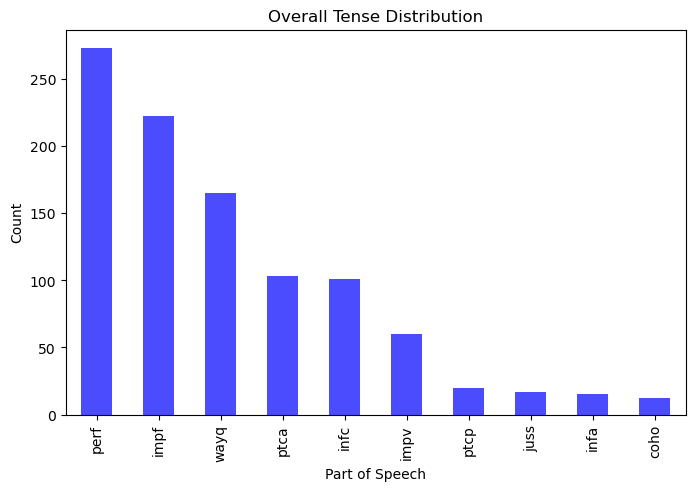

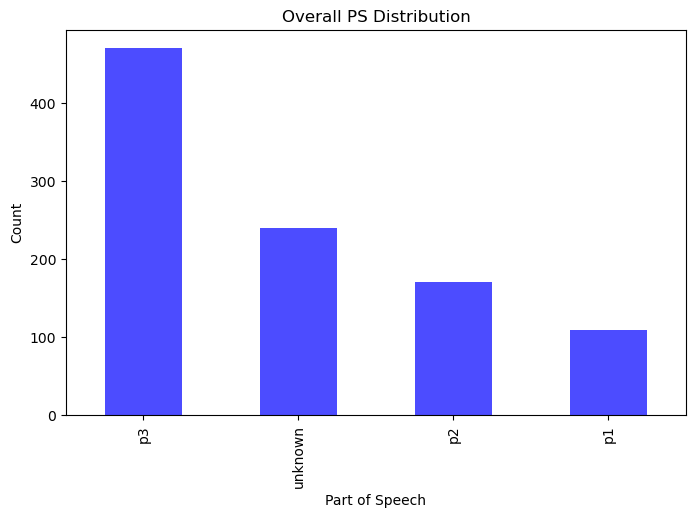

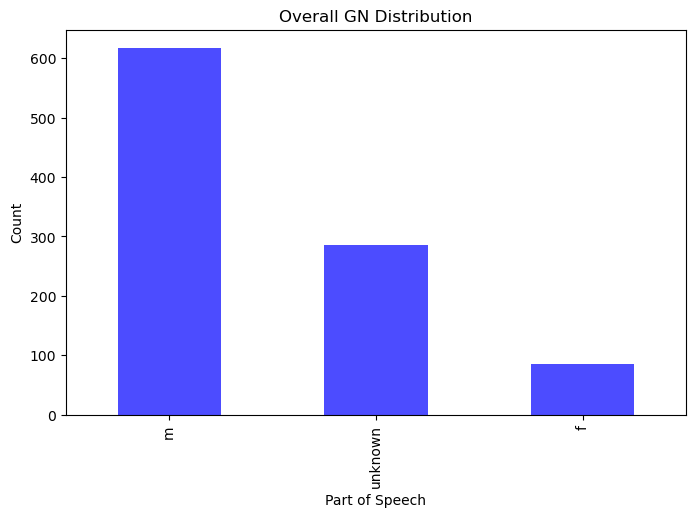

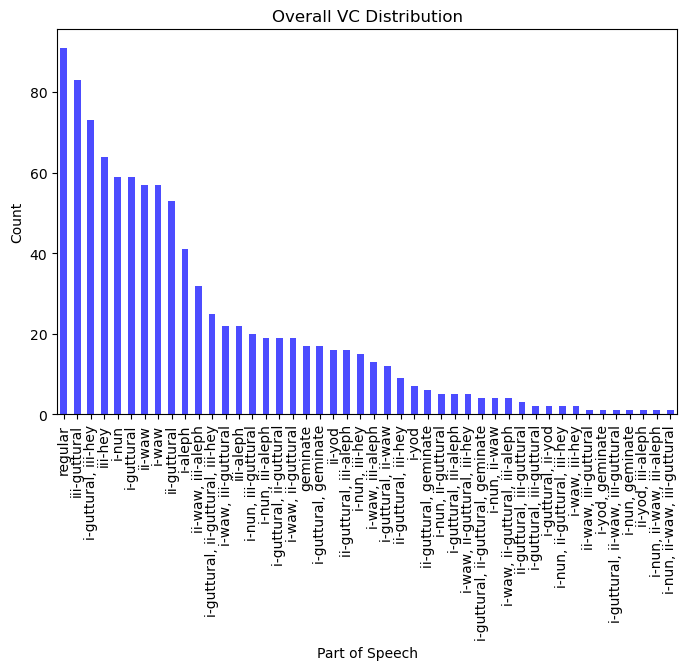

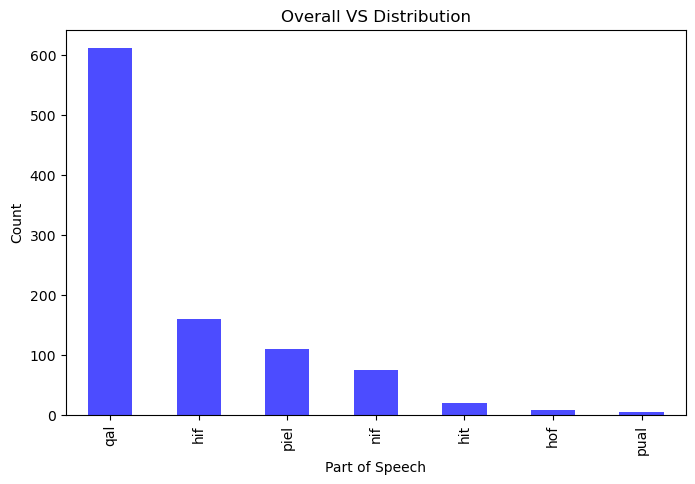

In [175]:
tense_counts= BHSallVerbalMorphologyOTST551_sampled['bol_vt1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
tense_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

ps_counts= BHSallVerbalMorphologyOTST551_sampled['ps1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
ps_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall PS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

gn_counts= BHSallVerbalMorphologyOTST551_sampled['gn1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
gn_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall GN Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vc_counts= BHSallVerbalMorphologyOTST551_sampled['bol_dict_vc1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vc_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VC Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vs_counts= BHSallVerbalMorphologyOTST551_sampled['vs1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vs_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

##### OTST552 sampling: Using `sample`

In [176]:
BHSallVerbalMorphologyOTST552_sampled=BHSallVerbalMorphologyOTST551_552_625[
                                                                              (BHSallVerbalMorphology['bol_lexeme_occurrences1'] > 99)
                                                                          ]
BHSallVerbalMorphologyOTST552_sampled.info()

/var/folders/03/qlrw_2h92mgd4n9sls7f84lc0000gn/T/ipykernel_43836/166546048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BHSallVerbalMorphologyOTST552_sampled=BHSallVerbalMorphologyOTST551_552_625[


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51797 entries, 1 to 71297
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         51797 non-null  int64 
 1   R                                  51797 non-null  int64 
 2   S1                                 51797 non-null  object
 3   S2                                 51797 non-null  int64 
 4   S3                                 51797 non-null  int64 
 5   NODE1                              51797 non-null  int64 
 6   TYPE1                              51797 non-null  object
 7   TEXT1                              51797 non-null  object
 8   bol_bhsa_word_order1               51797 non-null  int64 
 9   bol_dict_EN1                       51797 non-null  object
 10  bol_dict_HebArm1                   51797 non-null  object
 11  bol_dict_abc1                      51797 non-null  int64 
 12  bol_

In [177]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHSallVerbalMorphologyOTST552_sampled=BHSallVerbalMorphologyOTST552_sampled \
                                    .groupby(['ps1',
                                              'gn1',
                                              'nu1',
                                              'vs1',
                                              'bol_vt1',
                                              'bol_dict_vc1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .sample(n=2, random_state=1, replace=True)\
                                    .sort_values(['bol_monad_num1',
                                                  'bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1'], 
                                                 ascending=True)
BHSallVerbalMorphologyOTST552_sampled.head(10)

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
25,25,26,Genesis,1,9,154,word,תֵרָאֶ֖ה,154,qal: see; get to know; look at; choose; ni: be...,ראה,7095,"i-guttural, ii-guttural, iii-hey",1298,154,0,impf,NaN,1298,36,T;R@>EH,f,Hebrew,R>H[,absent,sg,154,verb,T=,absent,unknown,unknown,unknown,p3,1075,verb,NaN,absent,NaN,N,nif,impf,False,False,False,False,False,False
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
143,143,144,Genesis,2,15,961,word,שָׁמְרָֽהּ׃,961,"qal: keep watch, guard; ni: be guarded; beware...",שׁמר,7869,iii-guttural,468,961,0,infc,NaN,468,10,C@M:R@H.,unknown,Hebrew,CMR[,NaN,unknown,961,verb,NaN,H,f,sg,p3,unknown,3149,verb,a,absent,NaN,absent,qal,infc,False,False,False,False,False,False
151,151,152,Genesis,2,17,995,word,תָּמֽוּת׃,995,"qal: die; pi: kill; hi: kill, put to death; ho...",מות,4054,ii-waw,835,995,0,impf,DL_DF,835,34,T.@MW.T,m,Hebrew,MWT[,absent,sg,995,verb,T,absent,unknown,unknown,unknown,p2,1123,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


In [178]:
BHSallVerbalMorphologyOTST552_sampled.drop_duplicates(subset="bol_monad_num1", keep='first', inplace=True)
BHSallVerbalMorphologyOTST552_sampled.head(5)

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
25,25,26,Genesis,1,9,154,word,תֵרָאֶ֖ה,154,qal: see; get to know; look at; choose; ni: be...,ראה,7095,"i-guttural, ii-guttural, iii-hey",1298,154,0,impf,NaN,1298,36,T;R@>EH,f,Hebrew,R>H[,absent,sg,154,verb,T=,absent,unknown,unknown,unknown,p3,1075,verb,NaN,absent,NaN,N,nif,impf,False,False,False,False,False,False
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False


##### Inspecting the OTST552 raw sampled data

In [179]:
BHSallVerbalMorphologyOTST552_sampled.head()

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
25,25,26,Genesis,1,9,154,word,תֵרָאֶ֖ה,154,qal: see; get to know; look at; choose; ni: be...,ראה,7095,"i-guttural, ii-guttural, iii-hey",1298,154,0,impf,NaN,1298,36,T;R@>EH,f,Hebrew,R>H[,absent,sg,154,verb,T=,absent,unknown,unknown,unknown,p3,1075,verb,NaN,absent,NaN,N,nif,impf,False,False,False,False,False,False
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False


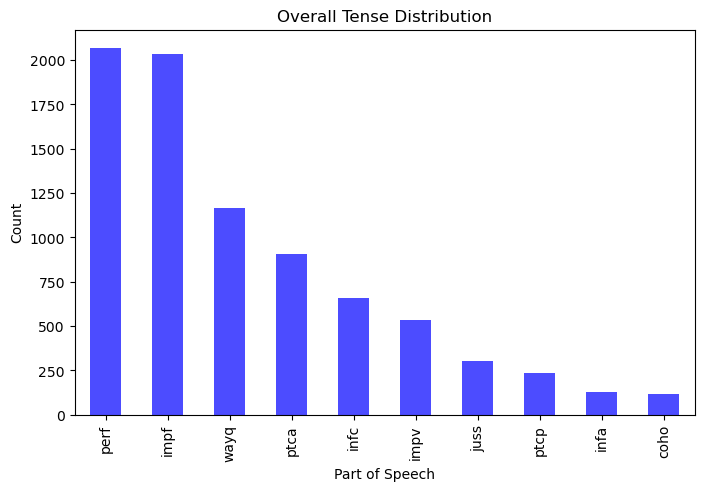

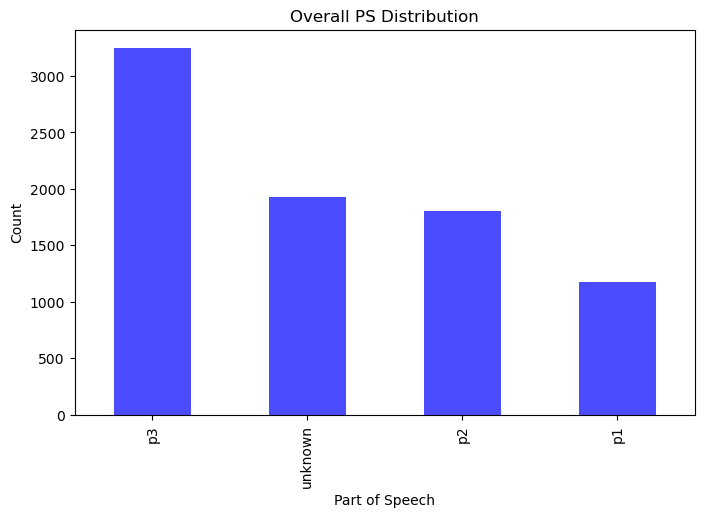

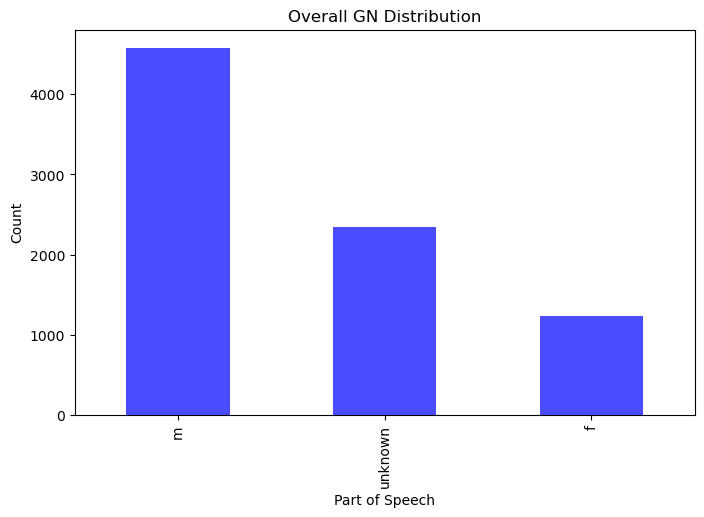

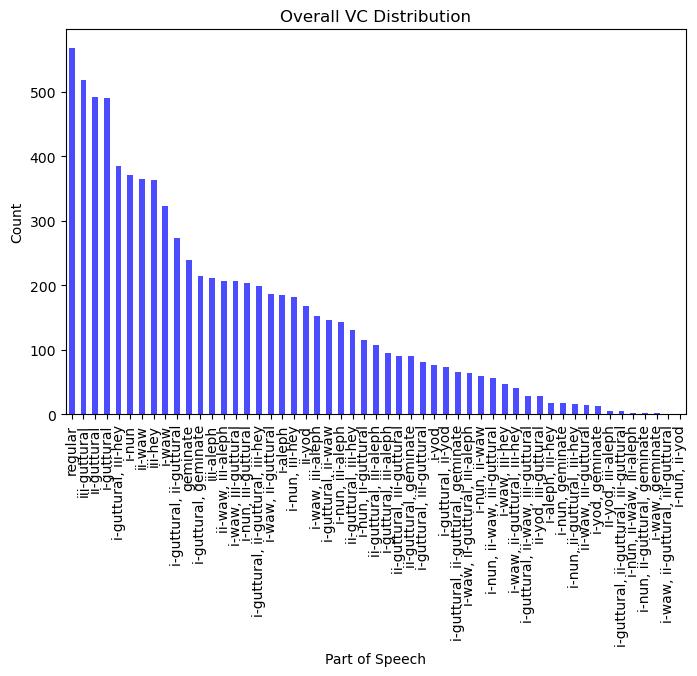

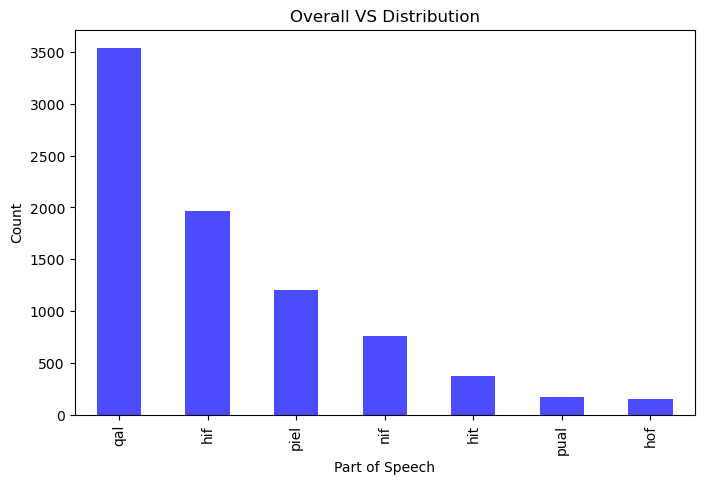

In [180]:
tense_counts= BHSallVerbalMorphologyOTST552_sampled['bol_vt1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
tense_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

ps_counts= BHSallVerbalMorphologyOTST552_sampled['ps1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
ps_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall PS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

gn_counts= BHSallVerbalMorphologyOTST552_sampled['gn1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
gn_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall GN Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vc_counts= BHSallVerbalMorphologyOTST552_sampled['bol_dict_vc1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vc_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VC Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vs_counts= BHSallVerbalMorphologyOTST552_sampled['vs1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vs_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

##### OTST625 sampling: Using `sample`

In [181]:
BHSallVerbalMorphologyOTST625_sampled=BHSallVerbalMorphologyOTST551_552_625[
                                                                              (BHSallVerbalMorphology['bol_lexeme_occurrences1'] >= 70)
                                                                          ]
BHSallVerbalMorphologyOTST625_sampled.info()

/var/folders/03/qlrw_2h92mgd4n9sls7f84lc0000gn/T/ipykernel_43836/1253110721.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BHSallVerbalMorphologyOTST625_sampled=BHSallVerbalMorphologyOTST551_552_625[


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55259 entries, 1 to 71297
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         55259 non-null  int64 
 1   R                                  55259 non-null  int64 
 2   S1                                 55259 non-null  object
 3   S2                                 55259 non-null  int64 
 4   S3                                 55259 non-null  int64 
 5   NODE1                              55259 non-null  int64 
 6   TYPE1                              55259 non-null  object
 7   TEXT1                              55259 non-null  object
 8   bol_bhsa_word_order1               55259 non-null  int64 
 9   bol_dict_EN1                       55259 non-null  object
 10  bol_dict_HebArm1                   55259 non-null  object
 11  bol_dict_abc1                      55259 non-null  int64 
 12  bol_

In [182]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHSallVerbalMorphologyOTST625_sampled=BHSallVerbalMorphologyOTST625_sampled \
                                    .groupby(['ps1',
                                              'gn1',
                                              'nu1',
                                              'vs1',
                                              'bol_vt1',
                                              'bol_dict_vc1',
                                              'prs_ps1',
                                              'prs_nu1',
                                              'prs_gn1']) \
                                    .sample(n=2, random_state=1, replace=True)\
                                    .sort_values(['bol_monad_num1',
                                                  'bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1'], 
                                                 ascending=True)
BHSallVerbalMorphologyOTST625_sampled.head(10)

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
143,143,144,Genesis,2,15,961,word,שָׁמְרָֽהּ׃,961,"qal: keep watch, guard; ni: be guarded; beware...",שׁמר,7869,iii-guttural,468,961,0,infc,NaN,468,10,C@M:R@H.,unknown,Hebrew,CMR[,NaN,unknown,961,verb,NaN,H,f,sg,p3,unknown,3149,verb,a,absent,NaN,absent,qal,infc,False,False,False,False,False,False
147,147,148,Genesis,2,16,977,word,תֹּאכֵֽל׃,977,"qal: eat, devour; qal pass: eat; ni: be eaten;...",אכל,383,i-aleph,810,977,0,impf,DL,810,89,T.O>K;L,m,Hebrew,>KL[,absent,sg,977,verb,T,absent,unknown,unknown,unknown,p2,466,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False
150,150,151,Genesis,2,17,994,word,מֹ֥ות,994,"qal: die; pi: kill; hi: kill, put to death; ho...",מות,4054,ii-waw,835,994,0,infa,NaN,835,199,MOWT,unknown,Hebrew,MWT[,NaN,unknown,994,advb,NaN,absent,unknown,unknown,unknown,unknown,217,verb,a,absent,NaN,absent,qal,infa,False,False,False,False,False,False


In [183]:
BHSallVerbalMorphologyOTST625_sampled.drop_duplicates(subset="bol_monad_num1", keep='first', inplace=True)
BHSallVerbalMorphologyOTST625_sampled.head(20)

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
143,143,144,Genesis,2,15,961,word,שָׁמְרָֽהּ׃,961,"qal: keep watch, guard; ni: be guarded; beware...",שׁמר,7869,iii-guttural,468,961,0,infc,NaN,468,10,C@M:R@H.,unknown,Hebrew,CMR[,NaN,unknown,961,verb,NaN,H,f,sg,p3,unknown,3149,verb,a,absent,NaN,absent,qal,infc,False,False,False,False,False,False
147,147,148,Genesis,2,16,977,word,תֹּאכֵֽל׃,977,"qal: eat, devour; qal pass: eat; ni: be eaten;...",אכל,383,i-aleph,810,977,0,impf,DL,810,89,T.O>K;L,m,Hebrew,>KL[,absent,sg,977,verb,T,absent,unknown,unknown,unknown,p2,466,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False
150,150,151,Genesis,2,17,994,word,מֹ֥ות,994,"qal: die; pi: kill; hi: kill, put to death; ho...",מות,4054,ii-waw,835,994,0,infa,NaN,835,199,MOWT,unknown,Hebrew,MWT[,NaN,unknown,994,advb,NaN,absent,unknown,unknown,unknown,unknown,217,verb,a,absent,NaN,absent,qal,infa,False,False,False,False,False,False
168,168,169,Genesis,2,22,1112,word,יְבִאֶ֖הָ,1112,"qal: come, enter, go in; hi: bring; let come; ...",בוא,889,"ii-waw, iii-aleph",2570,1112,0,wayq,NaN,2570,2,J:BI>EH@,m,Hebrew,BW>[,absent,sg,1112,verb,J,H,f,sg,p3,p3,9178,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
171,171,172,Genesis,2,23,1137,word,לֻֽקֳחָה־,1137,"qal: take, grasp, seize; qal pass: take, grasp...",לקח,3831,"i-nun, iii-guttural",965,1137,0,perf,NaN,965,11,LUQ:@X@H,f,Hebrew,LQX[,absent,sg,1137,verb,absent,absent,unknown,unknown,unknown,p3,2952,verb,NaN,absent,H,absent,pual,perf,False,False,False,False,False,False
183,183,184,Genesis,3,2,1210,word,נֹאכֵֽל׃,1210,"qal: eat, devour; qal pass: eat; ni: be eaten;...",אכל,383,i-aleph,810,1210,0,impf,NaN,810,6,NO>K;L,unknown,Hebrew,>KL[,absent,pl,1210,verb,N,absent,unknown,unknown,unknown,p1,4554,verb,NaN,absent,NaN,absent,qal,impf,False,False,False,False,False,False


##### Inspecting the OTST625 raw sampled data

In [184]:
BHSallVerbalMorphologyOTST625_sampled.head()

,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
36,36,37,Genesis,1,12,205,word,תֹּוצֵ֨א,205,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,205,0,wayq,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,205,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
76,76,77,Genesis,1,24,449,word,תֹּוצֵ֨א,449,"qal: go out, go forth; hi: bring; ho: be broug...",יצא,3207,"i-waw, iii-aleph",1068,449,0,impf,DL,1068,3,T.OWY;>,f,Hebrew,JY>[,absent,sg,449,verb,T=,absent,unknown,unknown,unknown,p3,7211,verb,NaN,absent,NaN,H,hif,impf,False,False,False,False,False,False
107,107,108,Genesis,2,1,675,word,יְכֻלּ֛וּ,675,"qal: come to an end, be completed, long for; p...",כלה,3494,iii-hey,206,675,0,wayq,NaN,206,51,J:KUL.W.,m,Hebrew,KLH[,absent,pl,675,verb,J,absent,unknown,unknown,unknown,p3,781,verb,NaN,absent,W,absent,pual,wayq,False,False,False,False,False,False
141,141,142,Genesis,2,15,953,word,יַּנִּחֵ֣הוּ,953,"qal: rest, settle down, make quiet; hi: lay, d...",נוח I,4989,"i-nun, ii-waw, iii-guttural",141,953,0,wayq,DF_DF,141,3,J.AN.IX;HW.,m,Hebrew,NWX[,absent,sg,953,verb,J,HW,m,sg,p3,p3,7211,verb,NaN,absent,NaN,H,hif,wayq,False,False,False,False,False,False
143,143,144,Genesis,2,15,961,word,שָׁמְרָֽהּ׃,961,"qal: keep watch, guard; ni: be guarded; beware...",שׁמר,7869,iii-guttural,468,961,0,infc,NaN,468,10,C@M:R@H.,unknown,Hebrew,CMR[,NaN,unknown,961,verb,NaN,H,f,sg,p3,unknown,3149,verb,a,absent,NaN,absent,qal,infc,False,False,False,False,False,False


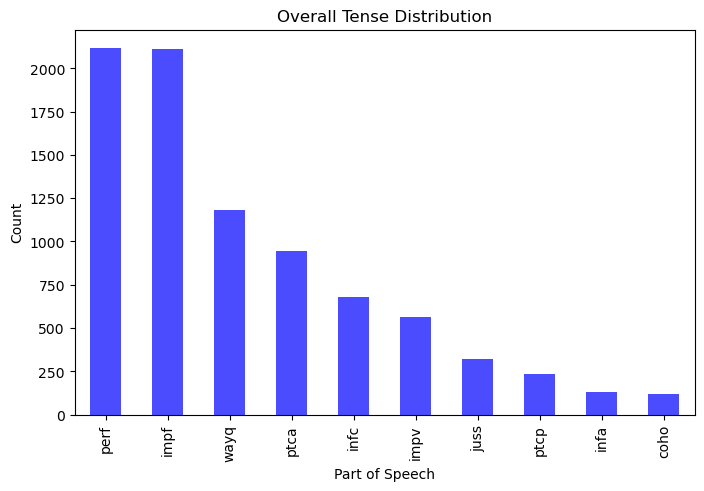

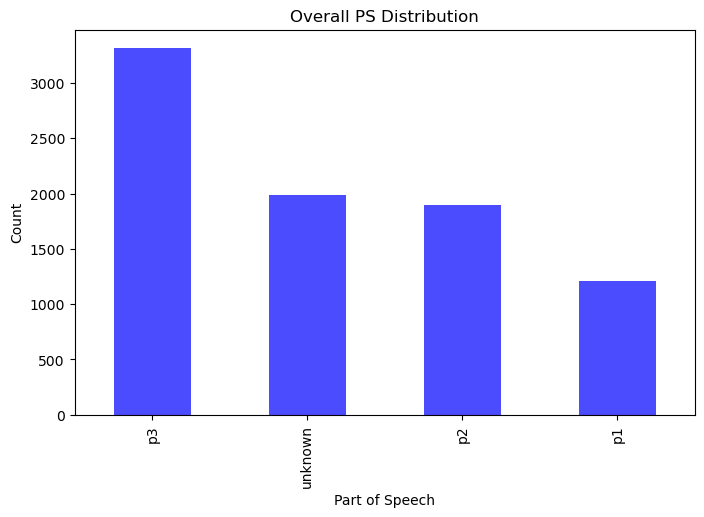

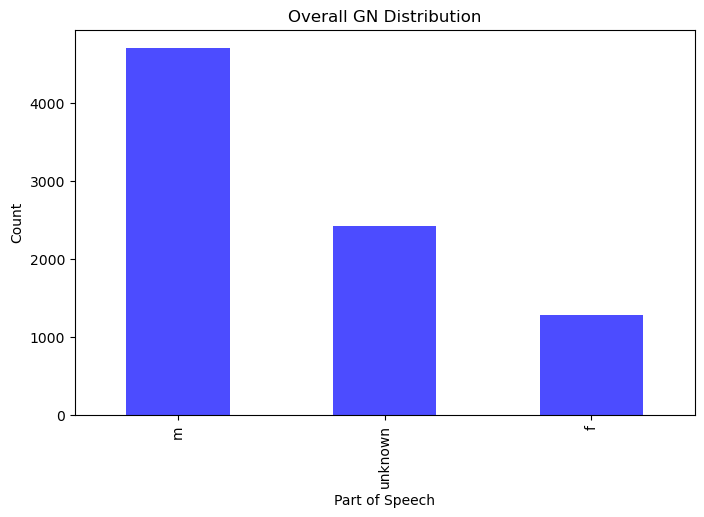

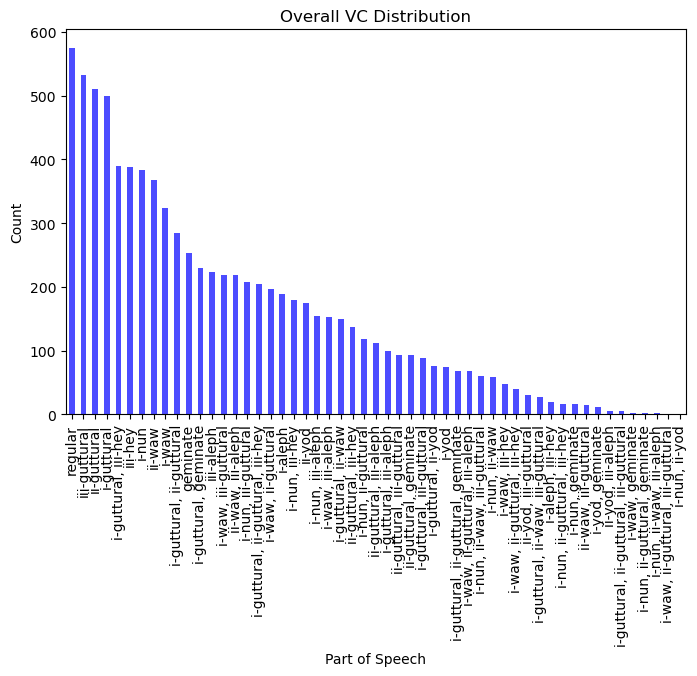

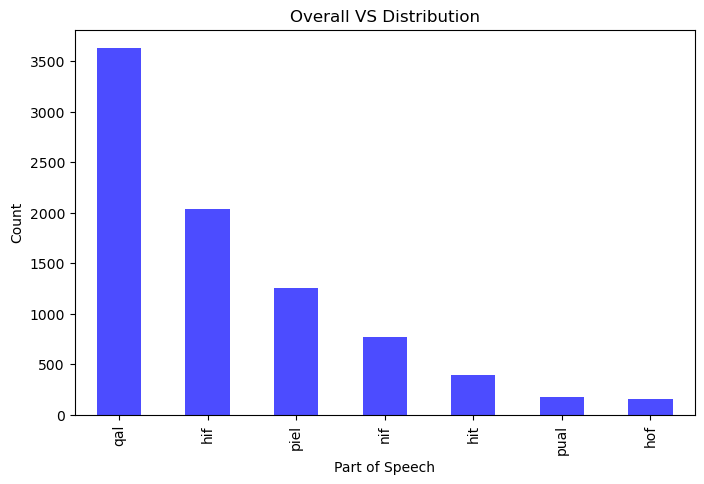

In [185]:
tense_counts= BHSallVerbalMorphologyOTST625_sampled['bol_vt1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
tense_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

ps_counts= BHSallVerbalMorphologyOTST625_sampled['ps1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
ps_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall PS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

gn_counts= BHSallVerbalMorphologyOTST625_sampled['gn1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
gn_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall GN Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vc_counts= BHSallVerbalMorphologyOTST625_sampled['bol_dict_vc1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vc_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VC Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

vs_counts= BHSallVerbalMorphologyOTST625_sampled['vs1'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
vs_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall VS Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()

#### Exporting the Sampled Data

In [186]:
BHSallVerbalMorphologyOTST551_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_morphology_verbs_OTST_551_Qualifier-Selection_unfiltered_v0.3.xlsx')

In [187]:
BHSallVerbalMorphologyOTST552_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_morphology_verbs_OTST_552_Qualifier-Selection_unfiltered_v0.3.xlsx')

In [188]:
BHSallVerbalMorphologyOTST625_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_morphology_verbs_OTST_625_Qualifier-Selection_unfiltered_v0.3.xlsx')

### Reges_I 21:1-17

In [120]:
Reges21Morphology=BHSallVerbalMorphology[
                                         (BHSallVerbalMorphology['S1']=='1_Kings') 
                                       & (BHSallVerbalMorphology['S2']==21) 
                                       & (BHSallVerbalMorphology['S3']<18) 
                                       ]
Reges21Morphology.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_bhsa_word_order1,bol_dict_EN1,bol_dict_HebArm1,bol_dict_abc1,bol_dict_vc1,bol_lexeme_occurrences1,bol_monad_num1,bol_qere_presence1,bol_vt1,dagesh1,freq_lex1,freq_occ1,g_word_noaccent1,gn1,language1,lex1,nme1,nu1,number1,pdp1,pfm1,prs1,prs_gn1,prs_nu1,prs_ps1,ps1,rank_occ1,sp1,st1,uvf1,vbe1,vbs1,vs1,vt1,paragogicNun,emphaticImpv,Transposition,WayCohortEnding,PielPualHit_wo_DF_compLengthening,PielPualHit_w_DoubleDoubling
31620,31621,1_Kings,21,1,192988,word,יְהִ֗י,192988,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,192987,0,wayq,NaN,3561,866,J:HIJ,m,Hebrew,HJH[,absent,sg,16911,verb,J,absent,unknown,unknown,unknown,p3,38,verb,NaN,absent,NaN,absent,qal,wayq,False,False,False,False,False,False
31621,31622,1_Kings,21,1,192995,word,הָיָ֛ה,192995,"qal: be, happen, become, occur; ni: be realize...",היה,1864,"i-guttural, iii-hey",3561,192994,0,perf,NaN,3561,761,H@J@H,m,Hebrew,HJH[,absent,sg,16918,verb,absent,absent,unknown,unknown,unknown,p3,45,verb,NaN,absent,NaN,absent,qal,perf,False,False,False,False,False,False
31622,31623,1_Kings,21,2,193009,word,יְדַבֵּ֣ר,193009,qal: speak; ni: speak; pi: speak; pu: be spoke...,דבר I,1616,iii-guttural,1138,193008,0,wayq,NaN,1138,240,J:DAB.;R,m,Hebrew,DBR[,absent,sg,16932,verb,J,absent,unknown,unknown,unknown,p3,179,verb,NaN,absent,NaN,absent,piel,wayq,False,False,False,False,False,False
31623,31624,1_Kings,21,2,193014,word,אמֹר֩׀,193014,"qal: say, think; ni: be said, be called; hi: d...",אמר I,545,i-aleph,5307,193013,0,infc,NaN,5307,1911,>MOR,unknown,Hebrew,>MR[,NaN,unknown,16937,verb,NaN,absent,unknown,unknown,unknown,unknown,20,verb,a,absent,NaN,absent,qal,infc,False,False,False,False,False,False
31624,31625,1_Kings,21,2,193015,word,תְּנָה־,193015,"qal: give, place; ni: be given, put; ho: be gi...",נתן,5268,i-nun,2010,193014,0,impv,DL,2010,24,T.:N@H,m,Hebrew,NTN[,absent,sg,16938,verb,NaN,absent,unknown,unknown,unknown,p2,1565,verb,NaN,absent,H=,absent,qal,impv,False,True,False,False,False,False


In [ ]:
Reges21Morphology.describe()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Reges21Morphology=Reges21Morphology \
                                    .groupby(['S3']) \
                                    .sample(n=1, replace=True)\
                                    .sort_values(['bol_monad_num1',
                                                  'bol_dict_vc1',
                                                  'vs1',
                                                  'bol_vt1',
                                                  'ps1',
                                                  'nu1',
                                                  'gn1',
                                                  'prs_ps1',
                                                  'prs_nu1',
                                                  'prs_gn1'], 
                                                 ascending=True)
Reges21Morphology.head(10)

In [ ]:
Reges21Morphology.describe()

In [ ]:
Reges21Morphology.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/OTST551-2_exams_og/OTST552_week12_midterm-sample_Reges21_morphology_selection.xlsx', encoding='utf-16')

## Syntax: Phrase Function Analysis

### Catching clauses for OTST551

#### Phrases from Genesis
I need to add `clause kind=WP` so that I can also catch vocatives.

In [245]:
Genesis='''
verse book=Genesis chapter=1|3|6|12|13|18|19|20|21|22|25|26|27
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/         
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
'''
Genesis  = BHSa4c.search(Genesis)
BHSa4c.table(Genesis, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  4.08s 305 results


n,p,verse,clause,phrase,word
1,Genesis 1:5,,יֹ֥ום אֶחָֽד׃ פ,יֹ֥ום אֶחָֽד׃ פ,יֹ֥ום


#### Phrases from Exodus
I need to add `clause kind=WP` so that I can also catch vocatives.

In [246]:
Exodus='''
verse book=Exodus chapter=20
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Exodus  = BHSa4c.search(Exodus)
BHSa4c.table(Exodus, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  4.25s 34 results


n,p,verse,clause,phrase,word
1,Exodus 20:2,,אָֽנֹכִ֖י֙ יְהוָ֣ה אֱלֹהֶ֑֔יךָ,אָֽנֹכִ֖י֙,אָֽנֹכִ֖י֙


#### Phrases from Numeri
I need to add `clause kind=WP` so that I can also catch vocatives.

In [247]:
Numeri='''
verse book=Numeri chapter=6 verse=22|23|24|25|26|27
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Numeri  = BHSa4c.search(Numeri)
BHSa4c.table(Numeri, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.21s 0 results


#### Phrases from Josua
I need to add `clause kind=WP` so that I can also catch vocatives.

In [248]:
Josua='''
verse book=Josua chapter=1|10
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Josua  = BHSa4c.search(Josua)
BHSa4c.table(Josua, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  5.57s 66 results


n,p,verse,clause,phrase,word
1,Joshua 1:2,,וְעַתָּה֩,וְ,וְ


#### Phrases from Judices
I need to add `clause kind=WP` so that I can also catch vocatives.

In [249]:
Judices='''
verse book=Judices chapter=19
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Judices  = BHSa4c.search(Judices)
BHSa4c.table(Judices, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  5.08s 22 results


n,p,verse,clause,phrase,word
1,Judges 19:1,,וּמֶ֖לֶךְ אֵ֣ין בְּיִשְׂרָאֵ֑ל,וּ,וּ


#### Phrases from Samuel_I
I need to add `clause kind=WP` so that I can also catch vocatives.

In [250]:
Samuel_I='''
verse book=Samuel_I chapter=1|9
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Samuel_I  = BHSa4c.search(Samuel_I)
BHSa4c.table(Samuel_I, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.83s 87 results


n,p,verse,clause,phrase,word
1,1_Samuel 1:2,,וְלֹו֙ שְׁתֵּ֣י נָשִׁ֔ים,וְ,וְ


#### Phrases from Reges_I
I need to add `clause kind=WP` so that I can also catch vocatives.

In [251]:
Reges_I='''
verse book=Reges_I chapter=21
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Reges_I  = BHSa4c.search(Reges_I)
BHSa4c.table(Reges_I, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.68s 17 results


n,p,verse,clause,phrase,word
1,1_Kings 21:2,,טֹ֣וב מִמֶּ֑נּוּ,טֹ֣וב,טֹ֣וב


#### Phrases from Reges_II
I need to add `clause kind=WP` so that I can also catch vocatives.

In [252]:
Reges_II='''
verse book=Reges_II chapter=6
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Reges_II  = BHSa4c.search(Reges_II)
BHSa4c.table(Reges_II, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.99s 50 results


n,p,verse,clause,phrase,word
1,2_Kings 6:10,,לֹ֥א אַחַ֖ת,לֹ֥א,לֹ֥א


#### Phrases from Jeremia
I need to add `clause kind=WP` so that I can also catch vocatives.

In [253]:
Jeremia='''
verse book=Jeremia chapter=37|38|39
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Jeremia  = BHSa4c.search(Jeremia)
BHSa4c.table(Jeremia, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.22s 59 results


n,p,verse,clause,phrase,word
1,Jeremiah 37:10,,אִ֤ישׁ בְּאָהֳלֹו֙,אִ֤ישׁ,אִ֤ישׁ


#### Phrases from Jona
I need to add `clause kind=WP` so that I can also catch vocatives.

In [254]:
Jona='''
verse book=Jona chapter=1
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Jona  = BHSa4c.search(Jona)
BHSa4c.table(Jona, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.41s 19 results


n,p,verse,clause,phrase,word
1,Jonah 1:5,,אִ֣ישׁ אֶל־אֱלֹהָיו֒,אִ֣ישׁ,אִ֣ישׁ


#### Phrases from Ruth
I need to add `clause kind=WP` so that I can also catch vocatives.

In [255]:
Ruth='''
verse book=Ruth chapter=1
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word bol_lexeme_occurrences<200
         /-/ 
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb|.*i.*|.*gem.*
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Ruth  = BHSa4c.search(Ruth)
BHSa4c.table(Ruth, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.19s 25 results


n,p,verse,clause,phrase,word
1,Ruth 1:1,,שְׁפֹ֣ט הַשֹּׁפְטִ֔ים,שְׁפֹ֣ט,שְׁפֹ֣ט


#### OTST551 export

In [256]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Ruth, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_phrase-function_OTST_551_Qualifier-Selection_unfiltered_v0.3.tsv')

#### Sampling

##### Sampling for OTST551

In [257]:
BHS_OTST551_phrase_selection=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_phrase-function_OTST_551_Qualifier-Selection_unfiltered_v0.3.tsv', delimiter='\t', encoding='utf-16')
BHS_OTST551_phrase_selection.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,det3,function3,rela3,typ3,NODE4,TYPE4,TEXT4,bol_lexeme_occurrences4,bol_monad_num4,bol_qere_presence4,bol_sequence_number_clause4,bol_sequence_number_clause_atom4,bol_sequence_number_phrase4,bol_sequence_number_phrase_atom4,language4
0,1,Genesis,1,5,1414358,verse,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום וְלַחֹ֖שׁ...,Genesis,1,427567,clause,יֹ֥ום אֶחָֽד׃ פ,N,NC,NaN,NmCl,651590,phrase,יֹ֥ום אֶחָֽד׃ פ,und,PreC,NaN,NP,77,word,יֹ֥ום,2304,77,0,15,15,49,49,Hebrew
1,2,Genesis,1,5,1414358,verse,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום וְלַחֹ֖שׁ...,Genesis,1,427567,clause,יֹ֥ום אֶחָֽד׃ פ,N,NC,NaN,NmCl,651590,phrase,יֹ֥ום אֶחָֽד׃ פ,und,PreC,NaN,NP,78,word,אֶחָֽד׃ פ,970,78,0,15,16,49,49,Hebrew
2,3,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427592,clause,אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו,Q,NC,Attr,NmCl,651664,phrase,אֲשֶׁ֥ר,NaN,Rela,NaN,CP,195,word,אֲשֶׁ֥ר,5500,195,0,40,42,123,130,Hebrew
3,4,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427592,clause,אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו,Q,NC,Attr,NmCl,651665,phrase,זַרְעֹו־,det,Subj,NaN,NP,196,word,זַרְעֹו־,229,196,0,40,42,124,131,Hebrew
4,5,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427592,clause,אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו,Q,NC,Attr,NmCl,651666,phrase,בֹ֖ו,det,PreC,NaN,PP,197,word,בֹ֖ו,15541,197,0,40,43,125,132,Hebrew


In [258]:
BHS_OTST551_phrase_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   R                                 684 non-null    int64 
 1   S1                                684 non-null    object
 2   S2                                684 non-null    int64 
 3   S3                                684 non-null    int64 
 4   NODE1                             684 non-null    int64 
 5   TYPE1                             684 non-null    object
 6   TEXT1                             684 non-null    object
 7   book1                             684 non-null    object
 8   chapter1                          684 non-null    int64 
 9   NODE2                             684 non-null    int64 
 10  TYPE2                             684 non-null    object
 11  TEXT2                             684 non-null    object
 12  domain2               

In [259]:
vt=BHS_OTST551_phrase_selection.function3.unique().tolist()
print(vt)

['PreC', 'Rela', 'Subj', 'Conj', 'Intj', 'Modi', 'Frnt', 'Time', 'Loca', 'Ques', 'Nega', 'Cmpl', 'Voct', 'Pred', 'NCop', 'PreS', 'Objc', 'IntS', 'ModS', 'Adju']


In [260]:
BHS_OTST551_phrase_selection=BHS_OTST551_phrase_selection[
                                                                        (
                                                                            (BHS_OTST551_phrase_selection['function3']=='Pred')
                                                                            | (BHS_OTST551_phrase_selection['function3']=='Subj')
                                                                            | (BHS_OTST551_phrase_selection['function3']=='Objc')
                                                                            | (BHS_OTST551_phrase_selection['function3']=='PreO')
                                                                            | (BHS_OTST551_phrase_selection['function3']=='Nega')
                                                                            | (BHS_OTST551_phrase_selection['function3']=='PreS')
                                                                        )
                                                                    ]
BHS_OTST551_phrase_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 3 to 681
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   R                                 178 non-null    int64 
 1   S1                                178 non-null    object
 2   S2                                178 non-null    int64 
 3   S3                                178 non-null    int64 
 4   NODE1                             178 non-null    int64 
 5   TYPE1                             178 non-null    object
 6   TEXT1                             178 non-null    object
 7   book1                             178 non-null    object
 8   chapter1                          178 non-null    int64 
 9   NODE2                             178 non-null    int64 
 10  TYPE2                             178 non-null    object
 11  TEXT2                             178 non-null    object
 12  domain2               

In [263]:
vt=BHS_OTST551_phrase_selection.function3.unique().tolist()
print(vt)

['Subj', 'Nega', 'Pred', 'PreS', 'Objc']


In [264]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHS_OTST551_phrase_selection_sampled=BHS_OTST551_phrase_selection \
                                    .groupby(['function3'
                                             ]) \
                                    .sample(n=100, random_state=1, replace=True)\
                                    .sort_values(['function3'
                                                 ], 
                                                 ascending=True)
BHS_OTST551_phrase_selection_sampled.head(10)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,det3,function3,rela3,typ3,NODE4,TYPE4,TEXT4,bol_lexeme_occurrences4,bol_monad_num4,bol_qere_presence4,bol_sequence_number_clause4,bol_sequence_number_clause_atom4,bol_sequence_number_phrase4,bol_sequence_number_phrase_atom4,language4
284,285,Genesis,27,21,1415102,verse,וַיֹּ֤אמֶר יִצְחָק֙ אֶֽל־יַעֲקֹ֔ב גְּשָׁה־נָּ֥...,Genesis,27,430309,clause,אִם־לֹֽא׃,Q,WP,NaN,Ellp,659915,phrase,לֹֽא׃,NaN,Nega,NaN,NegP,13990,word,לֹֽא׃,5167,13990,0,2760,2857,8378,8771,Hebrew
540,541,2_Kings,6,12,1423958,verse,וַיֹּ֨אמֶר֙ אַחַ֣ד מֵֽעֲבָדָ֔יו לֹ֖וא אֲדֹנִ֣י...,Reges_II,6,465612,clause,לֹ֖וא,Q,NC,NaN,NmCl,766521,phrase,לֹ֖וא,NaN,Nega,NaN,NegP,198377,word,לֹ֖וא,5167,198376,0,38002,39137,114947,121774,Hebrew
534,535,2_Kings,6,10,1423956,verse,וַיִּשְׁלַ֞ח מֶ֣לֶךְ יִשְׂרָאֵ֗ל אֶֽל־הַמָּקֹ֞...,Reges_II,6,465604,clause,וְלֹ֥א שְׁתָּֽיִם׃,N,NC,NaN,NmCl,766498,phrase,לֹ֥א,NaN,Nega,NaN,NegP,198342,word,לֹ֥א,5167,198341,0,37994,39127,114924,121750,Hebrew
110,111,Genesis,18,15,1414793,verse,וַתְּכַחֵ֨שׁ שָׂרָ֧ה׀ לֵאמֹ֛ר לֹ֥א צָחַ֖קְתִּי...,Genesis,18,429015,clause,לֹ֖א,Q,NC,NaN,NmCl,656074,phrase,לֹ֖א,NaN,Nega,NaN,NegP,8072,word,לֹ֖א,5167,8072,0,1466,1540,4537,4775,Hebrew
461,462,1_Samuel,9,4,1421665,verse,וַיַּעֲבֹ֧ר בְּהַר־אֶפְרַ֛יִם וַיַּעֲבֹ֥ר בְּא...,Samuel_I,9,454791,clause,וָאַ֔יִן,N,NC,NaN,NmCl,734182,phrase,אַ֔יִן,NaN,Nega,NaN,NegP,145581,word,אַ֔יִן,788,145580,0,27189,28089,82611,87542,Hebrew
139,140,Genesis,19,18,1414829,verse,וַיֹּ֥אמֶר לֹ֖וט אֲלֵהֶ֑ם אַל־נָ֖א אֲדֹנָֽי׃,Genesis,19,429197,clause,אַל־נָ֖א,Q,NC,NaN,NmCl,656595,phrase,אַל־,NaN,Nega,NaN,NegP,8834,word,אַל־,726,8834,0,1648,1725,5058,5306,Hebrew
124,125,Genesis,19,2,1414813,verse,וַיֹּ֜אמֶר הִנֶּ֣ה נָּא־אֲדֹנַ֗י ס֣וּרוּ נָ֠א ...,Genesis,19,429118,clause,לֹּ֔א,Q,NC,NaN,NmCl,656365,phrase,לֹּ֔א,NaN,Nega,NaN,NegP,8473,word,לֹּ֔א,5167,8473,0,1569,1644,4828,5067,Hebrew
498,499,1_Samuel,9,20,1421681,verse,וְלָאֲתֹנֹ֞ות הָאֹבְדֹ֣ות לְךָ֗ הַיֹּום֙ שְׁלֹ...,Samuel_I,9,454895,clause,הֲלֹ֣וא לְךָ֔ וּלְכֹ֖ל בֵּ֥ית אָבִֽיךָ׃ ס,Q,NC,NaN,NmCl,734476,phrase,לֹ֣וא,NaN,Nega,NaN,NegP,146007,word,לֹ֣וא,5167,146006,0,27293,28194,82905,87840,Hebrew
110,111,Genesis,18,15,1414793,verse,וַתְּכַחֵ֨שׁ שָׂרָ֧ה׀ לֵאמֹ֛ר לֹ֥א צָחַ֖קְתִּי...,Genesis,18,429015,clause,לֹ֖א,Q,NC,NaN,NmCl,656074,phrase,לֹ֖א,NaN,Nega,NaN,NegP,8072,word,לֹ֖א,5167,8072,0,1466,1540,4537,4775,Hebrew
284,285,Genesis,27,21,1415102,verse,וַיֹּ֤אמֶר יִצְחָק֙ אֶֽל־יַעֲקֹ֔ב גְּשָׁה־נָּ֥...,Genesis,27,430309,clause,אִם־לֹֽא׃,Q,WP,NaN,Ellp,659915,phrase,לֹֽא׃,NaN,Nega,NaN,NegP,13990,word,לֹֽא׃,5167,13990,0,2760,2857,8378,8771,Hebrew


In [265]:
BHS_OTST551_phrase_selection_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 284 to 492
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   R                                 500 non-null    int64 
 1   S1                                500 non-null    object
 2   S2                                500 non-null    int64 
 3   S3                                500 non-null    int64 
 4   NODE1                             500 non-null    int64 
 5   TYPE1                             500 non-null    object
 6   TEXT1                             500 non-null    object
 7   book1                             500 non-null    object
 8   chapter1                          500 non-null    int64 
 9   NODE2                             500 non-null    int64 
 10  TYPE2                             500 non-null    object
 11  TEXT2                             500 non-null    object
 12  domain2             

In [266]:
BHS_OTST551_phrase_selection_sampled.drop_duplicates(subset="bol_sequence_number_phrase4", keep='first', inplace=True)
BHS_OTST551_phrase_selection_sampled.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,det3,function3,rela3,typ3,NODE4,TYPE4,TEXT4,bol_lexeme_occurrences4,bol_monad_num4,bol_qere_presence4,bol_sequence_number_clause4,bol_sequence_number_clause_atom4,bol_sequence_number_phrase4,bol_sequence_number_phrase_atom4,language4
284,285,Genesis,27,21,1415102,verse,וַיֹּ֤אמֶר יִצְחָק֙ אֶֽל־יַעֲקֹ֔ב גְּשָׁה־נָּ֥...,Genesis,27,430309,clause,אִם־לֹֽא׃,Q,WP,NaN,Ellp,659915,phrase,לֹֽא׃,NaN,Nega,NaN,NegP,13990,word,לֹֽא׃,5167,13990,0,2760,2857,8378,8771,Hebrew
540,541,2_Kings,6,12,1423958,verse,וַיֹּ֨אמֶר֙ אַחַ֣ד מֵֽעֲבָדָ֔יו לֹ֖וא אֲדֹנִ֣י...,Reges_II,6,465612,clause,לֹ֖וא,Q,NC,NaN,NmCl,766521,phrase,לֹ֖וא,NaN,Nega,NaN,NegP,198377,word,לֹ֖וא,5167,198376,0,38002,39137,114947,121774,Hebrew
534,535,2_Kings,6,10,1423956,verse,וַיִּשְׁלַ֞ח מֶ֣לֶךְ יִשְׂרָאֵ֗ל אֶֽל־הַמָּקֹ֞...,Reges_II,6,465604,clause,וְלֹ֥א שְׁתָּֽיִם׃,N,NC,NaN,NmCl,766498,phrase,לֹ֥א,NaN,Nega,NaN,NegP,198342,word,לֹ֥א,5167,198341,0,37994,39127,114924,121750,Hebrew
110,111,Genesis,18,15,1414793,verse,וַתְּכַחֵ֨שׁ שָׂרָ֧ה׀ לֵאמֹ֛ר לֹ֥א צָחַ֖קְתִּי...,Genesis,18,429015,clause,לֹ֖א,Q,NC,NaN,NmCl,656074,phrase,לֹ֖א,NaN,Nega,NaN,NegP,8072,word,לֹ֖א,5167,8072,0,1466,1540,4537,4775,Hebrew
461,462,1_Samuel,9,4,1421665,verse,וַיַּעֲבֹ֧ר בְּהַר־אֶפְרַ֛יִם וַיַּעֲבֹ֥ר בְּא...,Samuel_I,9,454791,clause,וָאַ֔יִן,N,NC,NaN,NmCl,734182,phrase,אַ֔יִן,NaN,Nega,NaN,NegP,145581,word,אַ֔יִן,788,145580,0,27189,28089,82611,87542,Hebrew


In [267]:
BHS_OTST551_phrase_selection_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 284 to 628
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   R                                 92 non-null     int64 
 1   S1                                92 non-null     object
 2   S2                                92 non-null     int64 
 3   S3                                92 non-null     int64 
 4   NODE1                             92 non-null     int64 
 5   TYPE1                             92 non-null     object
 6   TEXT1                             92 non-null     object
 7   book1                             92 non-null     object
 8   chapter1                          92 non-null     int64 
 9   NODE2                             92 non-null     int64 
 10  TYPE2                             92 non-null     object
 11  TEXT2                             92 non-null     object
 12  domain2              

##### Inspecting the OTST551 raw sampled data

In [268]:
BHS_OTST551_phrase_selection_sampled.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,det3,function3,rela3,typ3,NODE4,TYPE4,TEXT4,bol_lexeme_occurrences4,bol_monad_num4,bol_qere_presence4,bol_sequence_number_clause4,bol_sequence_number_clause_atom4,bol_sequence_number_phrase4,bol_sequence_number_phrase_atom4,language4
284,285,Genesis,27,21,1415102,verse,וַיֹּ֤אמֶר יִצְחָק֙ אֶֽל־יַעֲקֹ֔ב גְּשָׁה־נָּ֥...,Genesis,27,430309,clause,אִם־לֹֽא׃,Q,WP,NaN,Ellp,659915,phrase,לֹֽא׃,NaN,Nega,NaN,NegP,13990,word,לֹֽא׃,5167,13990,0,2760,2857,8378,8771,Hebrew
540,541,2_Kings,6,12,1423958,verse,וַיֹּ֨אמֶר֙ אַחַ֣ד מֵֽעֲבָדָ֔יו לֹ֖וא אֲדֹנִ֣י...,Reges_II,6,465612,clause,לֹ֖וא,Q,NC,NaN,NmCl,766521,phrase,לֹ֖וא,NaN,Nega,NaN,NegP,198377,word,לֹ֖וא,5167,198376,0,38002,39137,114947,121774,Hebrew
534,535,2_Kings,6,10,1423956,verse,וַיִּשְׁלַ֞ח מֶ֣לֶךְ יִשְׂרָאֵ֗ל אֶֽל־הַמָּקֹ֞...,Reges_II,6,465604,clause,וְלֹ֥א שְׁתָּֽיִם׃,N,NC,NaN,NmCl,766498,phrase,לֹ֥א,NaN,Nega,NaN,NegP,198342,word,לֹ֥א,5167,198341,0,37994,39127,114924,121750,Hebrew
110,111,Genesis,18,15,1414793,verse,וַתְּכַחֵ֨שׁ שָׂרָ֧ה׀ לֵאמֹ֛ר לֹ֥א צָחַ֖קְתִּי...,Genesis,18,429015,clause,לֹ֖א,Q,NC,NaN,NmCl,656074,phrase,לֹ֖א,NaN,Nega,NaN,NegP,8072,word,לֹ֖א,5167,8072,0,1466,1540,4537,4775,Hebrew
461,462,1_Samuel,9,4,1421665,verse,וַיַּעֲבֹ֧ר בְּהַר־אֶפְרַ֛יִם וַיַּעֲבֹ֥ר בְּא...,Samuel_I,9,454791,clause,וָאַ֔יִן,N,NC,NaN,NmCl,734182,phrase,אַ֔יִן,NaN,Nega,NaN,NegP,145581,word,אַ֔יִן,788,145580,0,27189,28089,82611,87542,Hebrew


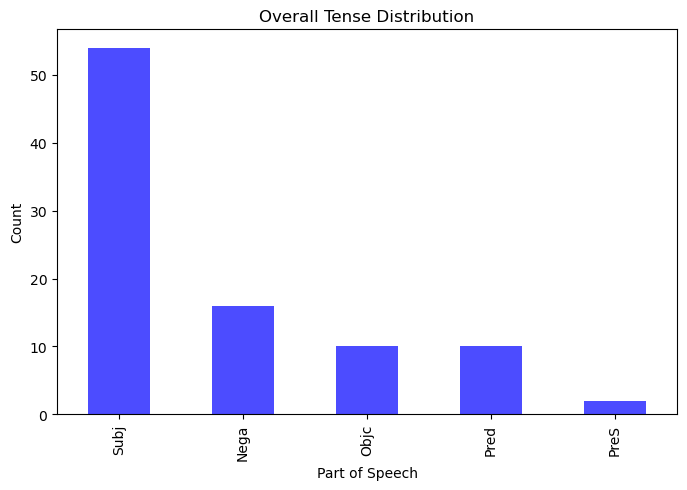

In [269]:
phrasefunctions= BHS_OTST551_phrase_selection_sampled['function3'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
phrasefunctions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


In [271]:
BHS_OTST551_phrase_selection_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_phrase-function_OTST_551_Qualifier-Selection_filtered_sampled_v0.3.xlsx', encoding='utf-16')

### Catching clauses for OTST552 and OTST625

#### Phrases from Genesis
I need to add `clause kind=WP` so that I can also catch vocatives.

In [137]:
Genesis='''
verse book=Genesis chapter=1|3|6|12|13|18|19|20|21|22|25|26|27
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*
'''
Genesis  = BHSa4c.search(Genesis)
BHSa4c.table(Genesis, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.15s 7307 results


n,p,verse,clause,phrase,word
1,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בְּרֵאשִׁ֖ית,בְּ


#### Phrases from Exodus
I need to add `clause kind=WP` so that I can also catch vocatives.

In [138]:
Exodus='''
verse book=Exodus chapter=20
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Exodus  = BHSa4c.search(Exodus)
BHSa4c.table(Exodus, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.13s 420 results


n,p,verse,clause,phrase,word
1,Exodus 20:1,,וַיְדַבֵּ֣ר אֱלֹהִ֔ים אֵ֛ת כָּל־הַדְּבָרִ֥ים הָאֵ֖לֶּה,וַ,וַ


#### Phrases from Numeri
I need to add `clause kind=WP` so that I can also catch vocatives.

In [139]:
Numeri='''
verse book=Numeri chapter=6 verse=22|23|24|25|26|27
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Numeri  = BHSa4c.search(Numeri)
BHSa4c.table(Numeri, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.04s 50 results


n,p,verse,clause,phrase,word
1,Numbers 6:22,,וַיְדַבֵּ֥ר יְהוָ֖ה אֶל־מֹשֶׁ֥ה,וַ,וַ


#### Phrases from Josua
I need to add `clause kind=WP` so that I can also catch vocatives.

In [140]:
Josua='''
verse book=Josua chapter=1|10
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Josua  = BHSa4c.search(Josua)
BHSa4c.table(Josua, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.97s 1509 results


n,p,verse,clause,phrase,word
1,Joshua 1:1,,וַיְהִ֗י אַחֲרֵ֛י מֹ֥ות מֹשֶׁ֖ה עֶ֣בֶד יְהוָ֑ה,וַ,וַ


#### Phrases from Judices
I need to add `clause kind=WP` so that I can also catch vocatives.

In [141]:
Judices='''
verse book=Judices chapter=19
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Judices  = BHSa4c.search(Judices)
BHSa4c.table(Judices, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.20s 792 results


n,p,verse,clause,phrase,word
1,Judges 19:1,,וַיְהִי֙ בַּיָּמִ֣ים הָהֵ֔ם,וַ,וַ


#### Phrases from Samuel_I
I need to add `clause kind=WP` so that I can also catch vocatives.

In [142]:
Samuel_I='''
verse book=Samuel_I chapter=1|9
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Samuel_I  = BHSa4c.search(Samuel_I)
BHSa4c.table(Samuel_I, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.25s 1290 results


n,p,verse,clause,phrase,word
1,1_Samuel 1:1,,וַיְהִי֩ אִ֨ישׁ אֶחָ֜ד מִן־הָרָמָתַ֛יִם צֹופִ֖ים מֵהַ֣ר אֶפְרָ֑יִם,וַ,וַ


#### Phrases from Reges_I
I need to add `clause kind=WP` so that I can also catch vocatives.

In [143]:
Reges_I='''
verse book=Reges_I chapter=21
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Reges_I  = BHSa4c.search(Reges_I)
BHSa4c.table(Reges_I, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.13s 645 results


n,p,verse,clause,phrase,word
1,1_Kings 21:1,,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה,וַ,וַ


#### Phrases from Reges_II
I need to add `clause kind=WP` so that I can also catch vocatives.

In [144]:
Reges_II='''
verse book=Reges_II chapter=6
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Reges_II  = BHSa4c.search(Reges_II)
BHSa4c.table(Reges_II, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.01s 748 results


n,p,verse,clause,phrase,word
1,2_Kings 6:1,,וַיֹּאמְר֥וּ בְנֵֽי־הַנְּבִיאִ֖ים אֶל־אֱלִישָׁ֑ע,וַ,וַ


#### Phrases from Jeremia
I need to add `clause kind=WP` so that I can also catch vocatives.

In [145]:
Jeremia='''
verse book=Jeremia chapter=37|38|39
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Jeremia  = BHSa4c.search(Jeremia)
BHSa4c.table(Jeremia, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.38s 1639 results


n,p,verse,clause,phrase,word
1,Jeremiah 37:1,,וַיִּ֨מְלָךְ־מֶ֔לֶךְ צִדְקִיָּ֖הוּ בֶּן־יֹֽאשִׁיָּ֑הוּ תַּ֗חַת כָּנְיָ֨הוּ֙ בֶּן־יְהֹ֣ויָקִ֔ים,וַ,וַ


#### Phrases from Jona
I need to add `clause kind=WP` so that I can also catch vocatives.

In [146]:
Jona='''
verse book=Jona chapter=1
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Jona  = BHSa4c.search(Jona)
BHSa4c.table(Jona, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.08s 372 results


n,p,verse,clause,phrase,word
1,Jonah 1:1,,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־יֹונָ֥ה בֶן־אֲמִתַּ֖י,וַֽ,וַֽ


#### Phrases from Psalmi
I need to add `clause kind=WP` so that I can also catch vocatives.

In [147]:
Psalmi='''
verse book=Psalmi chapter=1|3
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Psalmi  = BHSa4c.search(Psalmi)
BHSa4c.table(Psalmi, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.86s 173 results


n,p,verse,clause,phrase,word
1,Psalms 1:1,,אַ֥שְֽׁרֵי־הָאִ֗ישׁ,אַ֥שְֽׁרֵי־הָאִ֗ישׁ,אַ֥שְֽׁרֵי־


#### Phrases from Ruth
I need to add `clause kind=WP` so that I can also catch vocatives.

In [148]:
Ruth='''
verse book=Ruth chapter=1|2|3
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Ruth  = BHSa4c.search(Ruth)
BHSa4c.table(Ruth, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.83s 1285 results


n,p,verse,clause,phrase,word
1,Ruth 1:1,,וַיְהִ֗י בִּימֵי֙,וַ,וַ


#### Phrases from Isiah
I need to add `clause kind=WP` so that I can also catch vocatives.

In [149]:
Isiah='''
verse book=Jesaia chapter=5 verse=1|2|3|4|5|6|7
         clause typ* kind=NC|VC|WP rela* domain*
         /without/
              word g_word_noaccent~^\*
         /-/
         /without/
              word language=Aramaic
         /-/
         /without/
              word bol_dict_vc~^four.*verb
         /-/
           phrase function* typ* rela* det*
              word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_qere_presence* language* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Isiah  = BHSa4c.search(Isiah)
BHSa4c.table(Isiah, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  3.14s 140 results


n,p,verse,clause,phrase,word
1,Isaiah 5:1,,אָשִׁ֤ירָה נָּא֙ לִֽידִידִ֔י שִׁירַ֥ת דֹּודִ֖י לְכַרְמֹ֑ו,אָשִׁ֤ירָה,אָשִׁ֤ירָה


### EXPORT

#### OTST551 export

In [150]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Ruth, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_phrase-function_OTST_551_Qualifier-Selection_unfiltered_v0.3.tsv')

#### OTST552 export

In [ ]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Psalmi+Ruth, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_phrase-function_OTST_552_Qualifier-Selection_unfiltered_v0.3.tsv')

#### OTST625 export

In [ ]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Psalmi+Ruth+Isiah, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_phrase-function_OTST_625_Qualifier-Selection_unfiltered_v0.3.tsv')

#### Export Reges_I 21:1-17

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
Reges_I_Phrases=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/OTST551-2_exams_og/OTST552_week12_midterm-sample_Reges21_phrases.xlsx')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

Reges_I_Phrases.head()

### Reges_I 21:1-17

In [ ]:
Reges_I_phrase_selection=Reges_I_Phrases[
                                                                              (Reges_I_Phrases['function3']=='Pred')
                                                                            | (Reges_I_Phrases['function3']=='Subj')
                                                                            | (Reges_I_Phrases['function3']=='Objc')
                                                                            | (Reges_I_Phrases['function3']=='PreC')
                                                                            | (Reges_I_Phrases['function3']=='Cmpl')
                                                                            | (Reges_I_Phrases['function3']=='PreO')
                                                                            | (Reges_I_Phrases['function3']=='Nega')
                                                                            | (Reges_I_Phrases['function3']=='PreS')
                                                                            | (Reges_I_Phrases['function3']=='Voct')
                                                                          ]
Reges_I_phrase_selection.info()

In [ ]:
Reges_I_phrase_selection = Reges_I_Phrases[(Reges_I_Phrases['S3']<18)]
Reges_I_phrase_selection.head()

In [ ]:
S3=Reges_I_phrase_selection.S3.unique().tolist()
print(S3)

In [ ]:
Reges_I_phrase_selection.describe()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

Reges_I_phrase_selection=Reges_I_phrase_selection \
                                    .groupby(['S3','function3']) \
                                    .sample(n=4, replace=True)\
                                    .sort_values(['bol_sequence_number_phrase4',
                                                  ], 
                                                 ascending=True)
Reges_I_phrase_selection.head(10)

In [ ]:
Reges_I_phrase_selection.describe()

In [ ]:
Reges_I_phrase_selection.drop_duplicates(subset="bol_sequence_number_phrase4", keep='first', inplace=True)
Reges_I_phrase_selection.head(20)

In [ ]:
Reges_I_phrase_selection.describe()

In [ ]:
Reges_I_phrase_selection.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/OTST551-2_exams_og/OTST552_week12_midterm-sample_Reges21_phrase_selection.xlsx', encoding='utf-16')

#### Sampling

#### Sampling for OTST552

In [ ]:
BHS_OTST552_phrase_selection=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_phrase-function_OTST_552_Qualifier-Selection_unfiltered_v0.3.tsv', delimiter='\t', encoding='utf-16')
BHS_OTST552_phrase_selection.head()

In [ ]:
BHS_OTST552_phrase_selection.info()

In [ ]:
vt=BHS_OTST552_phrase_selection.function3.unique().tolist()
print(vt)

In [ ]:
BHS_OTST552_phrase_selection_sampled=BHS_OTST552_phrase_selection[
                                                                        (
                                                                            (BHS_OTST552_phrase_selection['function3']=='Pred')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='Subj')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='Objc')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='Cmpl')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='PreO')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='Nega')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='PreS')
                                                                            | (BHS_OTST552_phrase_selection['function3']=='Voct')
                                                                        )
                                                                  #  |
                                                                  #      (
                                                                  #          (BHS_OTST552_phrase_selection['kind2']=='NC')
                                                                  #          & (BHS_OTST552_phrase_selection['function3'].astype(str).str.contains('PreC'))
                                                                  #      )
                                                                    ]
BHS_OTST552_phrase_selection_sampled.info()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHS_OTST552_phrase_selection_sampled=BHS_OTST552_phrase_selection_sampled \
                                    .groupby(['function3'
                                             ]) \
                                    .sample(n=100, random_state=1, replace=True)\
                                    .sort_values(['function3'
                                                 ], 
                                                 ascending=True)
BHS_OTST552_phrase_selection_sampled.head(10)

In [ ]:
BHS_OTST552_phrase_selection_sampled.info()

In [ ]:
BHS_OTST552_phrase_selection_sampled.drop_duplicates(subset="bol_sequence_number_phrase4", keep='first', inplace=True)
BHS_OTST552_phrase_selection_sampled.head(20)

In [ ]:
BHS_OTST552_phrase_selection_sampled.info()

##### Inspecting the OTST552 raw sampled data

In [ ]:
BHS_OTST552_phrase_selection_sampled.head()

In [ ]:
phrasefunctions= BHS_OTST552_phrase_selection_sampled['function3'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
phrasefunctions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


In [ ]:
BHS_OTST552_phrase_selection_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_phrase-function_OTST_552_Qualifier-Selection_filtered_v0.3.xlsx', encoding='utf-16')

#### Sampling for OTST625

In [ ]:
BHS_OTST625_phrase_selection=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_phrase-function_OTST_625_Qualifier-Selection_unfiltered_v0.3.tsv', delimiter='\t', encoding='utf-16')
BHS_OTST625_phrase_selection.head()

In [ ]:
BHS_OTST625_phrase_selection.info()

In [ ]:
vt=BHS_OTST625_phrase_selection.function3.unique().tolist()
print(vt)

In [ ]:
BHS_OTST625_phrase_selection_sampled=BHS_OTST625_phrase_selection[
                                                                        (
                                                                            (BHS_OTST625_phrase_selection['function3']=='Pred')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='Subj')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='Objc')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='Cmpl')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='PreO')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='Nega')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='PreS')
                                                                            | (BHS_OTST625_phrase_selection['function3']=='Voct')
                                                                        )
                                                                    |
                                                                        (
                                                                            (BHS_OTST625_phrase_selection['kind2']=='NC')
                                                                            & (BHS_OTST625_phrase_selection['function3'].astype(str).str.contains('PreC'))
                                                                        )
                                                                    ]
BHS_OTST625_phrase_selection_sampled.info()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHS_OTST625_phrase_selection_sampled=BHS_OTST625_phrase_selection_sampled \
                                    .groupby(['function3'
                                             ]) \
                                    .sample(n=100, random_state=1, replace=True)\
                                    .sort_values(['function3'
                                                 ], 
                                                 ascending=True)
BHS_OTST625_phrase_selection_sampled.head(10)

In [ ]:
BHS_OTST625_phrase_selection_sampled.info()

In [ ]:
BHS_OTST625_phrase_selection_sampled.drop_duplicates(subset="bol_sequence_number_phrase4", keep='first', inplace=True)
BHS_OTST625_phrase_selection_sampled.head(5)

In [ ]:
BHS_OTST625_phrase_selection_sampled.info()

##### Inspecting the OTST625 raw sampled data

In [ ]:
BHS_OTST552_phrase_selection_sampled.head()

In [ ]:
phrasefunctions= BHS_OTST625_phrase_selection_sampled['function3'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
phrasefunctions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


In [ ]:
BHS_OTST625_phrase_selection_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_phrase-function_OTST_625_Qualifier-Selection_filtered_v0.3.xlsx', encoding='utf-16')

## Syntax: Clause Relation Analysis

### Clauses from Genesis


In [165]:
Genesis='''
verse book=Genesis chapter=1|3|6|12|13|18|19|20|21|22|25|26|27 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Genesis  = BHSa4c.search(Genesis)
BHSa4c.table(Genesis, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.45s 6299 results


n,p,verse,clause,word
1,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בְּ


### Clauses from Exodus
I need to add `clause kind=WP` so that I can also catch vocatives.

In [166]:
Exodus='''
verse book=Exodus chapter=20 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Exodus  = BHSa4c.search(Exodus)
BHSa4c.table(Exodus, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.01s 363 results


n,p,verse,clause,word
1,Exodus 20:1,,וַיְדַבֵּ֣ר אֱלֹהִ֔ים אֵ֛ת כָּל־הַדְּבָרִ֥ים הָאֵ֖לֶּה,וַ


### Clauses from Numeri
I need to add `clause kind=WP` so that I can also catch vocatives.

In [167]:
Numeri='''
verse book=Numeri chapter=6 verse=22|23|24|25|26|27
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Numeri  = BHSa4c.search(Numeri)
BHSa4c.table(Numeri, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  1.77s 46 results


n,p,verse,clause,word
1,Numbers 6:22,,וַיְדַבֵּ֥ר יְהוָ֖ה אֶל־מֹשֶׁ֥ה,וַ


### Clauses from Josua
I need to add `clause kind=WP` so that I can also catch vocatives.

In [168]:
Josua='''
verse book=Josua chapter=1|10 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Josua  = BHSa4c.search(Josua)
BHSa4c.table(Josua, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.07s 1194 results


n,p,verse,clause,word
1,Joshua 1:1,,וַיְהִ֗י אַחֲרֵ֛י מֹ֥ות מֹשֶׁ֖ה עֶ֣בֶד יְהוָ֑ה,וַ


### Clauses from Judices
I need to add `clause kind=WP` so that I can also catch vocatives.

In [169]:
Judices='''
verse book=Judices chapter=19 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Judices  = BHSa4c.search(Judices)
BHSa4c.table(Judices, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.13s 708 results


n,p,verse,clause,word
1,Judges 19:1,,וַיְהִי֙ בַּיָּמִ֣ים הָהֵ֔ם,וַ


### Clauses from Samuel_I
I need to add `clause kind=WP` so that I can also catch vocatives.

In [170]:
Samuel_I='''
verse book=Samuel_I chapter=1 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*


'''
Samuel_I  = BHSa4c.search(Samuel_I)
BHSa4c.table(Samuel_I, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.16s 467 results


n,p,verse,clause,word
1,1_Samuel 1:1,,וַיְהִי֩ אִ֨ישׁ אֶחָ֜ד מִן־הָרָמָתַ֛יִם צֹופִ֖ים מֵהַ֣ר אֶפְרָ֑יִם,וַ


### Clauses from Reges_I
I need to add `clause kind=WP` so that I can also catch vocatives.

In [171]:
Reges_I='''
verse book=Reges_I chapter=21 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Reges_I  = BHSa4c.search(Reges_I)
BHSa4c.table(Reges_I, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.34s 512 results


n,p,verse,clause,word
1,1_Kings 21:1,,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה,וַ


### Clauses from Reges_II
I need to add `clause kind=WP` so that I can also catch vocatives.

In [172]:
Reges_II='''
verse book=Reges_II chapter=6 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*



'''
Reges_II  = BHSa4c.search(Reges_II)
BHSa4c.table(Reges_II, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.08s 659 results


n,p,verse,clause,word
1,2_Kings 6:1,,וַיֹּאמְר֥וּ בְנֵֽי־הַנְּבִיאִ֖ים אֶל־אֱלִישָׁ֑ע,וַ


### Clauses from Jeremia
I need to add `clause kind=WP` so that I can also catch vocatives.

In [173]:
Jeremia='''
verse book=Jeremia chapter=37|38|39 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Jeremia  = BHSa4c.search(Jeremia)
BHSa4c.table(Jeremia, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  1.92s 1416 results


n,p,verse,clause,word
1,Jeremiah 37:1,,וַיִּ֨מְלָךְ־מֶ֔לֶךְ צִדְקִיָּ֖הוּ בֶּן־יֹֽאשִׁיָּ֑הוּ תַּ֗חַת כָּנְיָ֨הוּ֙ בֶּן־יְהֹ֣ויָקִ֔ים,וַ


### Clauses from Jona
I need to add `clause kind=WP` so that I can also catch vocatives.

In [174]:
Jona='''
verse book=Jona chapter=1 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Jona  = BHSa4c.search(Jona)
BHSa4c.table(Jona, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.10s 326 results


n,p,verse,clause,word
1,Jonah 1:1,,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־יֹונָ֥ה בֶן־אֲמִתַּ֖י,וַֽ


### Clauses from Psalmi
I need to add `clause kind=WP` so that I can also catch vocatives.

In [175]:
Psalmi='''
verse book=Psalmi chapter=1|3 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Psalmi  = BHSa4c.search(Psalmi)
BHSa4c.table(Psalmi, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.07s 130 results


n,p,verse,clause,word
1,Psalms 1:1,,אַ֥שְֽׁרֵי־הָאִ֗ישׁ,אַ֥שְֽׁרֵי־


### Clauses from Ruth
I need to add `clause kind=WP` so that I can also catch vocatives.

In [176]:
Ruth='''
verse book=Ruth chapter=1|2|3 verse*
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Ruth  = BHSa4c.search(Ruth)
BHSa4c.table(Ruth, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.13s 1074 results


n,p,verse,clause,word
1,Ruth 1:1,,וַיְהִ֗י בִּימֵי֙,וַ


### Phrases from Isiah
I need to add `clause kind=WP` so that I can also catch vocatives.

In [177]:
Isiah='''
verse book=Jesaia chapter=5 verse=1|2|3|4|5|6|7
    c1:clause typ* kind=NC|VC rela=Attr|Objc|NA domain*
    /without/
      word g_word_noaccent~^\*
    /-/
    /without/
      word language=Aramaic
    /-/
    /without/
      word bol_dict_vc~^four.*verb
    /-/
    /without/
      :: word sp=art|subs|nmpr|advb|prep|conj|prps|prde|prin|intj|nega|inrg|adjv
    /-/
      word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num*

'''
Isiah  = BHSa4c.search(Isiah)
BHSa4c.table(Isiah, start=1, end=1, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

  2.25s 111 results


n,p,verse,clause,word
1,Isaiah 5:1,,אָשִׁ֤ירָה נָּא֙ לִֽידִידִ֔י שִׁירַ֥ת דֹּודִ֖י לְכַרְמֹ֑ו,אָשִׁ֤ירָה


### Exporting

#### OTST551 Export

In [178]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Ruth, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_clause-relation_OTST_551_Qualifier-Selection_unfiltered_v0.3.tsv')

#### OTST552 Export

In [ ]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Psalmi+Ruth, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_clause-relation_OTST_552_Qualifier-Selection_unfiltered_v0.3.tsv')

#### OTST625 Export

In [ ]:
BHSa4c.export(Genesis+Exodus+Numeri+Josua+Judices+Samuel_I+Reges_I+Reges_II+Jeremia+Jona+Psalmi+Ruth+Isiah, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='0_source_BHSa4c_BOL_syntax_clause-relation_OTST_625_Qualifier-Selection_unfiltered_v0.3.tsv')

#### Export Reges_I 21:1-17

In [ ]:
BHSa4c.export(Reges_I, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/OTST551-2_exams_og/', toFile='OTST552_week12_midterm-sample_Reges21_clause-relation.tsv')

### Sampling

#### Sampling for OTST551

In [182]:
BHS_OTST551_clause_selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_clause-relation_OTST_551_Qualifier-Selection_filtered_v0.3.xlsx')
BHS_OTST551_clause_selection.head()

,Unnamed: 0.1,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,bol_lexeme_occurrences3,bol_monad_num3,bol_sequence_number_clause3,bol_sequence_number_clause_atom3,bol_sequence_number_phrase3,bol_sequence_number_phrase_atom3,SDATSAU_qualifier_selection,manual exam selection
0,0,1,116,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,427574,clause,אֲשֶׁ֖ר מֵעַ֣ל לָרָקִ֑יעַ,N,NC,Attr,NmCl,116,word,אֲשֶׁ֖ר,5500,116,22,23,69,73,cl-rela_attr-asher,NaN
1,1,176,138,Genesis,1,8,1414361,verse,וַיִּקְרָ֧א אֱלֹהִ֛ים לָֽרָקִ֖יעַ שָׁמָ֑יִם וַ...,Genesis,1,427579,clause,יֹ֥ום שֵׁנִֽי׃ פ,N,NC,NaN,NmCl,138,word,יֹ֥ום,2304,138,27,28,85,89,cl-rela_independent-nc,NaN
2,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
3,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
4,3,143,216,Genesis,1,12,1414365,verse,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יע...,Genesis,1,427596,clause,עֹ֥שֶׂה פְּרִ֛י לְמִינֵ֑הוּ,N,VC,Attr,Ptcp,216,word,עֹ֥שֶׂה,2629,216,44,48,137,147,cl-rela_attr-participle,NaN


In [183]:
BHS_OTST551_clause_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0.1                      150 non-null    int64  
 1   Unnamed: 0                        150 non-null    int64  
 2   R                                 150 non-null    int64  
 3   S1                                150 non-null    object 
 4   S2                                150 non-null    int64  
 5   S3                                150 non-null    int64  
 6   NODE1                             150 non-null    int64  
 7   TYPE1                             150 non-null    object 
 8   TEXT1                             150 non-null    object 
 9   book1                             150 non-null    object 
 10  chapter1                          150 non-null    int64  
 11  NODE2                             150 non-null    int64  
 12  TYPE2   

In [184]:
vt=BHS_OTST551_clause_selection.SDATSAU_qualifier_selection.unique().tolist()
print(vt)

['cl-rela_attr-asher', 'cl-rela_independent-nc', 'cl-rela_attr-participle', 'cl-rela_objc', 'cl-rela_independent-vc']


In [192]:
BHS_OTST551_clause_selection_sampled=BHS_OTST552_clause_selection[
                                                                              (~BHS_OTST551_clause_selection['SDATSAU_qualifier_selection'].astype(str).str.contains('objc'))

                                                                          ]
BHS_OTST551_clause_selection_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 149
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0.1                      120 non-null    int64  
 1   Unnamed: 0                        120 non-null    int64  
 2   R                                 120 non-null    int64  
 3   S1                                120 non-null    object 
 4   S2                                120 non-null    int64  
 5   S3                                120 non-null    int64  
 6   NODE1                             120 non-null    int64  
 7   TYPE1                             120 non-null    object 
 8   TEXT1                             120 non-null    object 
 9   book1                             120 non-null    object 
 10  chapter1                          120 non-null    int64  
 11  NODE2                             120 non-null    int64  
 12  TYPE2   

In [193]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHS_OTST551_clause_selection_sampled=BHS_OTST551_clause_selection_sampled \
                                    .groupby(['SDATSAU_qualifier_selection'
                                             ]) \
                                    .sample(n=30, random_state=1, replace=True)\
                                    .sort_values(['bol_sequence_number_clause3'
                                                 ], 
                                                 ascending=True)
BHS_OTST551_clause_selection_sampled.head(10)

,Unnamed: 0.1,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,bol_lexeme_occurrences3,bol_monad_num3,bol_sequence_number_clause3,bol_sequence_number_clause_atom3,bol_sequence_number_phrase3,bol_sequence_number_phrase_atom3,SDATSAU_qualifier_selection,manual exam selection
0,0,1,116,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,427574,clause,אֲשֶׁ֖ר מֵעַ֣ל לָרָקִ֑יעַ,N,NC,Attr,NmCl,116,word,אֲשֶׁ֖ר,5500,116,22,23,69,73,cl-rela_attr-asher,NaN
1,1,176,138,Genesis,1,8,1414361,verse,וַיִּקְרָ֧א אֱלֹהִ֛ים לָֽרָקִ֖יעַ שָׁמָ֑יִם וַ...,Genesis,1,427579,clause,יֹ֥ום שֵׁנִֽי׃ פ,N,NC,NaN,NmCl,138,word,יֹ֥ום,2304,138,27,28,85,89,cl-rela_independent-nc,NaN
3,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
2,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
2,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
5,5,143,216,Genesis,1,12,1414365,verse,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יע...,Genesis,1,427596,clause,עֹ֥שֶׂה פְּרִ֛י לְמִינֵ֑הוּ,N,VC,Attr,Ptcp,216,word,עֹ֥שֶׂה,2629,216,44,48,137,147,cl-rela_attr-participle,NaN
11,14,147,534,Genesis,1,29,1414382,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם ...,Genesis,1,427665,clause,זֹרֵ֣עַ זֶ֗רַע,Q,VC,Attr,Ptcp,599,word,זֹרֵ֣עַ,56,599,116,122,342,358,cl-rela_attr-participle,NaN
12,15,148,546,Genesis,1,29,1414382,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם ...,Genesis,1,427668,clause,זֹרֵ֣עַ זָ֑רַע,Q,VC,Attr,Ptcp,616,word,זֹרֵ֣עַ,56,616,119,126,349,367,cl-rela_attr-participle,NaN
13,15,148,546,Genesis,1,29,1414382,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם ...,Genesis,1,427668,clause,זֹרֵ֣עַ זָ֑רַע,Q,VC,Attr,Ptcp,616,word,זֹרֵ֣עַ,56,616,119,126,349,367,cl-rela_attr-participle,NaN
13,15,148,546,Genesis,1,29,1414382,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם ...,Genesis,1,427668,clause,זֹרֵ֣עַ זָ֑רַע,Q,VC,Attr,Ptcp,616,word,זֹרֵ֣עַ,56,616,119,126,349,367,cl-rela_attr-participle,NaN


In [194]:
BHS_OTST551_clause_selection_sampled.drop_duplicates(subset="bol_sequence_number_clause3", keep='first', inplace=True)
BHS_OTST551_clause_selection_sampled.head(5)

,Unnamed: 0.1,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,bol_lexeme_occurrences3,bol_monad_num3,bol_sequence_number_clause3,bol_sequence_number_clause_atom3,bol_sequence_number_phrase3,bol_sequence_number_phrase_atom3,SDATSAU_qualifier_selection,manual exam selection
0,0,1,116,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,427574,clause,אֲשֶׁ֖ר מֵעַ֣ל לָרָקִ֑יעַ,N,NC,Attr,NmCl,116,word,אֲשֶׁ֖ר,5500,116,22,23,69,73,cl-rela_attr-asher,NaN
1,1,176,138,Genesis,1,8,1414361,verse,וַיִּקְרָ֧א אֱלֹהִ֛ים לָֽרָקִ֖יעַ שָׁמָ֑יִם וַ...,Genesis,1,427579,clause,יֹ֥ום שֵׁנִֽי׃ פ,N,NC,NaN,NmCl,138,word,יֹ֥ום,2304,138,27,28,85,89,cl-rela_independent-nc,NaN
3,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
5,5,143,216,Genesis,1,12,1414365,verse,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יע...,Genesis,1,427596,clause,עֹ֥שֶׂה פְּרִ֛י לְמִינֵ֑הוּ,N,VC,Attr,Ptcp,216,word,עֹ֥שֶׂה,2629,216,44,48,137,147,cl-rela_attr-participle,NaN
11,14,147,534,Genesis,1,29,1414382,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם ...,Genesis,1,427665,clause,זֹרֵ֣עַ זֶ֗רַע,Q,VC,Attr,Ptcp,599,word,זֹרֵ֣עַ,56,599,116,122,342,358,cl-rela_attr-participle,NaN


In [195]:
BHS_OTST551_clause_selection_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 149
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0.1                      61 non-null     int64  
 1   Unnamed: 0                        61 non-null     int64  
 2   R                                 61 non-null     int64  
 3   S1                                61 non-null     object 
 4   S2                                61 non-null     int64  
 5   S3                                61 non-null     int64  
 6   NODE1                             61 non-null     int64  
 7   TYPE1                             61 non-null     object 
 8   TEXT1                             61 non-null     object 
 9   book1                             61 non-null     object 
 10  chapter1                          61 non-null     int64  
 11  NODE2                             61 non-null     int64  
 12  TYPE2    

##### Inspecting the OTST551 raw sampled data

In [196]:
BHS_OTST551_clause_selection_sampled.head()

,Unnamed: 0.1,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,bol_lexeme_occurrences3,bol_monad_num3,bol_sequence_number_clause3,bol_sequence_number_clause_atom3,bol_sequence_number_phrase3,bol_sequence_number_phrase_atom3,SDATSAU_qualifier_selection,manual exam selection
0,0,1,116,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,427574,clause,אֲשֶׁ֖ר מֵעַ֣ל לָרָקִ֑יעַ,N,NC,Attr,NmCl,116,word,אֲשֶׁ֖ר,5500,116,22,23,69,73,cl-rela_attr-asher,NaN
1,1,176,138,Genesis,1,8,1414361,verse,וַיִּקְרָ֧א אֱלֹהִ֛ים לָֽרָקִ֖יעַ שָׁמָ֑יִם וַ...,Genesis,1,427579,clause,יֹ֥ום שֵׁנִֽי׃ פ,N,NC,NaN,NmCl,138,word,יֹ֥ום,2304,138,27,28,85,89,cl-rela_independent-nc,NaN
3,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
5,5,143,216,Genesis,1,12,1414365,verse,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יע...,Genesis,1,427596,clause,עֹ֥שֶׂה פְּרִ֛י לְמִינֵ֑הוּ,N,VC,Attr,Ptcp,216,word,עֹ֥שֶׂה,2629,216,44,48,137,147,cl-rela_attr-participle,NaN
11,14,147,534,Genesis,1,29,1414382,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם ...,Genesis,1,427665,clause,זֹרֵ֣עַ זֶ֗רַע,Q,VC,Attr,Ptcp,599,word,זֹרֵ֣עַ,56,599,116,122,342,358,cl-rela_attr-participle,NaN


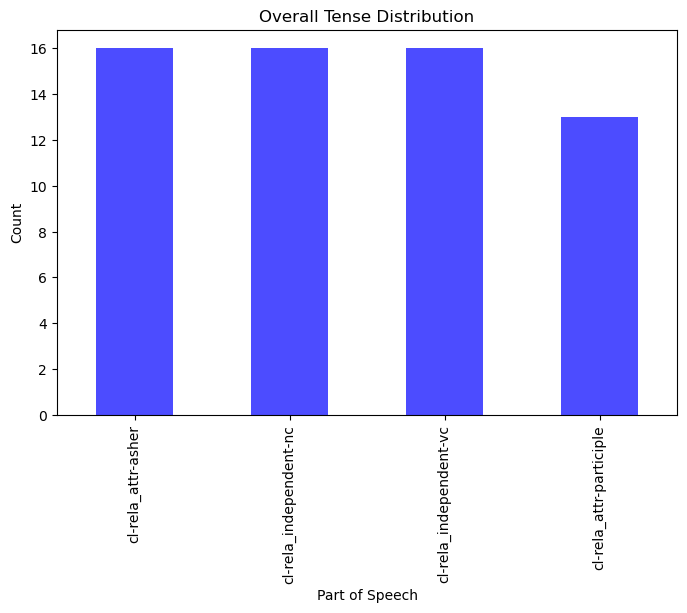

In [197]:
clauserelatypes= BHS_OTST551_clause_selection_sampled['SDATSAU_qualifier_selection'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
clauserelatypes.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


In [191]:
BHS_OTST551_clause_selection_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_clause-relation_OTST_551_Qualifier-Selection_filtered_v0.3.xlsx', encoding='utf-16')

#### Sampling for OTST552

In [179]:
BHS_OTST552_clause_selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_clause-relation_OTST_552_Qualifier-Selection_filtered_v0.3.xlsx')
BHS_OTST552_clause_selection.head()

,Unnamed: 0.1,Unnamed: 0,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,domain2,kind2,rela2,typ2,NODE3,TYPE3,TEXT3,bol_lexeme_occurrences3,bol_monad_num3,bol_sequence_number_clause3,bol_sequence_number_clause_atom3,bol_sequence_number_phrase3,bol_sequence_number_phrase_atom3,SDATSAU_qualifier_selection,manual exam selection
0,0,1,116,Genesis,1,7,1414360,verse,וַיַּ֣עַשׂ אֱלֹהִים֮ אֶת־הָרָקִיעַ֒ וַיַּבְדֵּ...,Genesis,1,427574,clause,אֲשֶׁ֖ר מֵעַ֣ל לָרָקִ֑יעַ,N,NC,Attr,NmCl,116,word,אֲשֶׁ֖ר,5500,116,22,23,69,73,cl-rela_attr-asher,NaN
1,1,176,138,Genesis,1,8,1414361,verse,וַיִּקְרָ֧א אֱלֹהִ֛ים לָֽרָקִ֖יעַ שָׁמָ֑יִם וַ...,Genesis,1,427579,clause,יֹ֥ום שֵׁנִֽי׃ פ,N,NC,NaN,NmCl,138,word,יֹ֥ום,2304,138,27,28,85,89,cl-rela_independent-nc,NaN
2,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
3,2,140,189,Genesis,1,11,1414364,verse,וַיֹּ֣אמֶר אֱלֹהִ֗ים תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ...,Genesis,1,427590,clause,מַזְרִ֣יעַ זֶ֔רַע,Q,VC,Attr,Ptcp,187,word,מַזְרִ֣יעַ,56,187,38,39,118,124,cl-rela_attr-participle,NaN
4,3,143,216,Genesis,1,12,1414365,verse,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יע...,Genesis,1,427596,clause,עֹ֥שֶׂה פְּרִ֛י לְמִינֵ֑הוּ,N,VC,Attr,Ptcp,216,word,עֹ֥שֶׂה,2629,216,44,48,137,147,cl-rela_attr-participle,NaN


In [180]:
BHS_OTST552_clause_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0.1                      150 non-null    int64  
 1   Unnamed: 0                        150 non-null    int64  
 2   R                                 150 non-null    int64  
 3   S1                                150 non-null    object 
 4   S2                                150 non-null    int64  
 5   S3                                150 non-null    int64  
 6   NODE1                             150 non-null    int64  
 7   TYPE1                             150 non-null    object 
 8   TEXT1                             150 non-null    object 
 9   book1                             150 non-null    object 
 10  chapter1                          150 non-null    int64  
 11  NODE2                             150 non-null    int64  
 12  TYPE2   

In [181]:
vt=BHS_OTST552_clause_selection.SDATSAU_qualifier_selection.unique().tolist()
print(vt)

['cl-rela_attr-asher', 'cl-rela_independent-nc', 'cl-rela_attr-participle', 'cl-rela_objc', 'cl-rela_independent-vc']


In [ ]:
BHS_OTST552_clause_selection_sampled=BHS_OTST552_clause_selection[
                                                                              (BHS_OTST552_clause_selection['SDATSAU_qualifier_selection'].astype(str).str.contains('cl'))

                                                                          ]
BHS_OTST552_clause_selection_sampled.info()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHS_OTST552_clause_selection_sampled=BHS_OTST552_clause_selection_sampled \
                                    .groupby(['SDATSAU_qualifier_selection'
                                             ]) \
                                    .sample(n=30, random_state=1, replace=True)\
                                    .sort_values(['bol_sequence_number_clause3'
                                                 ], 
                                                 ascending=True)
BHS_OTST552_clause_selection_sampled.head(10)

In [ ]:
BHS_OTST552_clause_selection_sampled.drop_duplicates(subset="bol_sequence_number_clause3", keep='first', inplace=True)
BHS_OTST552_clause_selection_sampled.head(5)

In [ ]:
BHS_OTST552_clause_selection_sampled.info()

##### Inspecting the OTST552 raw sampled data

In [ ]:
BHS_OTST552_clause_selection_sampled.head()

In [ ]:
clauserelatypes= BHS_OTST552_clause_selection_sampled['SDATSAU_qualifier_selection'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
clauserelatypes.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


In [ ]:
BHS_OTST552_clause_selection_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_clause-relation_OTST_552_Qualifier-Selection_filtered_v0.3.xlsx', encoding='utf-16')

#### Sampling for OTST625

In [ ]:
BHS_OTST625_clause_selection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_clause-relation_OTST_625_Qualifier-Selection_unfiltered-annotated_v0.3.xlsx')
BHS_OTST625_clause_selection.head()

In [ ]:
BHS_OTST625_clause_selection.info()

In [ ]:
vt=BHS_OTST625_clause_selection.SDATSAU_qualifier_selection.unique().tolist()
print(vt)

In [ ]:
BHS_OTST625_clause_selection_sampled=BHS_OTST625_clause_selection[
                                                                              (BHS_OTST625_clause_selection['SDATSAU_qualifier_selection'].astype(str).str.contains('cl'))

                                                                          ]
BHS_OTST625_clause_selection_sampled.info()

In [ ]:
## A first attempt to organize and sample the data
## We use `groupby`, a sequence of `sort_values`, and `nth` (to select only 2 entries per grouped category)

BHS_OTST625_clause_selection_sampled=BHS_OTST625_clause_selection_sampled \
                                    .groupby(['SDATSAU_qualifier_selection'
                                             ]) \
                                    .sample(n=50, random_state=1, replace=True)\
                                    .sort_values(['bol_sequence_number_clause3'
                                                 ], 
                                                 ascending=True)
BHS_OTST625_clause_selection_sampled.head(10)

In [ ]:
BHS_OTST625_clause_selection_sampled.drop_duplicates(subset="bol_sequence_number_clause3", keep='first', inplace=True)
BHS_OTST625_clause_selection_sampled.head(5)

In [ ]:
BHS_OTST625_clause_selection_sampled.info()

##### Inspecting the OTST625 raw sampled data

In [ ]:
BHS_OTST625_clause_selection_sampled.head()

In [ ]:
clauserelatypes= BHS_OTST625_clause_selection_sampled['SDATSAU_qualifier_selection'].value_counts()
# Plotting the overall distribution
plt.figure(figsize=(8, 5))
clauserelatypes.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Overall Tense Distribution')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.show()


In [ ]:
BHS_OTST625_clause_selection_sampled.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_BHSa4c_BOL_syntax_clause-relation_OTST_625_Qualifier-Selection_filtered_v0.3.xlsx', encoding='utf-16')

# OTST552 - Glanz course

## OTST552 Exercise Materials

##### Morphology Database

In [ ]:
#BibleOL_verbal_morphology=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')
TotalMorphSelection=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/0_source_OTST551_Heb-I-II-III_verbal-morphology_selection_of_2.xlsx', 'CourseApprovedForms')
#BHSallWords=pd.read_csv('D:/OneDrive - Andrews University/1200_AUS-research/Fabric-TEXT/2_OTST551-2 Hebrew/BHSa4c_BOL_exercises.tsv', delimiter='\t', encoding='utf-16')

TotalMorphSelection.head(5)

### Week 10

#### Morphology Master quiz

In [ ]:
pd.set_option('display.max_columns', 100)
OTST552_morph = TotalMorphSelection[(TotalMorphSelection["course approved"]=='OTST551') | (TotalMorphSelection["course approved"]=='OTST552')]
OTST552_morph.head(10)

In [ ]:
OTST552_Week10_morph=OTST552_morph.sample(n=10, replace=True, random_state=10).sort_values(['bol_monad_num1'],ascending=[True])
OTST552_Week10_morph.head(20)

In [ ]:
print(OTST552_Week10_morph["bol_monad_num1"])

### Week 11

#### Morphology Master quiz

In [ ]:
pd.set_option('display.max_columns', 100)
OTST552_morph = TotalMorphSelection[(TotalMorphSelection["course approved"]=='OTST551') | (TotalMorphSelection["course approved"]=='OTST552')]
OTST552_morph.head(2)

In [ ]:
OTST552_Week11_morph=OTST552_morph.sample(n=10, replace=True, random_state=12).sort_values(['bol_monad_num1'],ascending=[True])
OTST552_Week11_morph.head(20)

In [ ]:
print(OTST552_Week11_morph["bol_monad_num1"])

## OTST552 Exams

### OTST552 Final (Hebrew II) - Vocab
#### Text 01

In [ ]:
OTST552_Final_Vocab_Text01='''
v1:verse book=Ruth chapter=1 verse=6|7
    w1:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences<1000 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*
    w2:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences>100 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*

w1 = w2

'''
OTST552_Final_Vocab_Text01  = BHSa4c.search(OTST552_Final_Vocab_Text01)
BHSa4c.table(OTST552_Final_Vocab_Text01, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Vocab_Text01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_Vocab_Text01.tsv')

#### Text 02

In [ ]:
OTST552_Final_Vocab_Text02='''
v1:verse book=Psalmi chapter=3 verse=7|8
    w1:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences<1000 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*
    w2:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences>100 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*

w1 = w2

'''
OTST552_Final_Vocab_Text02  = BHSa4c.search(OTST552_Final_Vocab_Text02)
BHSa4c.table(OTST552_Final_Vocab_Text02, start=1, end=4, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Vocab_Text02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_Vocab_Text02.tsv')

#### Text 03

In [ ]:
OTST552_Final_Vocab_Text03='''
v1:verse book=Genesis chapter=26 verse=1|2|3|4|5|6
    w1:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences<1000 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*
    w2:word bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences>100 bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*

w1 = w2

'''
OTST552_Final_Vocab_Text03  = BHSa4c.search(OTST552_Final_Vocab_Text03)
BHSa4c.table(OTST552_Final_Vocab_Text03, start=1, end=4, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Vocab_Text03, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_Vocab_Text03.tsv')

### OTST552 Final (Hebrew II) - Morphology

#### Text 00: Gen 19:1-20 (all texts used in class): 

In [ ]:
OTST552_Final_Morphology_Text00_Gen19='''
v1:verse book=Genesis chapter=19 verse=1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
 clause
    word sp=verb bol_lexeme_occurrences* lex* bol_sequence_number_clause* bol_monad_num* bol_dict_vc*


'''
OTST552_Final_Morphology_Text00_Gen19  = BHSa4c.search(OTST552_Final_Morphology_Text00_Gen19)
BHSa4c.table(OTST552_Final_Morphology_Text00_Gen19, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Morphology_Text00_Gen19, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text00_Gen19.tsv')

#### Text 00: Gen 20 (all texts used in class): 

In [ ]:
OTST552_Final_Morphology_Text00_Gen20='''
v1:verse book=Genesis chapter=20
 clause
    word sp=verb bol_lexeme_occurrences* lex* bol_sequence_number_clause* bol_monad_num* bol_dict_vc*


'''
OTST552_Final_Morphology_Text00_Gen20  = BHSa4c.search(OTST552_Final_Morphology_Text00_Gen20)
BHSa4c.table(OTST552_Final_Morphology_Text00_Gen20, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Morphology_Text00_Gen20, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text00_Gen20.tsv')

#### Text 00: Ruth 1 (all texts used in class): 

In [ ]:
OTST552_Final_Morphology_Text00_Ruth='''
v1:verse book=Ruth chapter=1
 clause
    word sp=verb bol_lexeme_occurrences* lex* bol_sequence_number_clause* bol_monad_num* bol_dict_vc*


'''
OTST552_Final_Morphology_Text00_Ruth  = BHSa4c.search(OTST552_Final_Morphology_Text00_Ruth)
BHSa4c.table(OTST552_Final_Morphology_Text00_Ruth, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Morphology_Text00_Ruth, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text00_Ruth01.tsv')

#### Text 00: Psa 3 (all texts used in class): 

In [ ]:
OTST552_Final_Morphology_Text00_Psalm3='''
v1:verse book=Psalmi chapter=3
 clause
    word sp=verb bol_lexeme_occurrences* lex* bol_sequence_number_clause* bol_monad_num* bol_dict_vc*


'''
OTST552_Final_Morphology_Text00_Psalm3  = BHSa4c.search(OTST552_Final_Morphology_Text00_Psalm3)
BHSa4c.table(OTST552_Final_Morphology_Text00_Psalm3, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Morphology_Text00_Psalm3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text00_Psalm03.tsv')

#### Text 01

In [ ]:
OTST552_Final_Morphology_Text01='''
v1:verse book=Ruth chapter=1 verse=6|7
    word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST552_Final_Morphology_Text01  = BHSa4c.search(OTST552_Final_Morphology_Text01)
BHSa4c.table(OTST552_Final_Morphology_Text01, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_Morphology_Text01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text01.tsv')

#### Text 02

In [ ]:
OTST552_Final_Morphology_Text02='''
v1:verse book=Psalmi chapter=3 verse=7|8
      word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST552_Final_Morphology_Text02  = BHSa4c.search(OTST552_Final_Morphology_Text02)
BHSa4c.table(OTST552_Final_Morphology_Text02, start=1, end=4, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Morphology_Text02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text02.tsv')

#### Text 03

In [ ]:
OTST552_Final_Morphology_Text03='''
v1:verse book=Genesis chapter=26 verse=1|2|3|4|5|6
      word sp=verb bol_sequence_number_phrase* bol_sequence_number_phrase_atom* bol_lexeme_occurrences* bol_sequence_number_clause* bol_sequence_number_clause_atom* bol_monad_num* bol_dict_vc*



'''
OTST552_Final_Morphology_Text03  = BHSa4c.search(OTST552_Final_Morphology_Text03)
BHSa4c.table(OTST552_Final_Morphology_Text03, start=1, end=4, extraFeatures={'number'}, condensed=False, colorMap={1: 'cyan'})

In [ ]:
BHSa4c.export(OTST552_Final_Morphology_Text03, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_VerbalMorphology_Text03.tsv')

### OTST552 Final (Hebrew II) - Phrase Function

#### Text 00: Gen 19:1-20 (all texts used in class):

In [ ]:
OTST552Final_PhraseFunction_Text00_Gen19='''
v1:verse book=Genesis chapter=19 verse=1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
   clause typ*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text00_Gen19  = BHSa4c.search(OTST552Final_PhraseFunction_Text00_Gen19)
BHSa4c.table(OTST552Final_PhraseFunction_Text00_Gen19, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text00_Gen19, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text00_Gen19.tsv')

#### Text 00: Gen 20 (all texts used in class):

In [ ]:
OTST552Final_PhraseFunction_Text00_Gen20='''
v1:verse book=Genesis chapter=20
   clause typ*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text00_Gen20  = BHSa4c.search(OTST552Final_PhraseFunction_Text00_Gen20)
BHSa4c.table(OTST552Final_PhraseFunction_Text00_Gen20, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text00_Gen20, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text00_Gen20.tsv')

#### Text 00: Ruth 1 (all texts used in class):

In [ ]:
OTST552Final_PhraseFunction_Text00_Ruth1='''
v1:verse book=Ruth chapter=1
   clause typ*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text00_Ruth1  = BHSa4c.search(OTST552Final_PhraseFunction_Text00_Ruth1)
BHSa4c.table(OTST552Final_PhraseFunction_Text00_Ruth1, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text00_Ruth1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text00_Ruth01.tsv')

#### Text 00: Psalm 3 (all texts used in class):

In [ ]:
OTST552Final_PhraseFunction_Text00_Psalm3='''
v1:verse book=Psalmi chapter=3
   clause typ*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text00_Psalm3  = BHSa4c.search(OTST552Final_PhraseFunction_Text00_Psalm3)
BHSa4c.table(OTST552Final_PhraseFunction_Text00_Psalm3, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text00_Psalm3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text00_Psalm3.tsv')

#### Sample Foreign Text

In [ ]:
OTST552Final_PhraseFunction_ForeignSample='''
v1:verse book=Samuel_II chapter=7 verse=25|26
/without/
 word bol_lexeme_occurrences<100
/-/
   clause
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*


'''
OTST552Final_PhraseFunction_ForeignSample  = BHSa4c.search(OTST552Final_PhraseFunction_ForeignSample)
BHSa4c.show(OTST552Final_PhraseFunction_ForeignSample, start=1, end=40, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_ForeignSample, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_phrase-syntax_Heb-II_Final_PhraseFunction_ForeignSample.tsv')

#### Text 01 (Ruth 1)

In [ ]:
OTST552Final_PhraseFunction_Text01='''
v1:verse book=Ruth chapter=1 verse=6|7
   clause
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text01  = BHSa4c.search(OTST552Final_PhraseFunction_Text01)
BHSa4c.table(OTST552Final_PhraseFunction_Text01, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text01.tsv')

#### Text 02 (Psalm 3)

In [ ]:
OTST552Final_PhraseFunction_Text02='''
v1:verse book=Psalmi chapter=3 verse=7|8
   clause
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*
'''
OTST552Final_PhraseFunction_Text02  = BHSa4c.search(OTST552Final_PhraseFunction_Text02)
BHSa4c.table(OTST552Final_PhraseFunction_Text02, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text02.tsv')

#### Text 03

In [ ]:
OTST552Final_PhraseFunction_Text03='''
v1:verse book=Genesis chapter=26 verse=1|2|3|4|5|6
   clause typ*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text03  = BHSa4c.search(OTST552Final_PhraseFunction_Text03)
BHSa4c.table(OTST552Final_PhraseFunction_Text03, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text03, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text03.tsv')

#### Text 04

In [ ]:
OTST552Final_PhraseFunction_Text04='''
v1:verse book=Genesis chapter=17 verse=1|2|3|4|5|6
   clause
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text04  = BHSa4c.search(OTST552Final_PhraseFunction_Text04)
BHSa4c.table(OTST552Final_PhraseFunction_Text04, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text04, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text04.tsv')

#### Text 05

In [ ]:
OTST552Final_PhraseFunction_Text05='''
v1:verse book=Samuel_I chapter=1
   clause typ
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
    phrase function=Pred|Subj|Objc|Cmpl|PreC|PreO|PreS typ* det*
      word bol_sequence_number_phrase* bol_monad_num* lex*

'''
OTST552Final_PhraseFunction_Text05  = BHSa4c.search(OTST552Final_PhraseFunction_Text05)
BHSa4c.table(OTST552Final_PhraseFunction_Text05, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_Text05, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_PhraseFunction_Text05.tsv')

### OTST552 Final (Hebrew II) - Clause Relation

#### Text 00: Gen 19:1-20 (all texts used in class):

In [ ]:
OTST552Final_ClauseRelation_Text00_Gen19='''
v1:verse book=Genesis chapter=19 verse=1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*



'''
OTST552Final_ClauseRelation_Text00_Gen19  = BHSa4c.search(OTST552Final_ClauseRelation_Text00_Gen19)
BHSa4c.table(OTST552Final_ClauseRelation_Text00_Gen19, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text00_Gen19, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text00_Gen19.tsv')

#### Text 00: Gen 20 (all texts used in class):

In [ ]:
OTST552Final_ClauseRelation_Text00_Gen20='''
v1:verse book=Genesis chapter=20
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*



'''
OTST552Final_ClauseRelation_Text00_Gen20  = BHSa4c.search(OTST552Final_ClauseRelation_Text00_Gen20)
BHSa4c.table(OTST552Final_ClauseRelation_Text00_Gen20, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text00_Gen20, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text00_Gen20.tsv')

#### Text 00: Ruth 1 (all texts used in class):

In [ ]:
OTST552Final_ClauseRelation_Text00_Ruth1='''
v1:verse book=Ruth chapter=1
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*



'''
OTST552Final_ClauseRelation_Text00_Ruth1  = BHSa4c.search(OTST552Final_ClauseRelation_Text00_Ruth1)
BHSa4c.table(OTST552Final_ClauseRelation_Text00_Ruth1, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text00_Ruth1, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text00_Ruth1.tsv')

#### Text 00: Psalm 3 (all texts used in class):

In [ ]:
OTST552Final_ClauseRelation_Text00_Psalm3='''
v1:verse book=Psalmi chapter=3
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*



'''
OTST552Final_ClauseRelation_Text00_Psalm3  = BHSa4c.search(OTST552Final_ClauseRelation_Text00_Psalm3)
BHSa4c.table(OTST552Final_ClauseRelation_Text00_Psalm3, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text00_Psalm3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text00_Psalm3.tsv')

#### Sample Foreign Text

In [ ]:
OTST552Final_ClauseRelation_ForeignSample='''
v1:verse book=Samuel_II chapter=7 verse=25|26
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*


'''
OTST552Final_ClauseRelation_ForeignSample  = BHSa4c.search(OTST552Final_ClauseRelation_ForeignSample)
BHSa4c.show(OTST552Final_ClauseRelation_ForeignSample, start=1, end=40, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_PhraseFunction_ForeignSample, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_ForeignSample.tsv')

#### Text 01

In [ ]:
OTST552Final_ClauseRelation_Text01='''
v1:verse book=Ruth chapter=1 verse=6|7
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*



'''
OTST552Final_ClauseRelation_Text01  = BHSa4c.search(OTST552Final_ClauseRelation_Text01)
BHSa4c.table(OTST552Final_ClauseRelation_Text01, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text01, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text01.tsv')

#### Text 02

In [ ]:
OTST552Final_ClauseRelation_Text02='''
v1:verse book=Psalmi chapter=3 verse=7|8
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*

'''
OTST552Final_ClauseRelation_Text02  = BHSa4c.search(OTST552Final_ClauseRelation_Text02)
BHSa4c.table(OTST552Final_ClauseRelation_Text02, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text02, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text02.tsv')

#### Text 03

In [ ]:
OTST552Final_ClauseRelation_Text03='''
v1:verse book=Genesis chapter=26 verse=1|2|3|4|5|6
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*

'''
OTST552Final_ClauseRelation_Text03  = BHSa4c.search(OTST552Final_ClauseRelation_Text03)
BHSa4c.table(OTST552Final_ClauseRelation_Text03, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text03, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text03.tsv')

#### Text 04

In [ ]:
OTST552Final_ClauseRelation_Text04='''
v1:verse book=Genesis chapter=17 verse=1|2|3|4|5|6
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*

'''
OTST552Final_ClauseRelation_Text04  = BHSa4c.search(OTST552Final_ClauseRelation_Text04)
BHSa4c.table(OTST552Final_ClauseRelation_Text04, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text04, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text04.tsv')

#### Text 05

In [ ]:
OTST552Final_ClauseRelation_Text05='''
v1:verse book=Samuel_I chapter=1
   clause typ* kind* rela=NA|Attr|Objc domain*
   /without/
    word bol_qere_presence=1
   /-/
   /without/
    word language=Aramaic
   /-/
   /without/
    word bol_dict_vc~^four.*verb
   /-/
      word bol_sequence_number_clause* bol_dict_vc*

'''
OTST552Final_ClauseRelation_Text05  = BHSa4c.search(OTST552Final_ClauseRelation_Text05)
BHSa4c.table(OTST552Final_ClauseRelation_Text05, start=1, end=5, extraFeatures={'number'}, condensed=True, colorMap={13: 'cyan'})

In [ ]:
BHSa4c.export(OTST552Final_ClauseRelation_Text05, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_OTST551-2_Hebrew/BOL_exercises/', toFile='BHSa4c_BOL_Heb-II_Final_ClauseRelation_Text05.tsv')

# Experiments

In [ ]:
Experiment01='''
sentence
/without/
  word bol_lexeme_occurrences<200
/-/
/without/
  word bol_dict_vc#regular
/-/


'''
Experiment01  = BHSa4c.search(Experiment01)
BHSa4c.show(Experiment01, start=1, end=5, extraFeatures={'number','bol_lexeme_occurrences'}, condensed=False, colorMap={1: 'cyan'})

# Random Searches

In [ ]:
Experiment01='''
word g_word~T:CAQ.: bol_monad_num




'''
Experiment01  = BHSa4c.search(Experiment01)
BHSa4c.show(Experiment01, start=1, end=5, extraFeatures={'number','bol_lexeme_occurrences'}, condensed=False, colorMap={1: 'cyan'})